## Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. Required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Aim of the Case Study :

1. Which variables are significant in predicting the price of a house.
2. How well those variables describe the price of a house.
3. To determine the optimal value of lambda for ridge and lasso regression.

### Data charachteristics of the Housing data :
- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property.
- LotArea: Lot size in square feet.
- Street: Type of road access to property.
- Alley: Type of alley access to property.	
- LotShape: General shape of property.
- LandContour: Flatness of the property.
- Utilities: Type of utilities available.	
- LotConfig: Lot configuration.
- LandSlope: Slope of property.
- Neighborhood: Physical locations within Ames city limits.
- Condition1: Proximity to various conditions.
- Condition2: Proximity to various conditions (if more than one is present).
- BldgType: Type of dwelling.
- HouseStyle: Style of dwelling.
- OverallQual: Rates the overall material and finish of the house.
- OverallCond: Rates the overall condition of the house.
- YearBuilt: Original construction date.
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
- RoofStyle: Type of roof.
- RoofMatl: Roof material.
- Exterior1st: Exterior covering on house.
- Exterior2nd: Exterior covering on house (if more than one material).
- MasVnrType: Masonry veneer type.
- MasVnrArea: Masonry veneer area in square feet.
- ExterQual: Evaluates the quality of the material on the exterior.
- ExterCond: Evaluates the present condition of the material on the exterior.
- Foundation: Type of foundation.
- BsmtQual: Evaluates the height of the basement.
- BsmtExposure: Refers to walkout or garden level walls.
- BsmtFinType1: Rating of basement finished area.
- BsmtFinSF1: Type 1 finished square feet.
- BsmtFinType2: Rating of basement finished area (if multiple types).
- BsmtFinSF2: Type 2 finished square feet.
- BsmtUnfSF: Unfinished square feet of basement area.
- TotalBsmtSF: Total square feet of basement areaBsmtCond: Evaluates the general condition of the basement.
- Heating: Type of heating.
- HeatingQC: Heating quality and condition.	
- CentralAir: Central air conditioning.	
- Electrical: Electrical system.
- 1stFlrSF: First Floor square feet.
- 2ndFlrSF: Second floor square feet.
- LowQualFinSF: Low quality finished square feet (all floors).
- GrLivArea: Above grade (ground) living area square feet.
- BsmtFullBath: Basement full bathrooms.
- BsmtHalfBath: Basement half bathrooms.
- FullBath: Full bathrooms above grade.
- HalfBath: Half baths above grade.
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms).
- Kitchen: Kitchens above grade.
- KitchenQual: Kitchen quality.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- Functional: Home functionality (Assume typical unless deductions are warranted).
- Fireplaces: Number of fireplaces.
- FireplaceQu: Fireplace quality.
- GarageType: Garage location.
- GarageYrBlt: Year garage was built.
- GarageFinish: Interior finish of the garage.
- GarageCars: Size of garage in car capacity.
- GarageArea: Size of garage in square feet.
- GarageQual: Garage quality.
- GarageCond: Garage condition.
- PavedDrive: Paved driveway.
- WoodDeckSF: Wood deck area in square feet.
- OpenPorchSF: Open porch area in square feet.
- EnclosedPorch: Enclosed porch area in square feet.
- 3SsnPorch: Three season porch area in square feet.
- ScreenPorch: Screen porch area in square feet.
- PoolArea: Pool area in square feet.
- PoolQC: Pool quality.
- Fence: Fence quality.
- MiscFeature: Miscellaneous feature not covered in other categories.
- MiscVal: Value of miscellaneous feature.
- MoSold: Month Sold (MM).
- YrSold: Year Sold (YYYY).
- SaleType: Type of sale.
- SaleCondition: Condition of sale.

### 1. Reading and Understanding the Data.

In [1]:
#Importing pandas ,numpy, matplotlib and seaborn libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes =True)

In [2]:
# Suppress Warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the train (1) csv and storing in HousePred_df dataframe.
HousePred_df = pd.read_csv("train (1).csv")

In [4]:
#Displaying the HousePred_df top 5 rows.
HousePred_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### 2. Inspecting the Data frame.

In [5]:
#Understanding total number of row and column entries.
HousePred_df.shape

(1460, 81)

- There are 1460 data entries with 81 data columns.

In [6]:
#Understanding table information.
HousePred_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- In total ,there are 38 numeric values [float64(3), int64(35)] and 43 categorical values.

#### - Undestanding Categorical variable.

In [7]:
#Understanding catrgorical Values.and finding the Invalid values in categorical variables.
HousePred_df.iloc[:,:20].select_dtypes(include='object').describe(include='all')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  
count       1460         1460       1460       1460     1460       1460  
unique         3           25          9          8        5          8  
top          Gtl        NAmes       Norm       Norm     1Fam     1Story  
freq        1382          225       1260       1445     1220        726

In [8]:
HousePred_df.iloc[:,20:40].select_dtypes(include='object').describe(include='all')

RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating  
count          1422    1460  
unique            6       6  
top             Unf    GasA  
freq           1256    1428

In [9]:
HousePred_df.iloc[:,40:].select_dtypes(include='object').describe(include='all')

HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
count       1460       1460       1459        1460       1460         770   
unique         5          2          5           4          7           5   
top           Ex          Y      SBrkr          TA        Typ          Gd   
freq         741       1365       1334         735       1360         380   

       GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count        1379         1379       1379       1379       1460      7    281   
unique          6            3          5          5          3      3      4   
top        Attchd          Unf         TA         TA          Y     Gd  MnPrv   
freq          870          605       1311       1326       1340      3    157   

       MiscFeature SaleType SaleCondition  
count           54     1460          1460  
unique           4        9             6  
top           Shed       WD        Normal  
freq            49     1267          1198

#### Top findings:
1. Features having higher percentage of missing entries -'Alley','FireplaceQu','PoolQC','Fence','MiscFeature'.
2. Features having lower percentage of missing entries - 'MasVnrType','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond'.
3. No invalid entries found in categorical columns.

#### - Understanding Numerical columns:

In [10]:
# Understanding the Numerical data columns
HousePred_df.iloc[:,:40].select_dtypes(include=['int64','float64']).describe(percentiles=[0.01,.25, .5, .75,0.85, .90, .95, .99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
1%       15.590000    20.000000    21.000000    1680.000000     3.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
85%    1241.150000    90.000000    90.000000   13161.100000     8.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
1%        3.000000  1899.180000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
85%       7.000000  2005.000000   2006.000000   262.350000   929.450000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  
count  1460.000000  1460.000000  1460.000000  
mean     46.549315   567.240411  1057.429452  
std     161.319273   441.866955   438.705324  
min       0.000000     0.000000     0.000000  
1%        0.000000     0.000000     0.000000  
25%       0.000000   223.000000   795.750000  
50%       0.000000   477.500000   991.500000  
75%       0.000000   808.000000  1298.250000  
85%       0.000000  1010.300000  1485.150000  
90%     117.200000  1232.000000  1602.200000  
95%     396.200000  1468.000000  1753.000000  
99%     830.380000  1797.050000  2155.050000  
max    1474.000000  2336.000000  6110.000000

In [11]:
HousePred_df.iloc[:,40:60].select_dtypes(include=['int64','float64']).describe(percentiles=[0.01,.25, .5, .75,0.85, .90, .95, .99])

1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
1%      520.000000     0.000000      0.000000   692.180000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
85%    1572.150000   870.150000      0.000000  1987.300000      1.000000   
90%    1680.000000   954.200000      0.000000  2158.300000      1.000000   
95%    1831.250000  1141.050000      0.000000  2466.100000      1.000000   
99%    2219.460000  1418.920000    360.000000  3123.480000      2.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
1%         0.000000     1.000000     0.000000      1.000000      1.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
85%        0.000000     2.000000     1.000000      4.000000      1.000000   
90%        0.000000     2.000000     1.000000      4.000000      1.000000   
95%        1.000000     2.000000     1.000000      4.000000      1.000000   
99%        1.000000     3.000000     1.000000      5.000000      2.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt  
count   1460.000000  1460.000000  1379.000000  
mean       6.517808     0.613014  1978.506164  
std        1.625393     0.644666    24.689725  
min        2.000000     0.000000  1900.000000  
1%         3.000000     0.000000  1916.000000  
25%        5.000000     0.000000  1961.000000  
50%        6.000000     1.000000  1980.000000  
75%        7.000000     1.000000  2002.000000  
85%        8.000000     1.000000  2005.000000  
90%        9.000000     1.000000  2006.000000  
95%       10.000000     2.000000  2007.000000  
99%       11.000000     2.000000  2009.000000  
max       14.000000     3.000000  2010.000000

In [12]:
HousePred_df.iloc[:,60:].select_dtypes(include=['int64','float64']).describe(percentiles=[0.01,.25, .5, .75,0.85, .90, .95, .99])

GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
1%        0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
85%       2.000000   672.000000   216.000000   105.000000       0.000000   
90%       3.000000   757.100000   262.000000   130.000000     112.000000   
95%       3.000000   850.100000   335.000000   175.050000     180.150000   
99%       3.000000  1002.790000   505.460000   285.820000     261.050000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      3.409589    15.060959     2.758904     43.489041     6.321918   
std      29.317331    55.757415    40.177307    496.123024     2.703626   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
1%        0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     5.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
85%       0.000000     0.000000     0.000000      0.000000    10.000000   
90%       0.000000     0.000000     0.000000      0.000000    10.000000   
95%       0.000000   160.000000     0.000000      0.000000    11.000000   
99%     168.000000   268.050000     0.000000    700.000000    12.000000   
max     508.000000   480.000000   738.000000  15500.000000    12.000000   

            YrSold      SalePrice  
count  1460.000000    1460.000000  
mean   2007.815753  180921.195890  
std       1.328095   79442.502883  
min    2006.000000   34900.000000  
1%     2006.000000   61815.970000  
25%    2007.000000  129975.000000  
50%    2008.000000  163000.000000  
75%    2009.000000  214000.000000  
85%    2009.000000  250000.000000  
90%    2010.000000  278000.000000  
95%    2010.000000  326100.000000  
99%    2010.000000  442567.010000  
max    2010.000000  755000.000000

#### Top findings:
1. Numerical features, with ordinal categorical entry - 'OverallQual','OverallCond'.with nominal entry -'MSSubClass'.
2. Numerical features with Date entry - 'YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'.
3. No invalid entries found for numerical columns.

In [13]:
# Creating a deep copy of the data frame for modification.
HousePredCopy_df = HousePred_df.copy(deep=True)

In [14]:
# Converting to Nominal categorical data type.
categ_conv = ['MSSubClass']

for col in categ_conv:
    HousePredCopy_df[col] = HousePredCopy_df[col].astype('object')

### 3. EDA Analysis .

#### 3.1 Checking and Handling Missing values.

In [15]:
# Defining a function to capture null values in a sorted order.
def Null_percentage(df):
    return round((df.isnull().mean()).sort_values(ascending=False),4)*100

In [16]:
# Checking on number of features having null values.
sum(Null_percentage(HousePredCopy_df)>0)

19

In [17]:
#Checking on top 20 null values in sorted order.
Null_percentage(HousePredCopy_df)[:20]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

- For Certain columns NA means none availabality of the feature, so replacing the missing enteries(NA values) with None: PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageCond, GarageType, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1 . 


- Columns with Missing Enteries that needs to be treated : LotFrontage, GarageYrBlt, MasVnrArea, MasVnrType, Electrical .

##### 3.1.1. Missing Value treatment.

In [18]:
# Fill missing value NA with 'None' .
Feat_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 
            'GarageFinish', 'GarageQual','BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']

for col in Feat_col:
    HousePredCopy_df[col].fillna('None', inplace=True)

In [19]:
# Numerical Data missing value percentage:
Num_data = HousePredCopy_df.select_dtypes(include=['int64','float64']).isnull().sum()/len(HousePredCopy_df)
Num_data[Num_data > 0].sort_values(ascending=False)*100

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [20]:
Num_ind = Num_data[Num_data > 0].sort_values(ascending=False).index
Num_ind

Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')

In [21]:
#defining a custom dist plot.
def Numeric_distplot(df,col):
    plt.figure(figsize=[12,6])
    
    ax1 = plt.subplot(1,2,1)
    sns.distplot(df.loc[:,col],hist=True,color='orange')     
    plt.title("understanding column {}".format(col),color='green',fontsize =12)
    plt.xlabel(col,color='blue',fontsize =10)
    plt.ylabel('Data distribution of {}'.format(col),color='blue',fontsize =10)
    
    ax2 = plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.title("Box Plot of {}".format(col),color='green',fontsize =12)
    plt.xlabel(col,color='blue',fontsize =10)

    plt.tight_layout()
    plt.show();

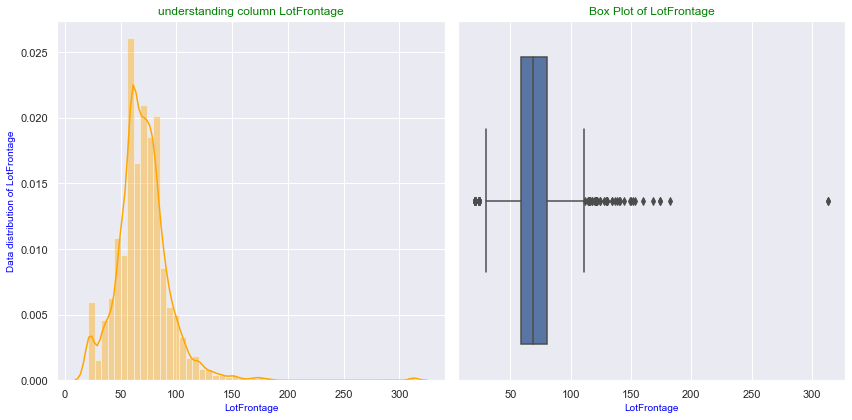

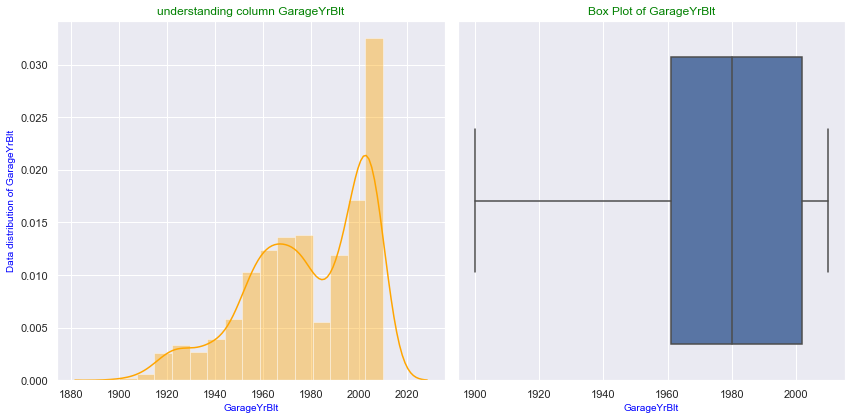

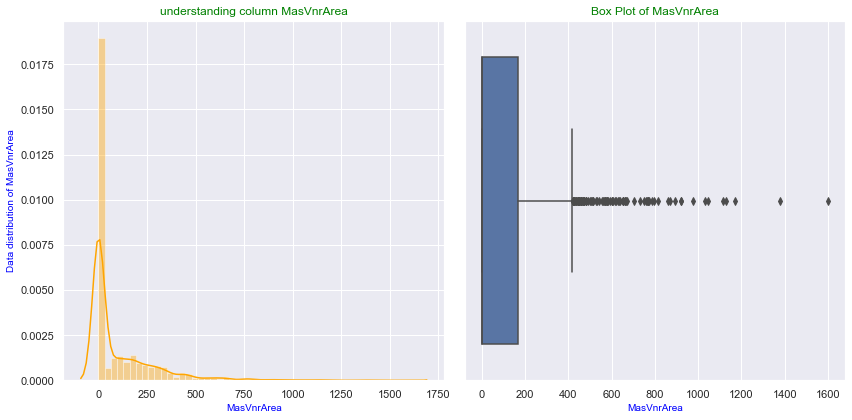

In [22]:
# Missing value plot for Numerical data.
for col in Num_ind:
    Numeric_distplot(HousePredCopy_df,col)

In [23]:
# Imputing Missing values with median values in 'LotFrontage' because of skewness in data.
HousePredCopy_df['LotFrontage'] = HousePredCopy_df['LotFrontage'].replace(np.nan, HousePredCopy_df['LotFrontage'].median())

In [24]:
# Imputing GarageYrBlt with mode value.
HousePredCopy_df['GarageYrBlt'] = HousePredCopy_df['GarageYrBlt'].replace(np.nan, HousePredCopy_df['GarageYrBlt'].mode()[0])

In [25]:
#checking the shape of the dataframe.
HousePredCopy_df.shape

(1460, 81)

In [26]:
#Dropping rows having missing enteries,[MasVnrArea, MasVnrType, Electrical]
HousePredCopy_df.dropna(inplace=True)

In [27]:
# Re-Checking on number of features having null values.
sum(Null_percentage(HousePredCopy_df)>0)

0

In [28]:
#checking the shape of the dataframe.
HousePredCopy_df.shape

(1451, 81)

### 3.2 Univariate Analysis.

##### 3.2.1 Numerical Data - outlier treatment.

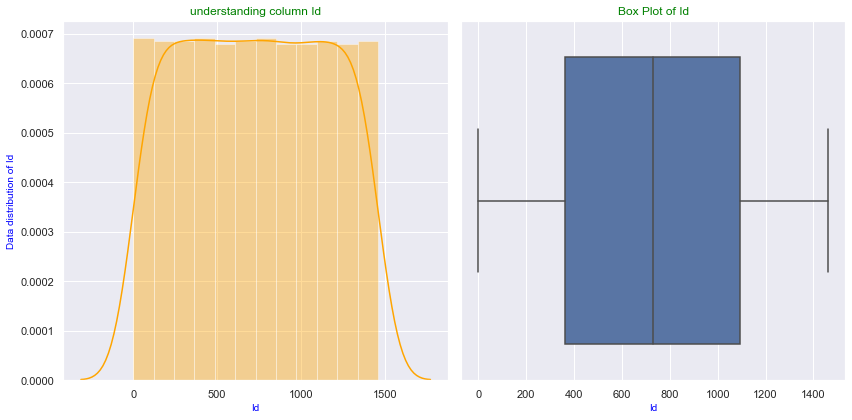

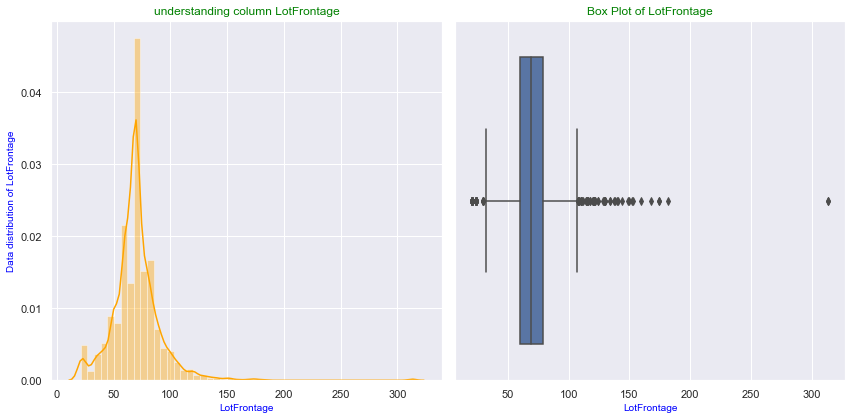

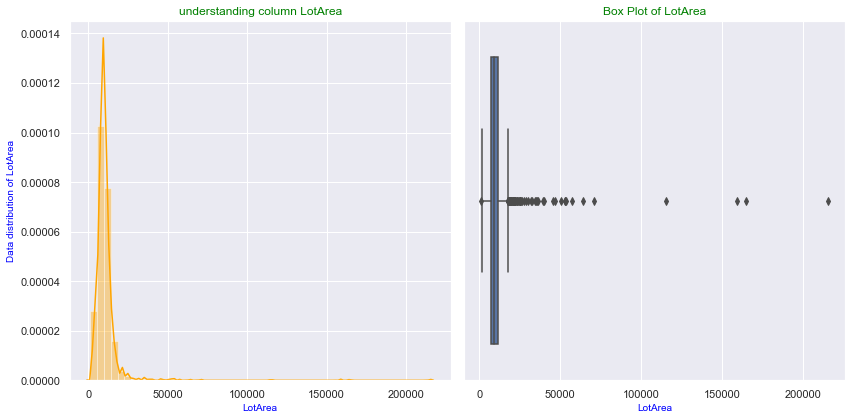

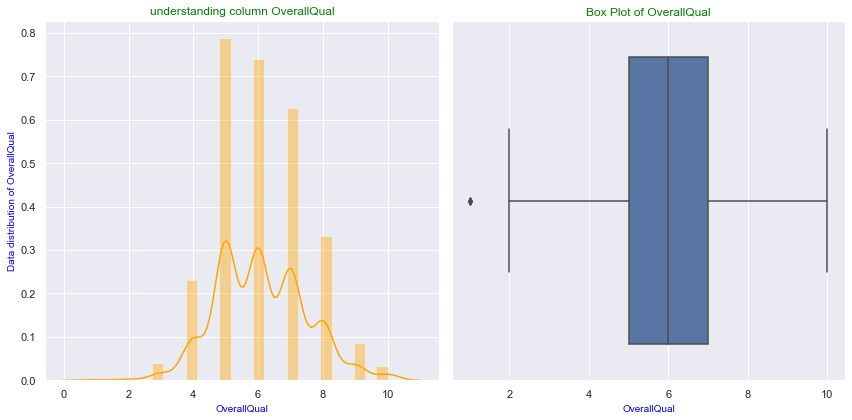

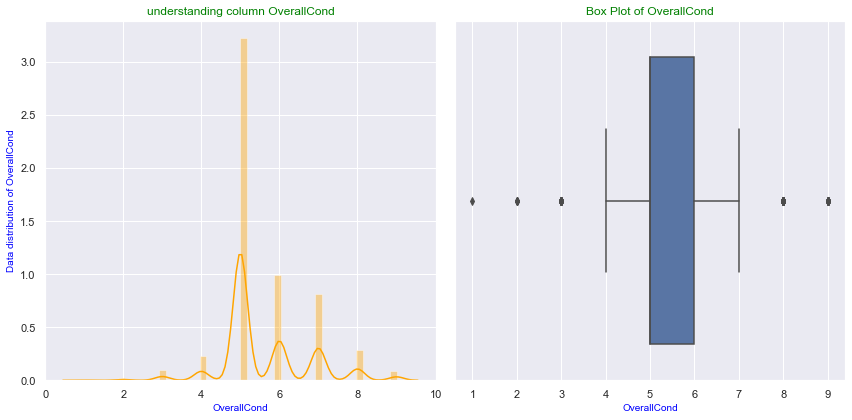

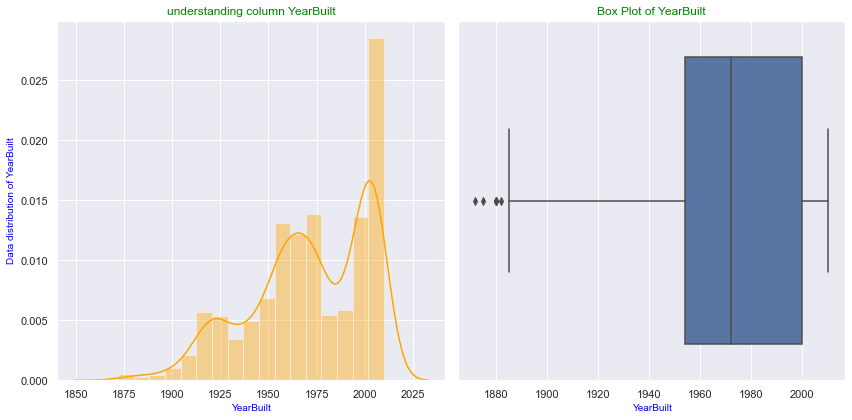

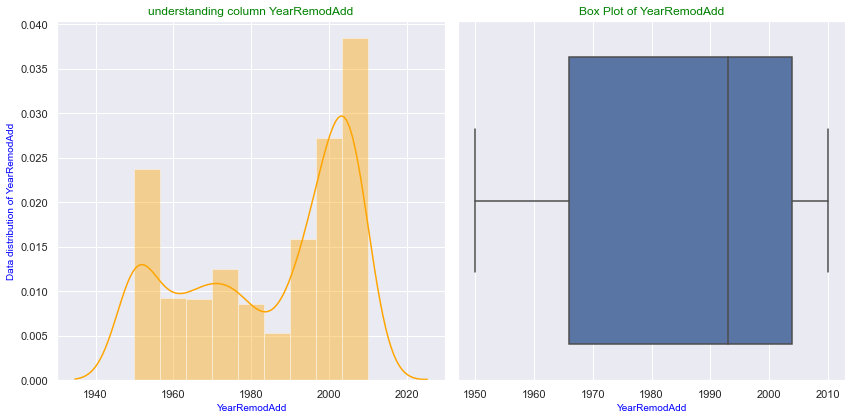

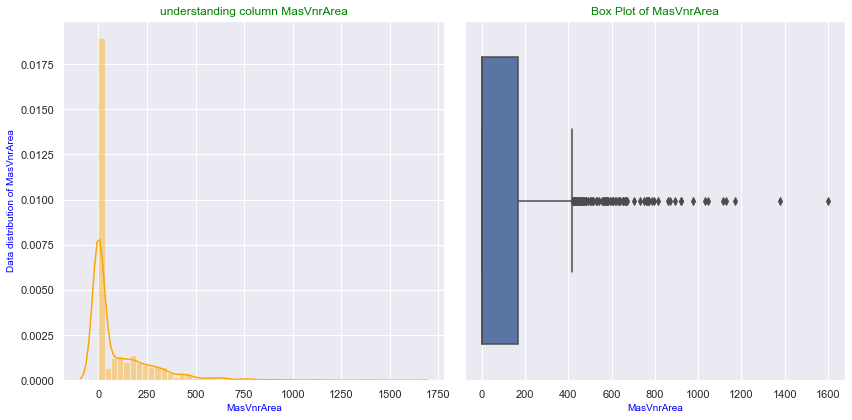

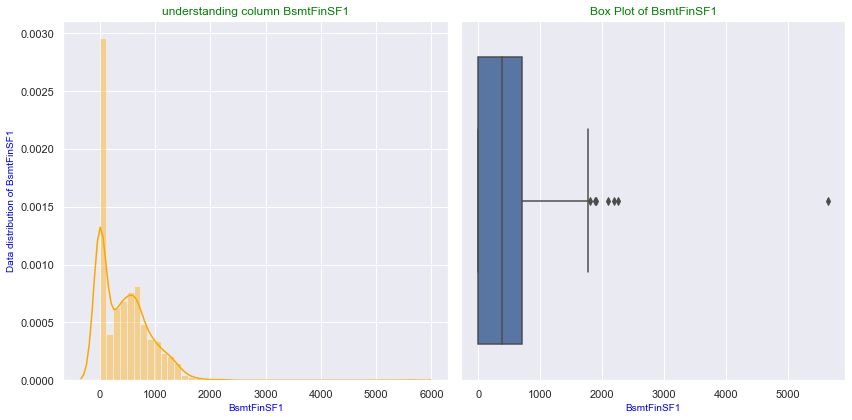

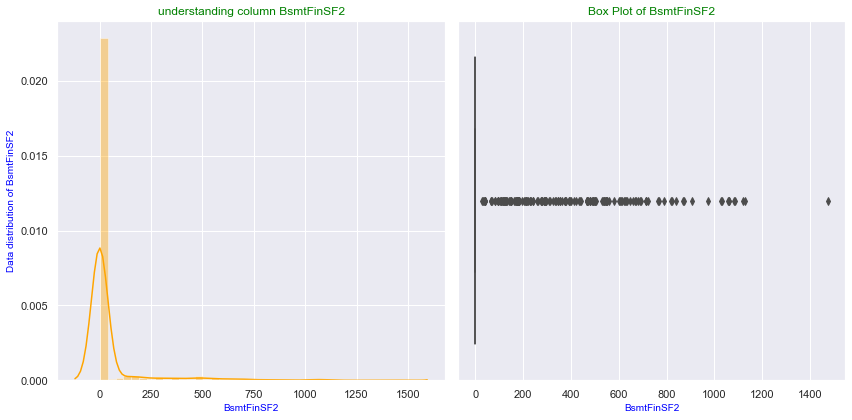

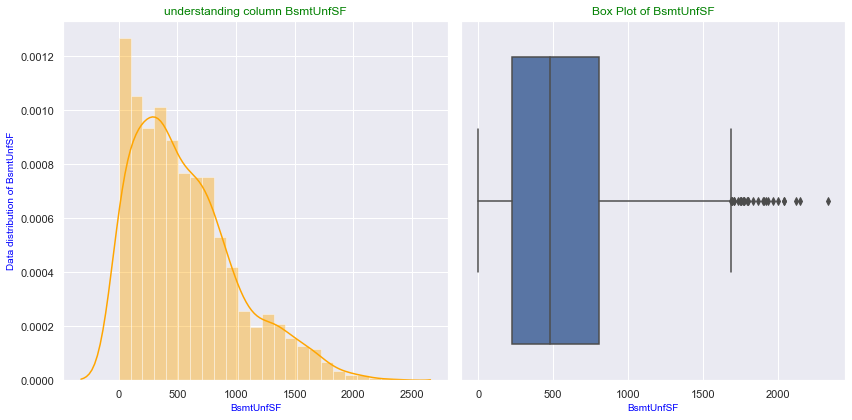

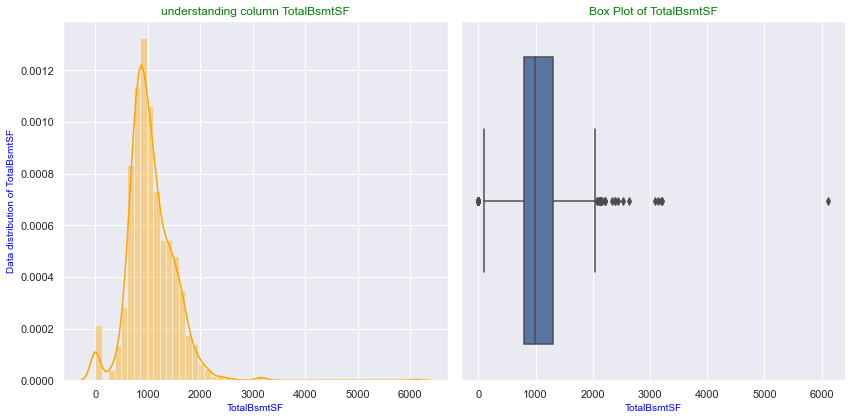

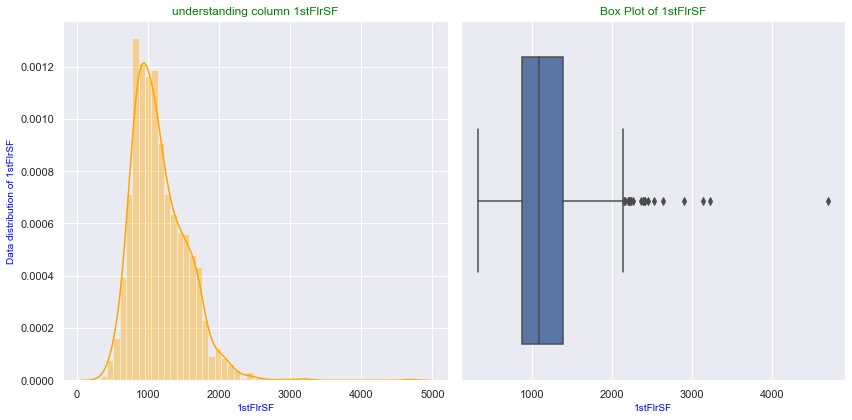

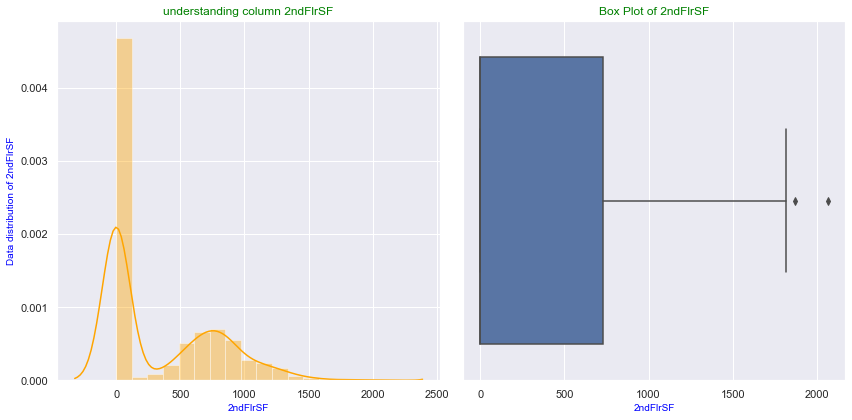

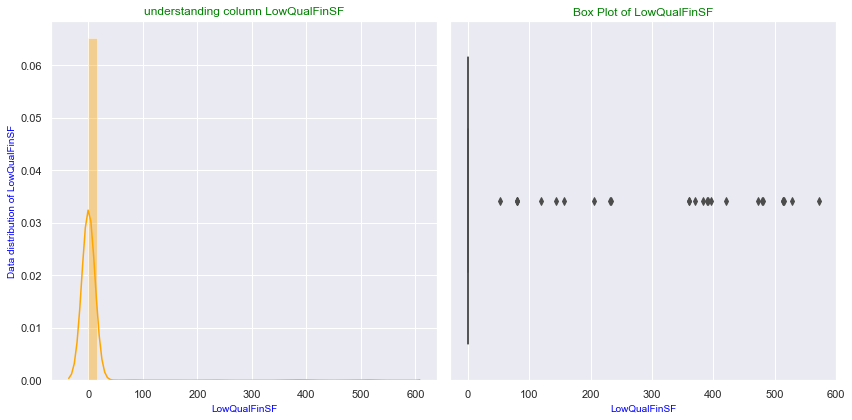

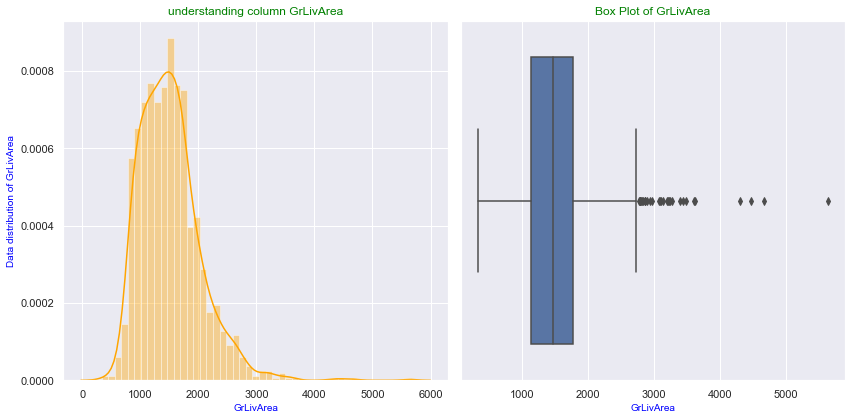

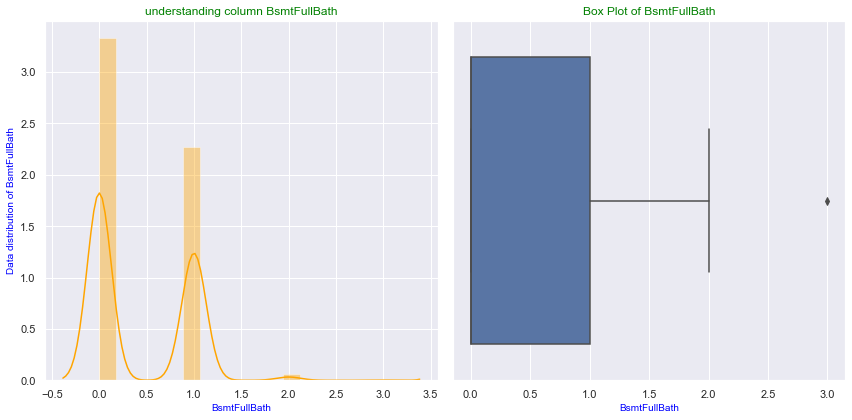

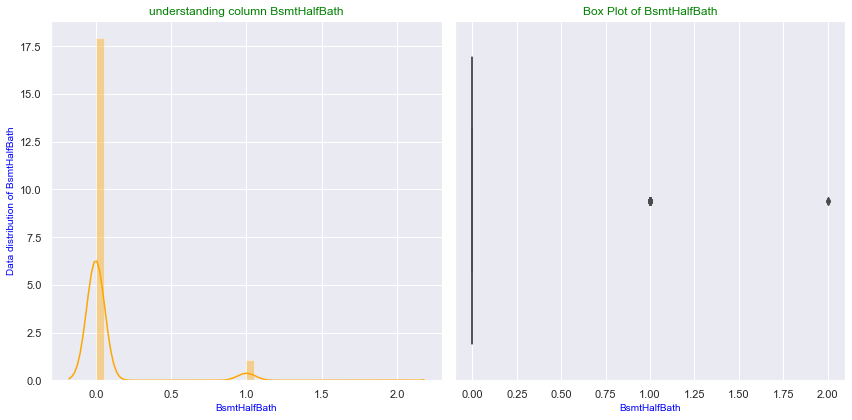

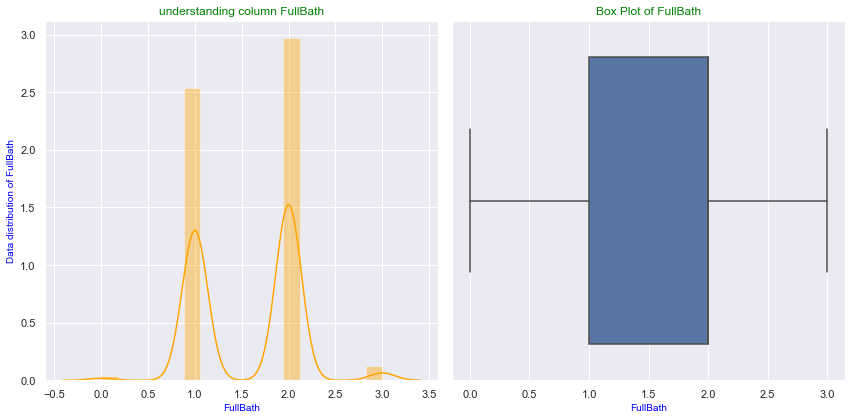

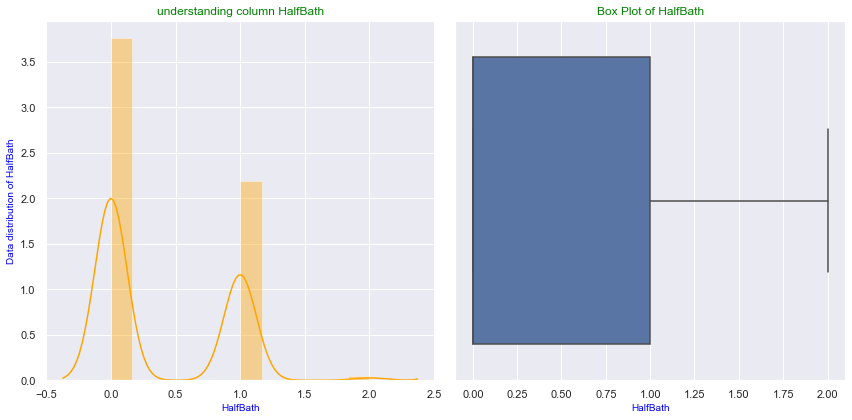

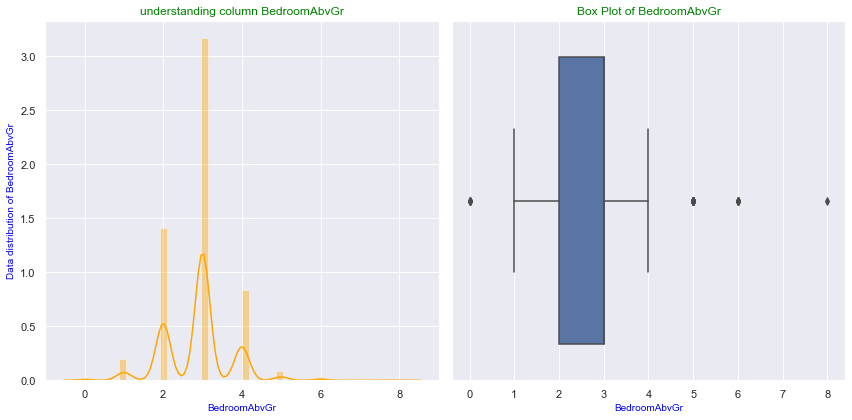

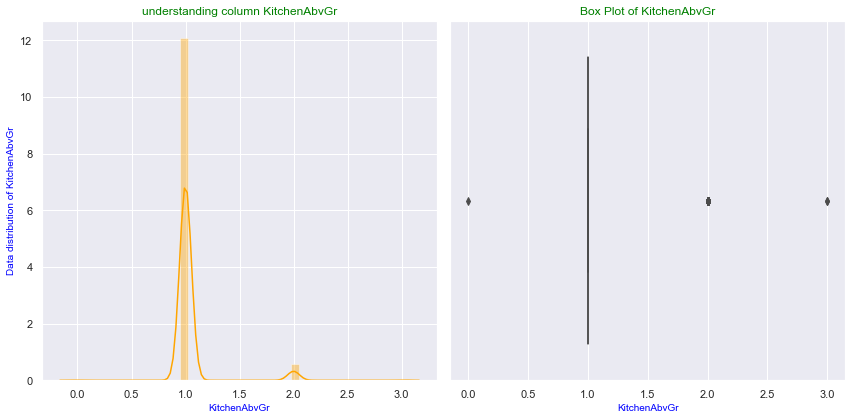

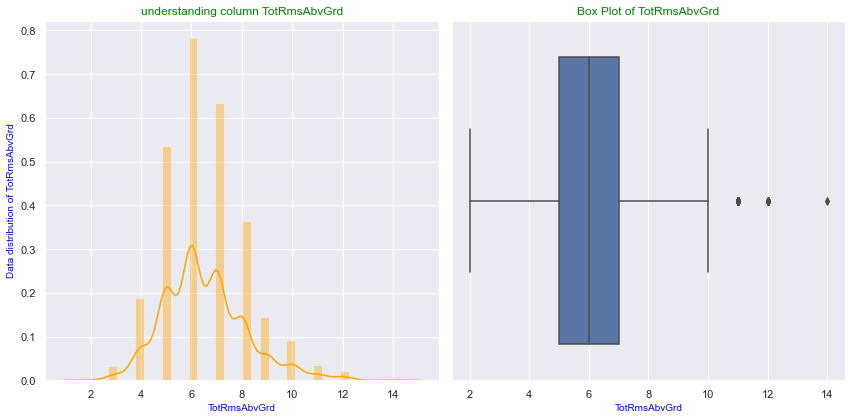

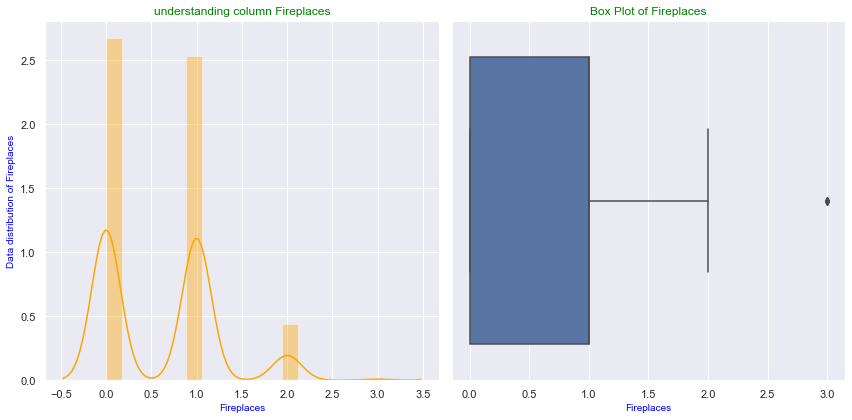

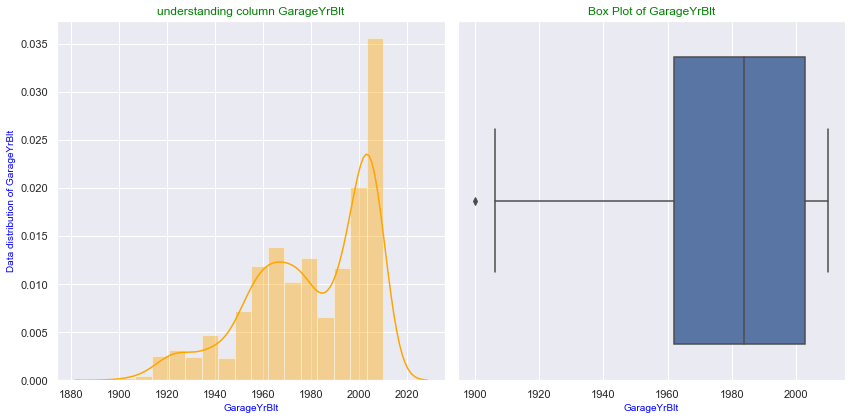

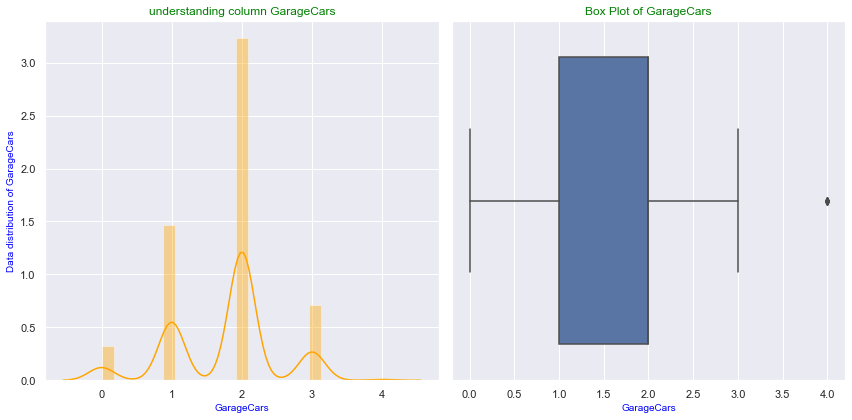

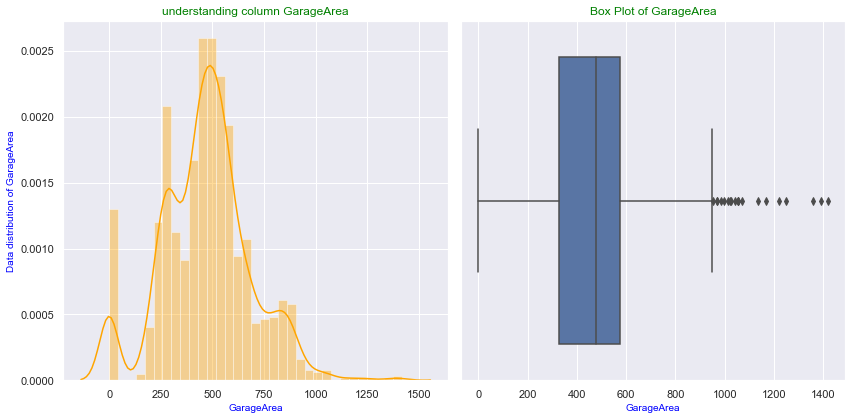

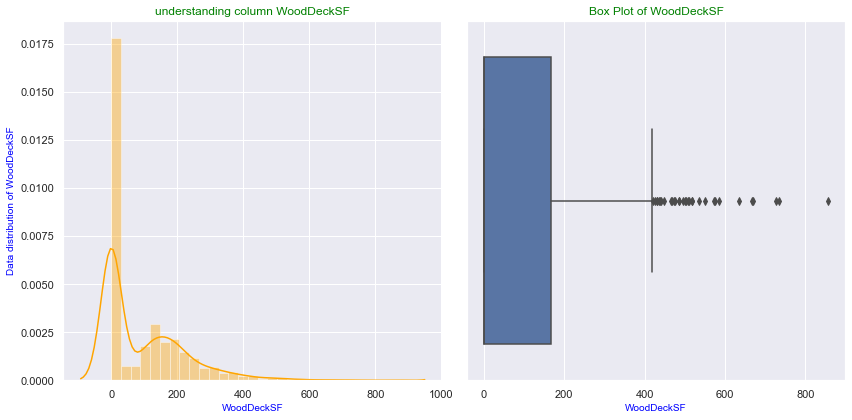

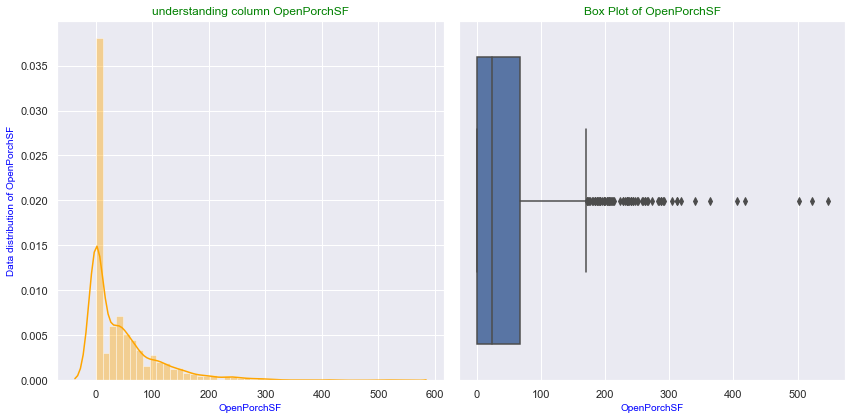

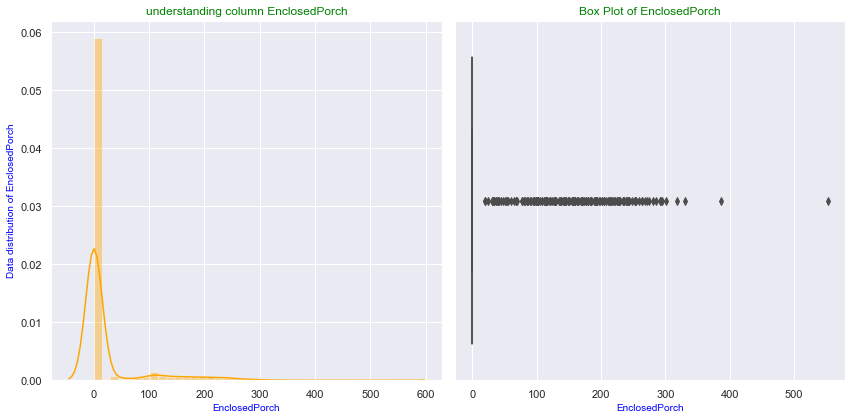

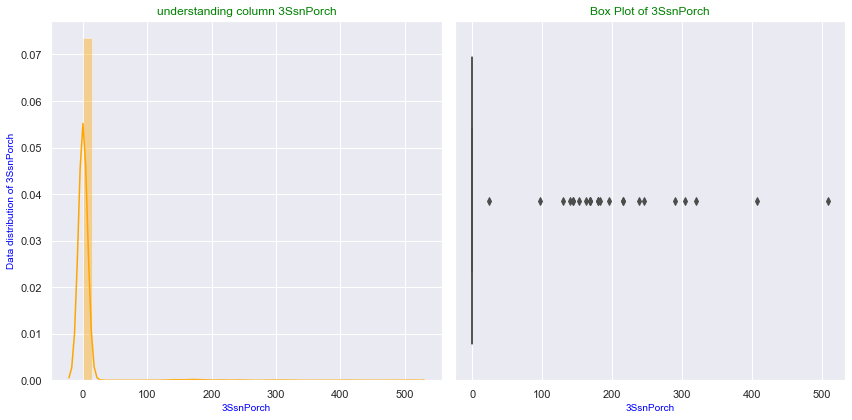

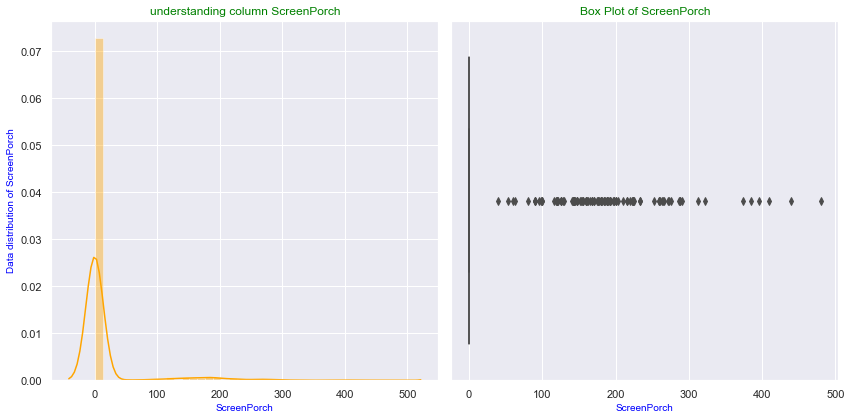

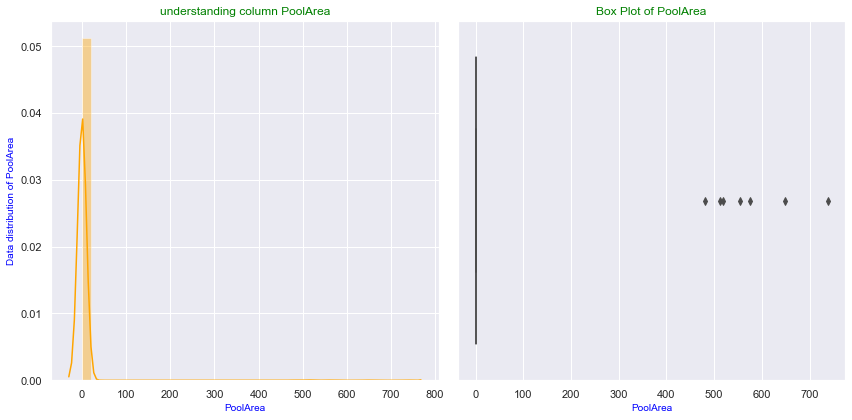

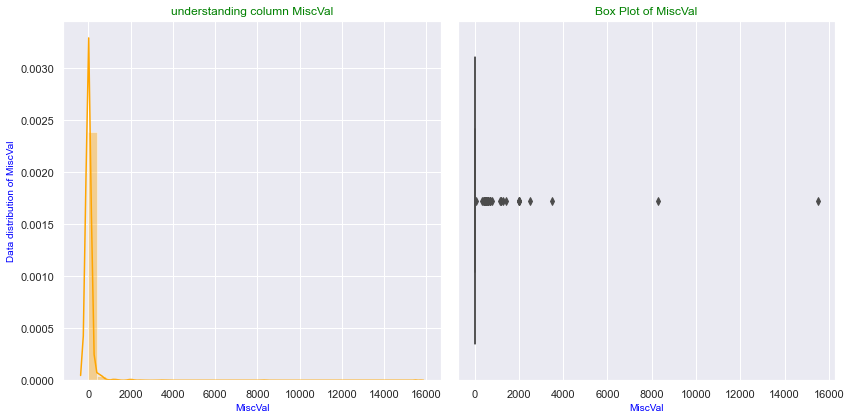

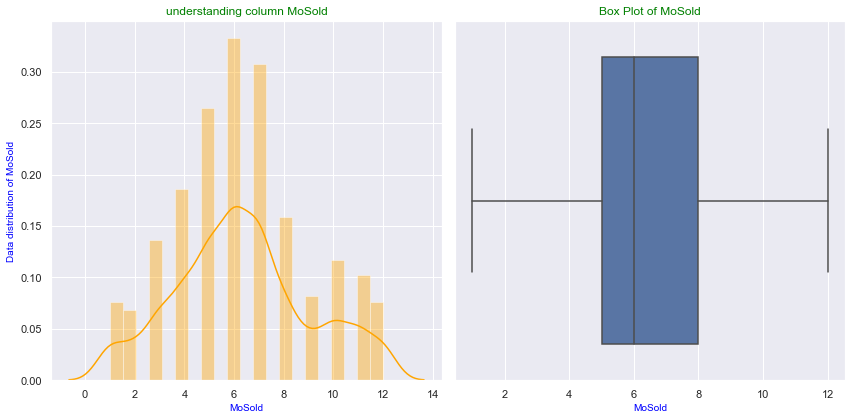

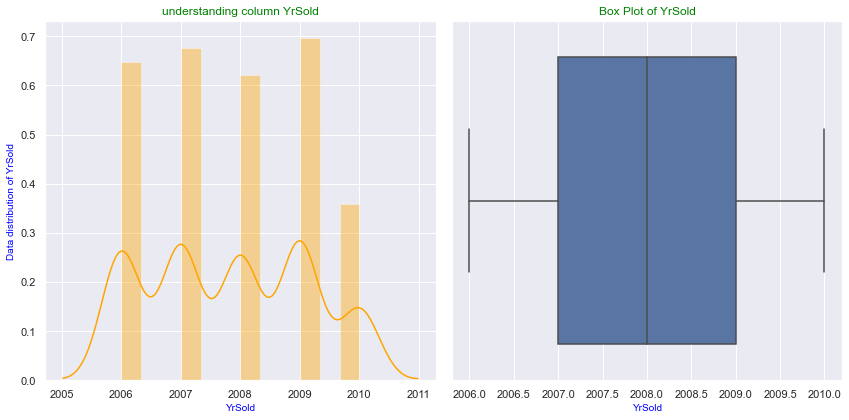

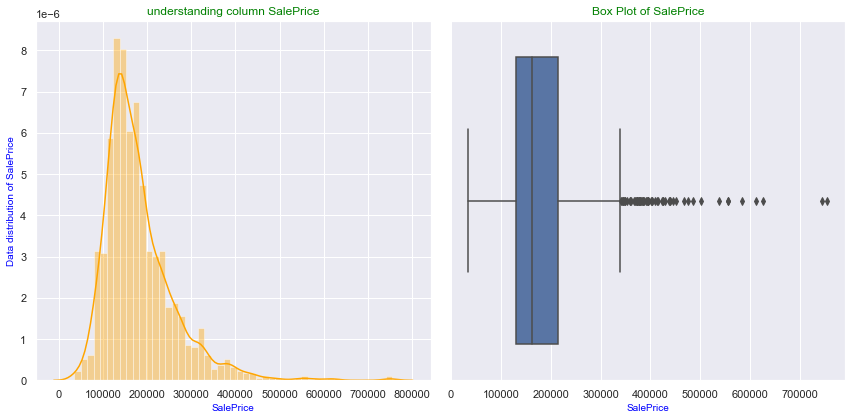

In [29]:
#Plotting Numerical data to check data distribution and outliers.
num_cols = HousePredCopy_df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    Numeric_distplot(HousePredCopy_df,col)

### Outlier treatment analysis: 
1. Outlier capping to 1% and 99% quantile,for variables- LotArea,1stFlrSF,GrLivArea.
2. Outlier capping to 99% quantile,for variables-LotFrontage, MasVnrArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 2ndFlrSF, GarageArea, WoodDeckSF, OpenPorchSF,BsmtFinSF2,EnclosedPorch.
3. Droping Variables with 90% of skewness to 0 -  LowQualFinSF, 3SsnPorch, ScreenPorch, PoolArea, MiscVal and, KitchenAbvGr which is skewed to 1
4. Handling Target variable SalePrice by log transformation.

In [30]:
# Droping variables LowQualFinSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,KitchenAbvGr.
HousePredCopy_df.drop(columns = ['LowQualFinSF','3SsnPorch','ScreenPorch','PoolArea',
                                 'MiscVal','KitchenAbvGr'],inplace=True)

In [31]:
# The shape of the data frame after the dropping columns.
HousePredCopy_df.shape

(1451, 75)

In [32]:
# Capping variables to 1-99 quantile vaues.
var_list1 = ['LotArea','1stFlrSF','GrLivArea']

for col in var_list1:
    q1 = HousePredCopy_df[col].quantile(0.01) 
    q4 = HousePredCopy_df[col].quantile(0.99) 

    HousePredCopy_df[col][HousePredCopy_df[col]<=q1] = q1  
    HousePredCopy_df[col][HousePredCopy_df[col]>=q4] = q4 

In [33]:
# Capping variables to 99 quantile vaues.
var_list2 = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','GarageArea',
             'WoodDeckSF','OpenPorchSF','BsmtFinSF2','EnclosedPorch']

for col in var_list2:
    q4 = HousePredCopy_df[col].quantile(0.99)  
    HousePredCopy_df[col][HousePredCopy_df[col]>=q4] = q4 

In [34]:
#Handling Date and month data entries, 'YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold' .
#Checking Data consistency between YearBuilt and YearRemodAdd
sum(HousePredCopy_df['YearRemodAdd'] < HousePredCopy_df['YearBuilt'])

0

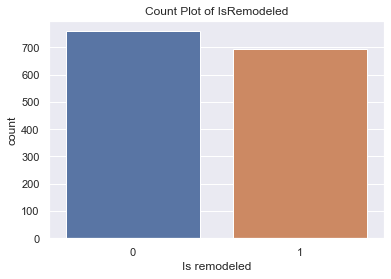

In [35]:
#Creating a binary value IsRemodeled column ,1- Remodeled ,0 - Not Remodeled 

def IsRemodeled(entry):
    if entry['YearRemodAdd'] > entry['YearBuilt']:
        return 1
    else:
        return 0

HousePredCopy_df['IsRemodeled']=HousePredCopy_df.apply(IsRemodeled,axis=1)

sns.countplot(HousePredCopy_df['IsRemodeled'])
plt.xlabel('Is remodeled')
plt.title('Count Plot of IsRemodeled')
plt.show()

In [36]:
#Checking Data consistency between YrSold and YearBuilt
sum(HousePredCopy_df['YearBuilt'] > HousePredCopy_df['YrSold'])

0

In [37]:
#Creating AgeOfHouseYear column indicationg age, from built year to year in which it is sold, 
#age = (YrSold - YearBuilt) .
def AgeOfHouse(entry):
    return entry['YrSold'] - entry['YearBuilt']

HousePredCopy_df['AgeOfHouseYear']=HousePredCopy_df.apply(AgeOfHouse,axis=1)
HousePredCopy_df['AgeOfHouseYear']

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: AgeOfHouseYear, Length: 1451, dtype: int64

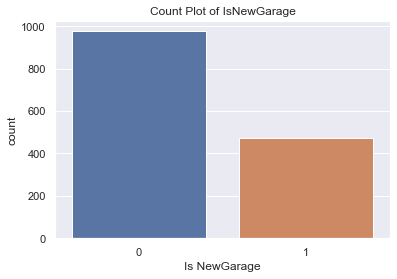

In [38]:
#Creating IsNewGarage column indicating, 1 - Garage built after year 2000, 0 - Garage built before year 2000.
def NewGarage(entry):
    return int(entry['GarageYrBlt'] >= 2000)

HousePredCopy_df['IsNewGarage']=HousePredCopy_df.apply(NewGarage,axis=1)

sns.countplot(HousePredCopy_df['IsNewGarage'])
plt.xlabel('Is NewGarage')
plt.title('Count Plot of IsNewGarage')
plt.show()

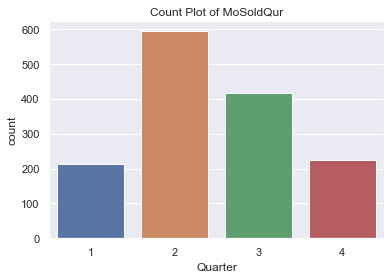

In [39]:
#Creating 4 quarters of months on which house was sold ,MoSoldQur
#1-months 1,2,3, 2-months 4,5,6, 3 -months 7,8,9, 4-months 10,11,12.
def MoSoldQur(entry):
    if entry['MoSold'] > 9:
        return 4
    elif entry['MoSold'] > 6:
        return 3
    elif entry['MoSold'] > 3:
        return 2
    else :
        return 1
    
HousePredCopy_df['MoSoldQur']=HousePredCopy_df.apply(MoSoldQur,axis=1)

sns.countplot(HousePredCopy_df['MoSoldQur'])
plt.xlabel('Quarter')
plt.title('Count Plot of MoSoldQur')
plt.show()

In [40]:
#Droping Date entries after feature transformation:
HousePredCopy_df.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'],inplace=True)

In [41]:
# Transforming 'SalePrice' to equivalent log transformation to address outlier and skewness present in data.
HousePredCopy_df['SalePrice'] = np.log(HousePredCopy_df['SalePrice'])

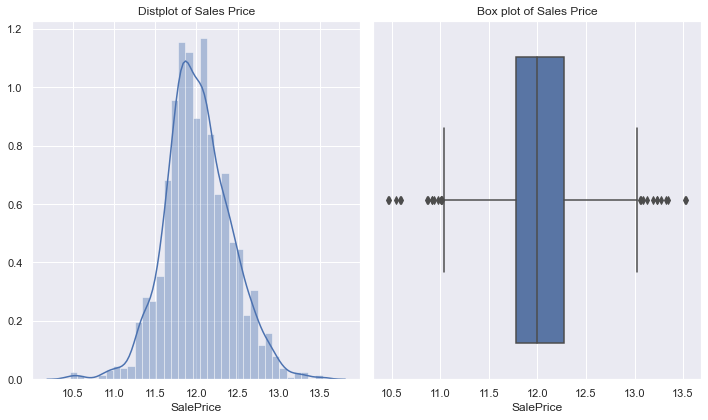

In [42]:
#Checking Distribution of Sales price with log transformation.
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.distplot(HousePredCopy_df['SalePrice'])
plt.title('Distplot of Sales Price')

plt.subplot(1,2,2)
sns.boxplot(HousePredCopy_df['SalePrice'])
plt.title('Box plot of Sales Price')

plt.tight_layout()

In [43]:
#Droping Id colum ,since it is a unique entry for each data point and it is not required for further analysis.
HousePredCopy_df.drop(columns = ['Id'],inplace=True)

##### 3.2.2 Categorical Data  Analysis.

In [44]:
#Categorical column index.
cat_col = HousePredCopy_df.select_dtypes(include='object').columns

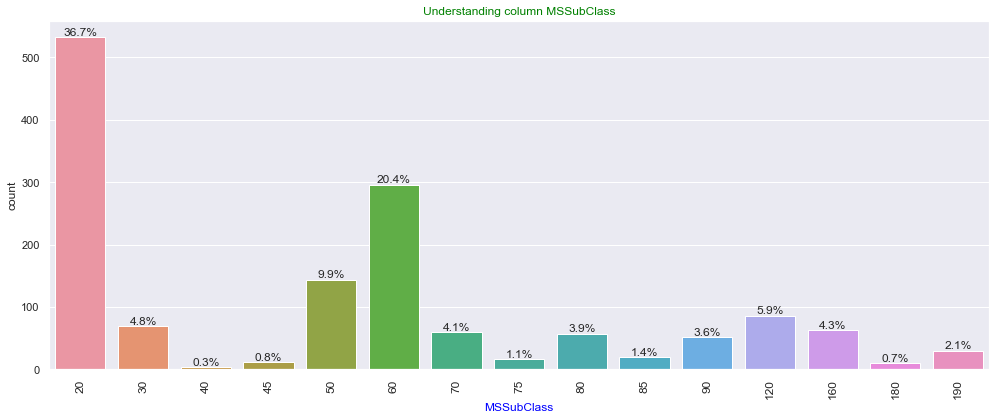

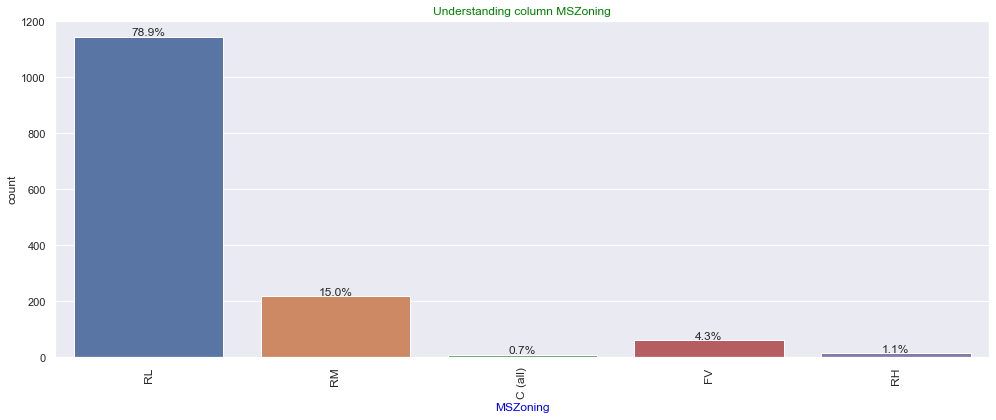

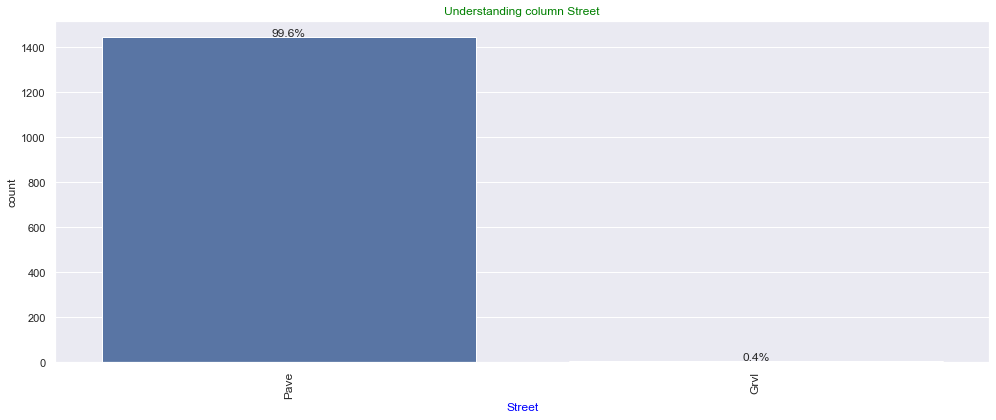

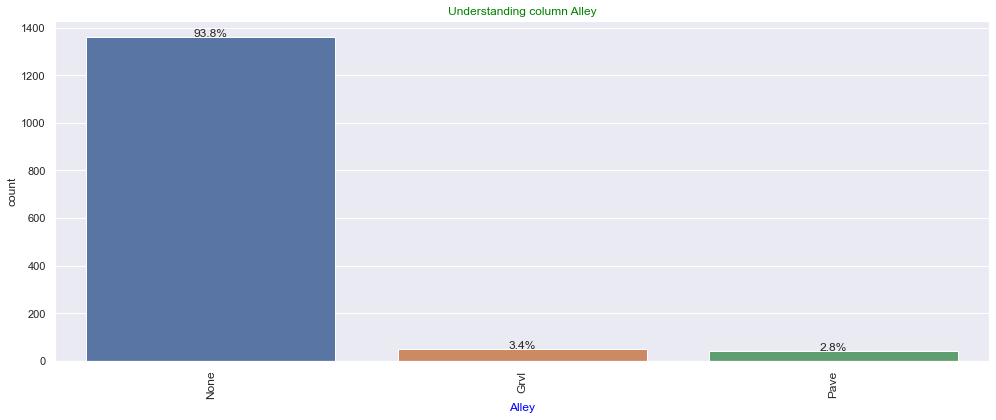

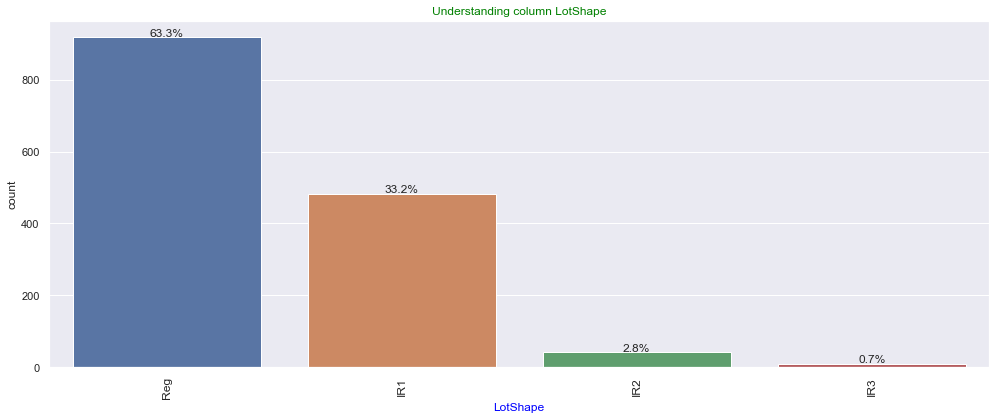

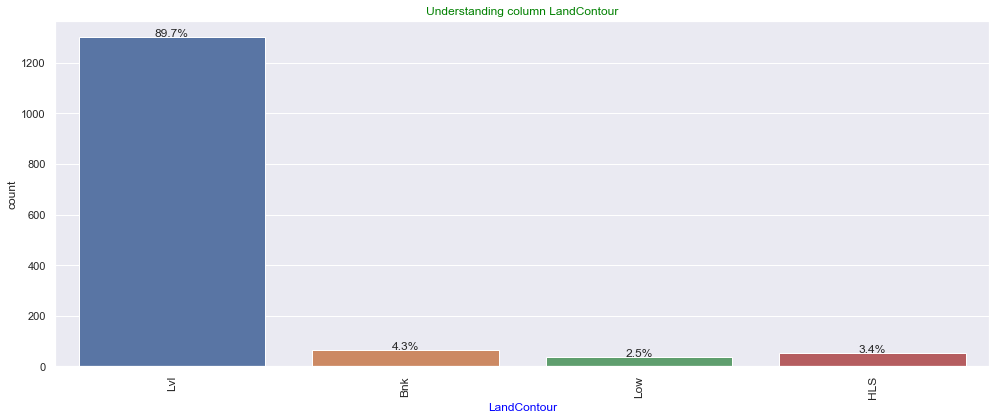

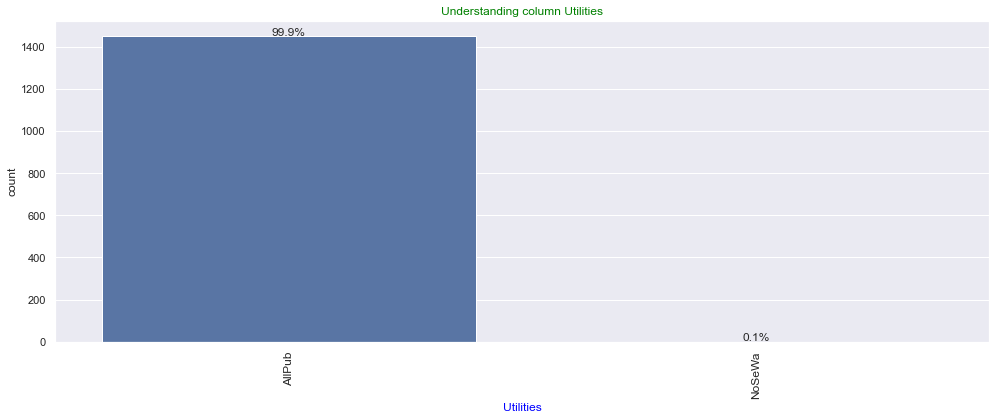

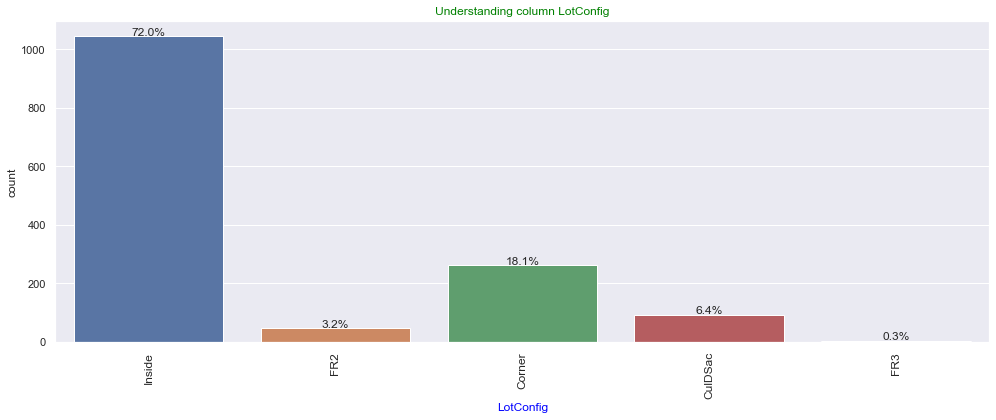

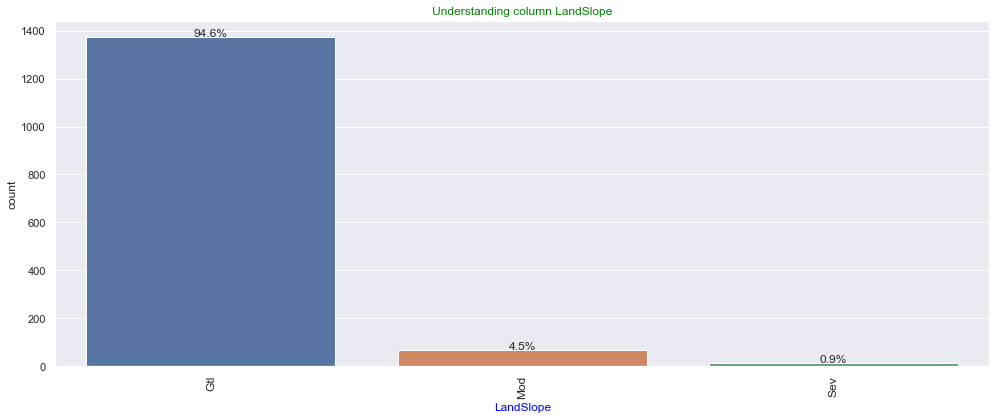

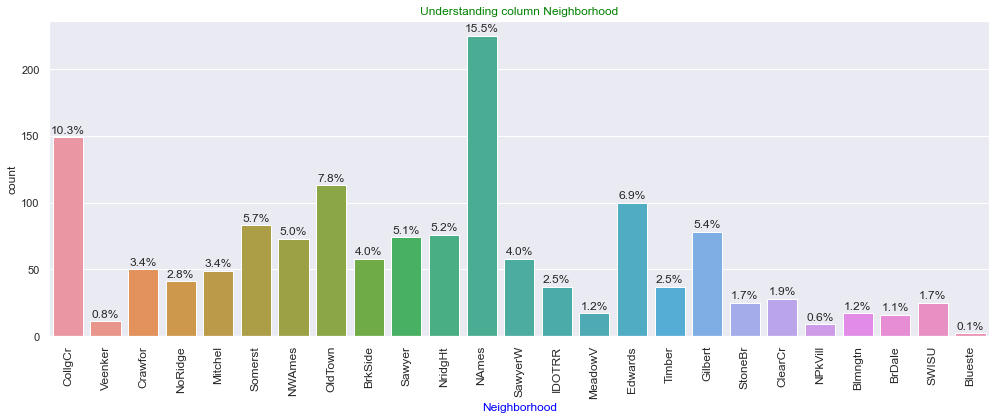

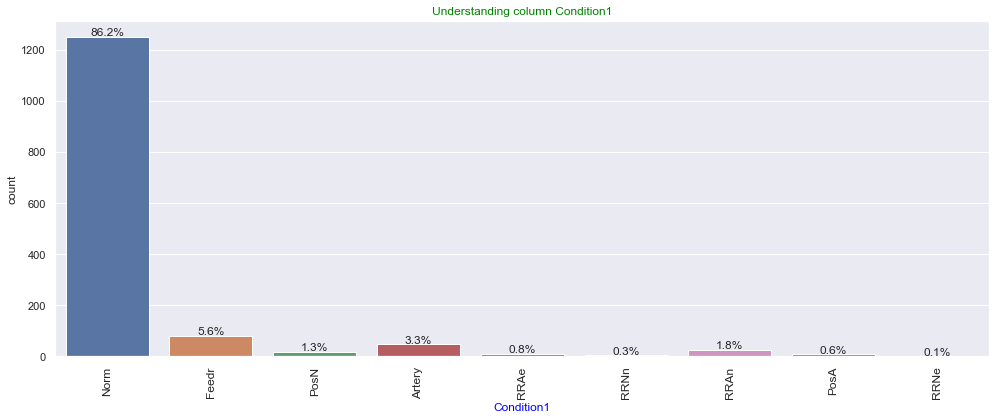

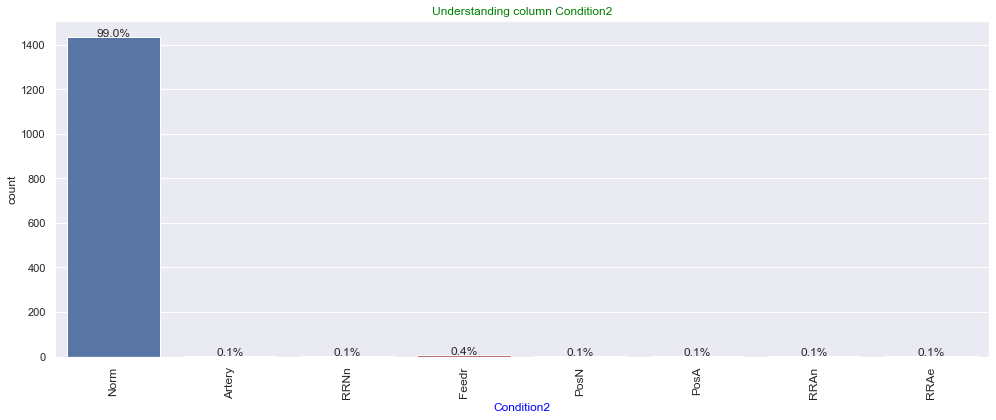

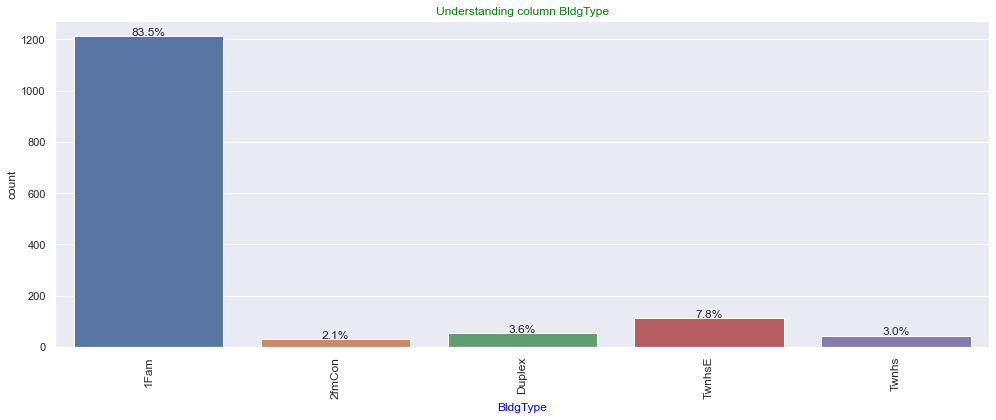

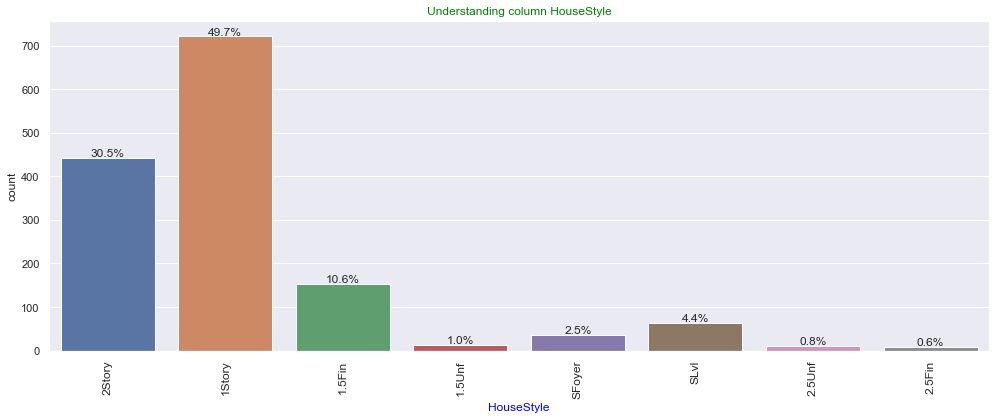

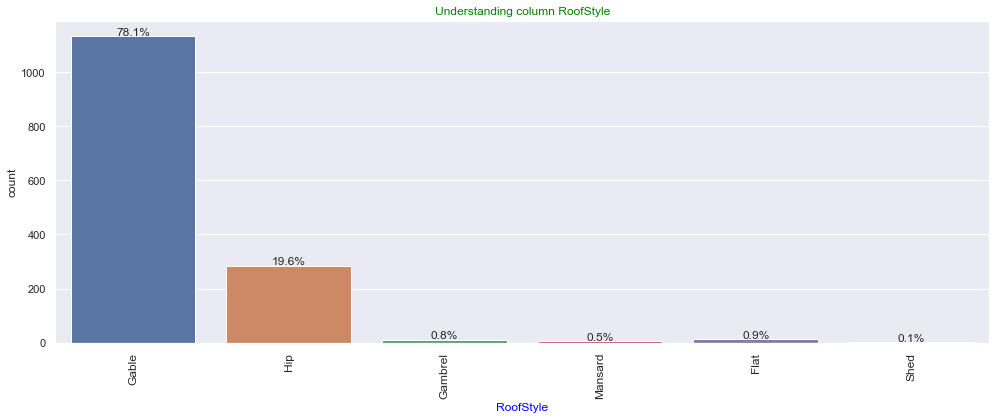

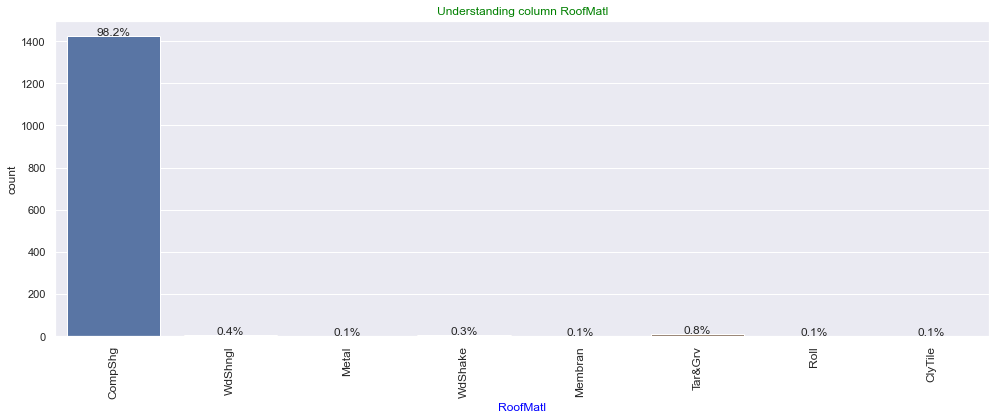

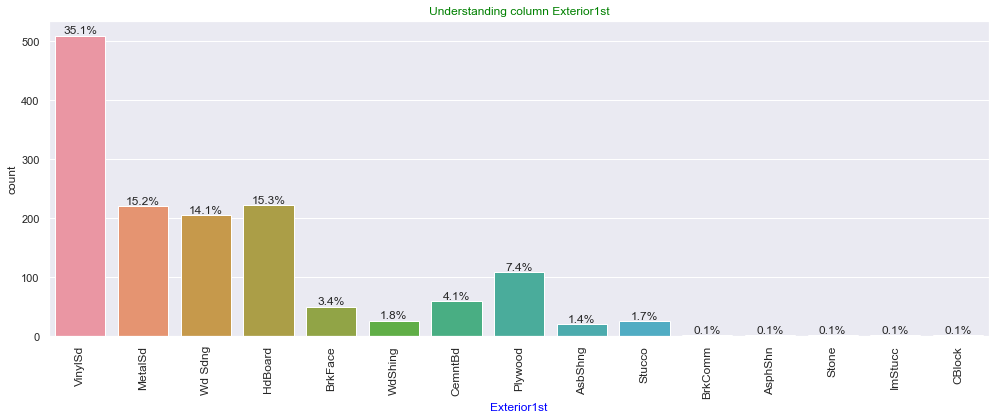

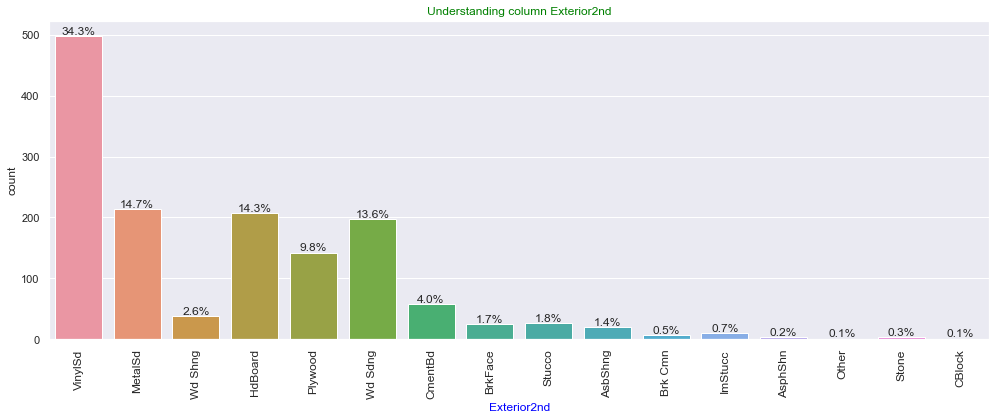

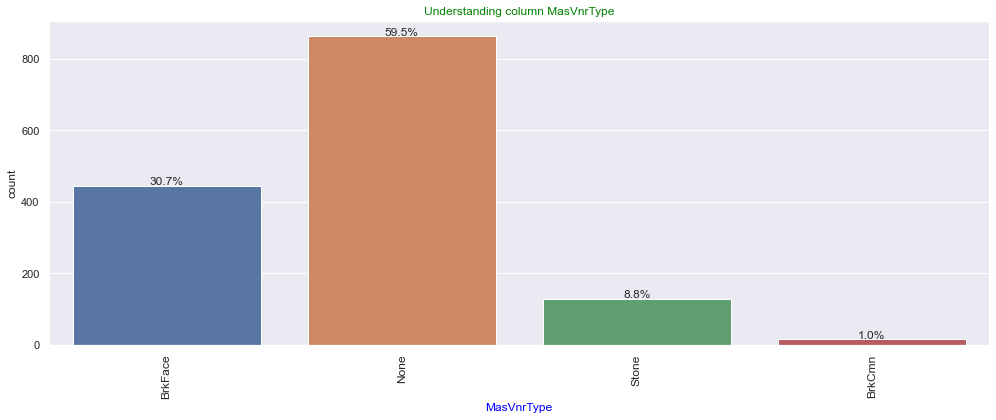

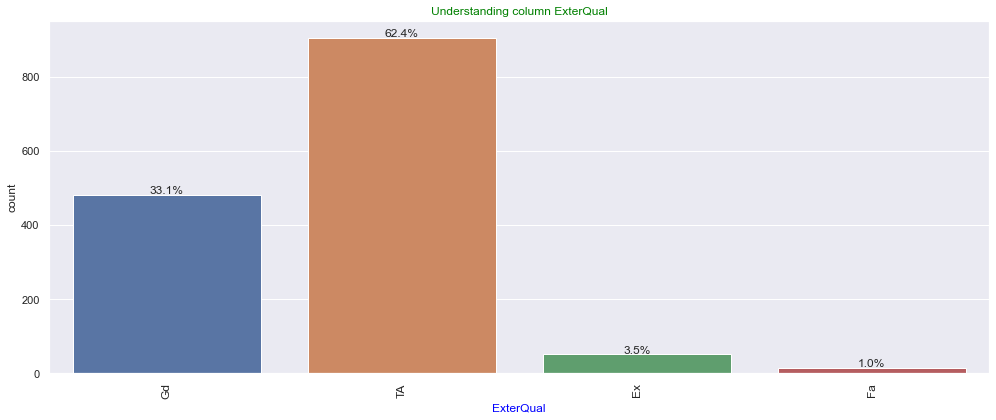

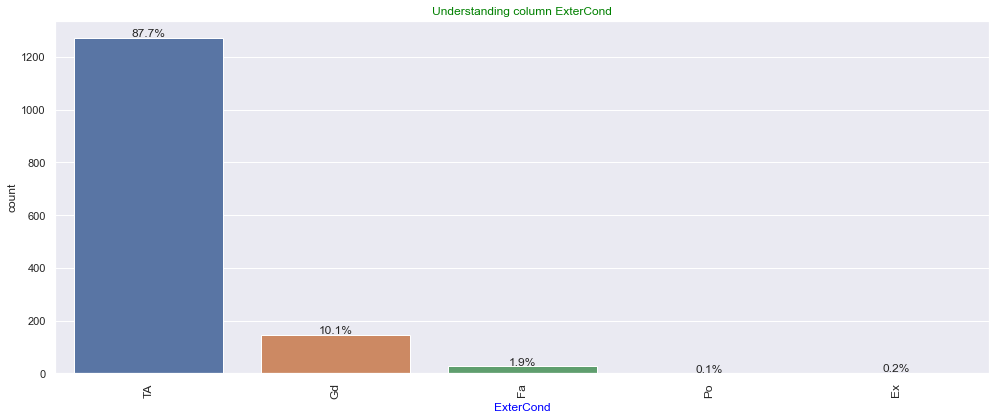

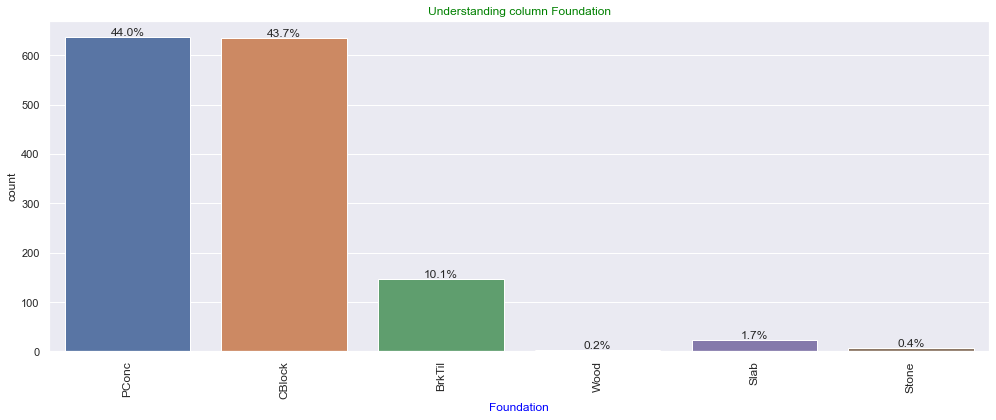

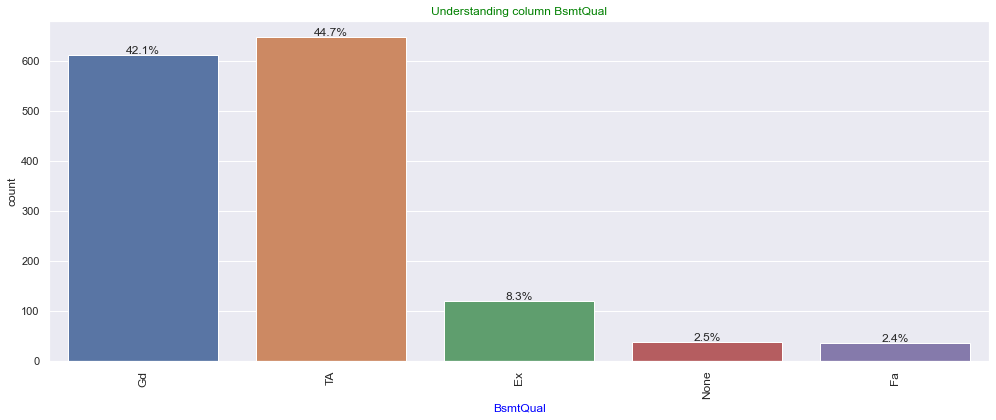

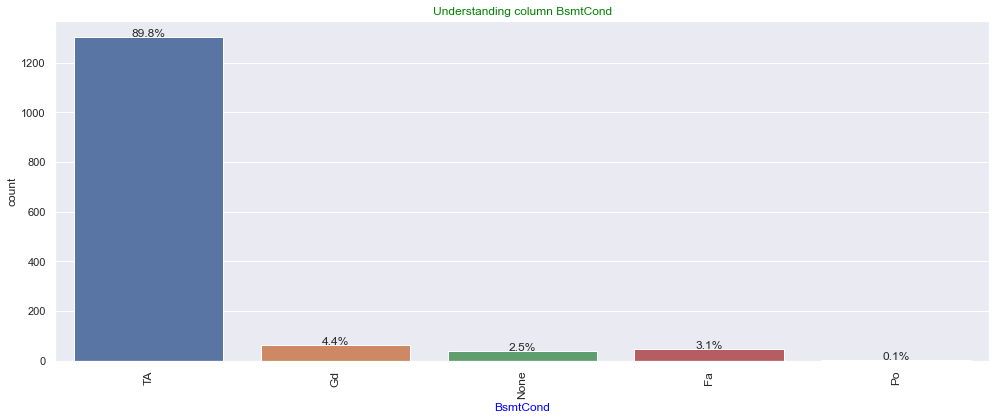

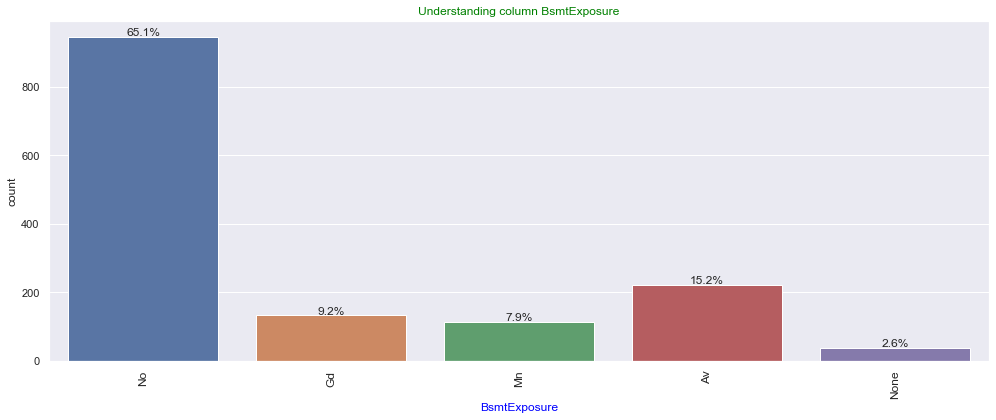

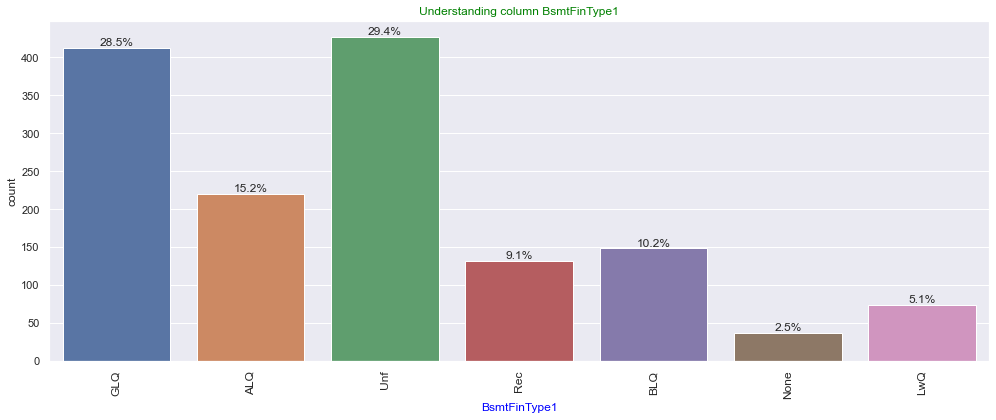

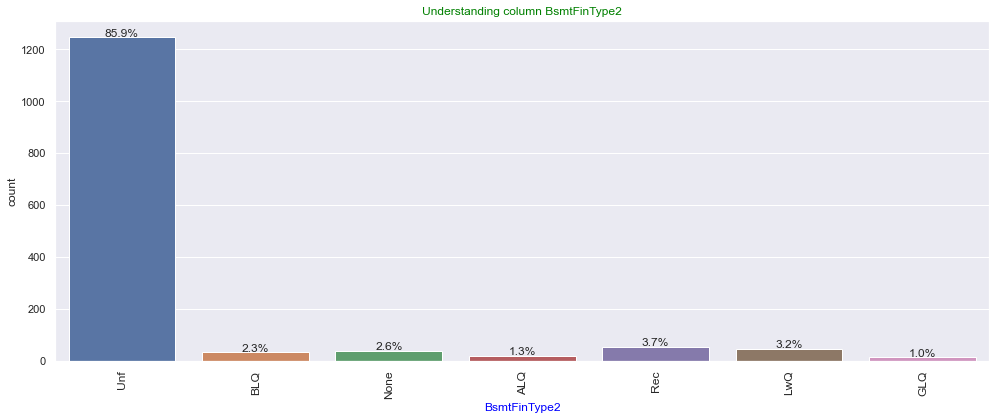

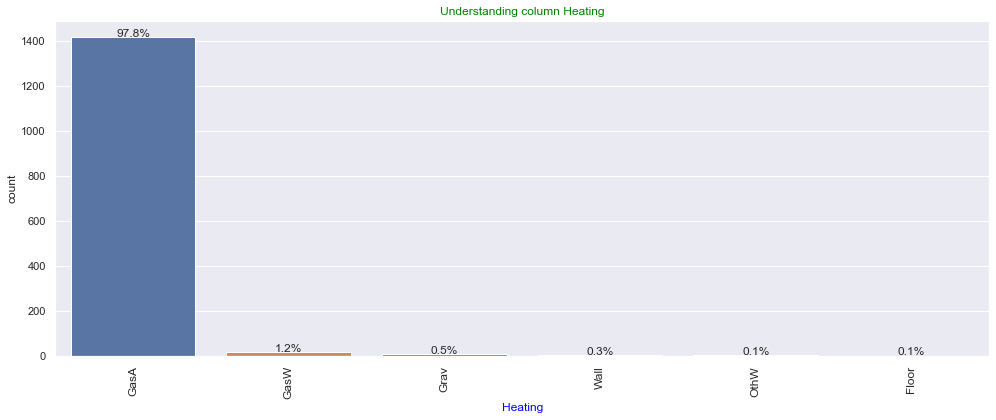

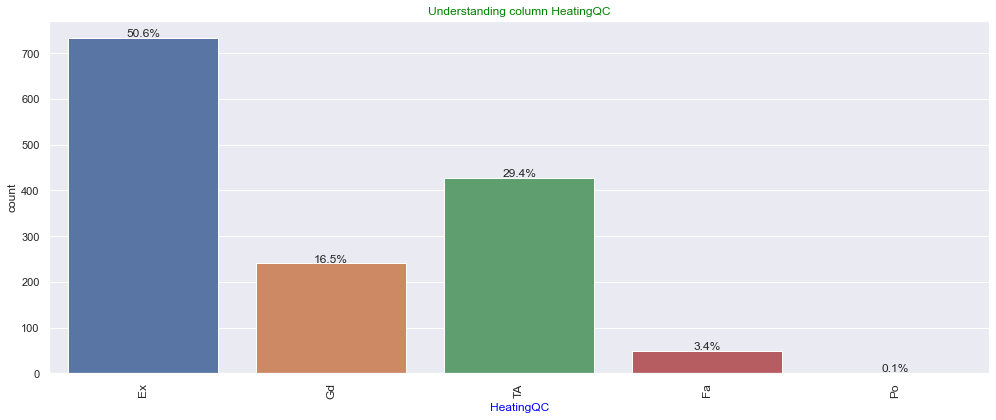

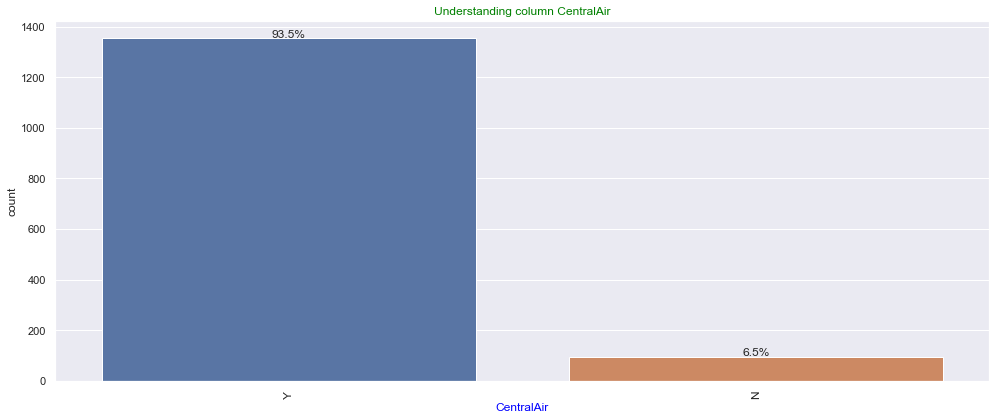

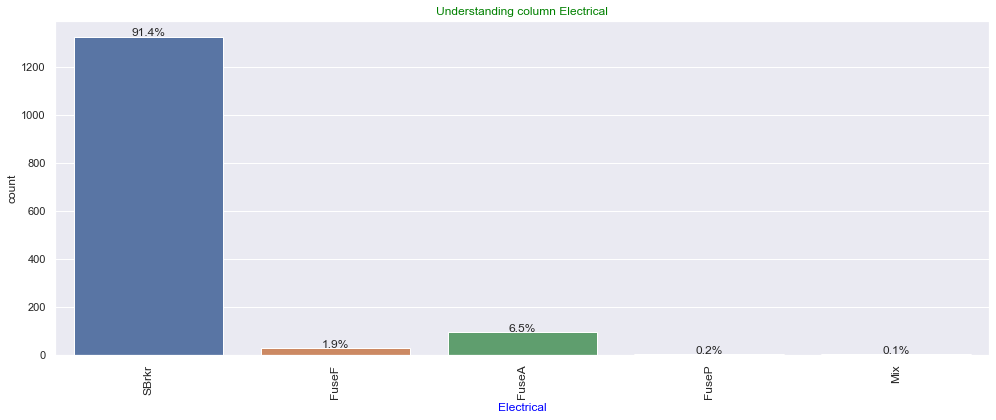

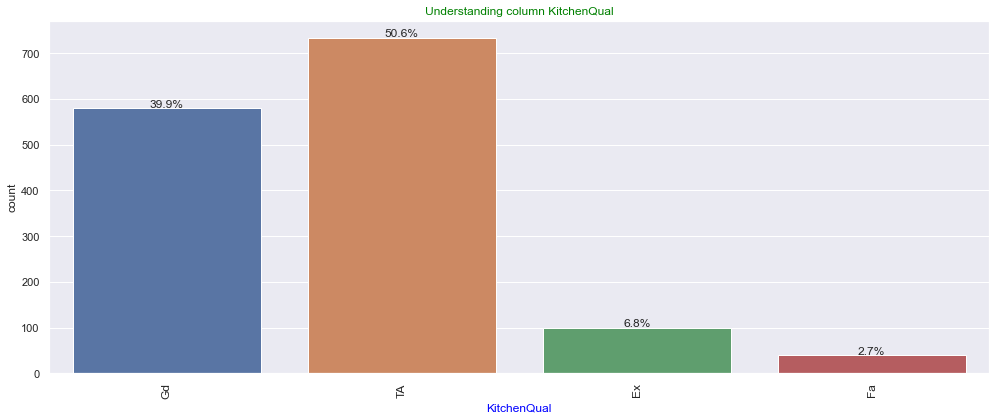

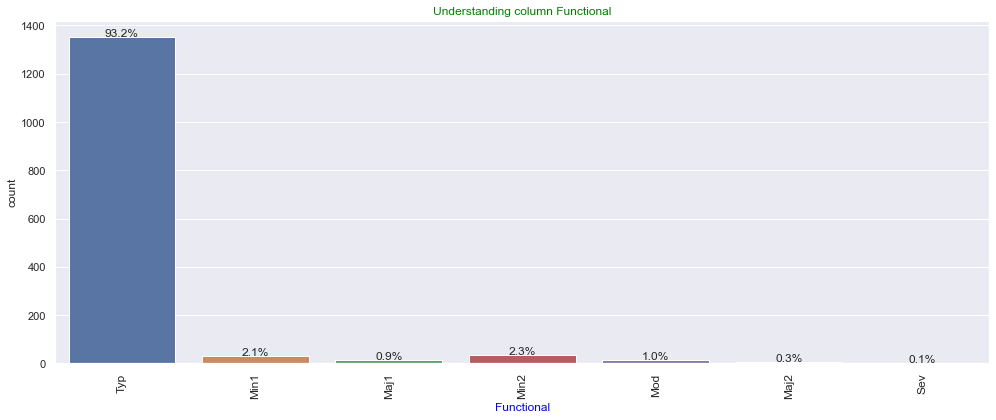

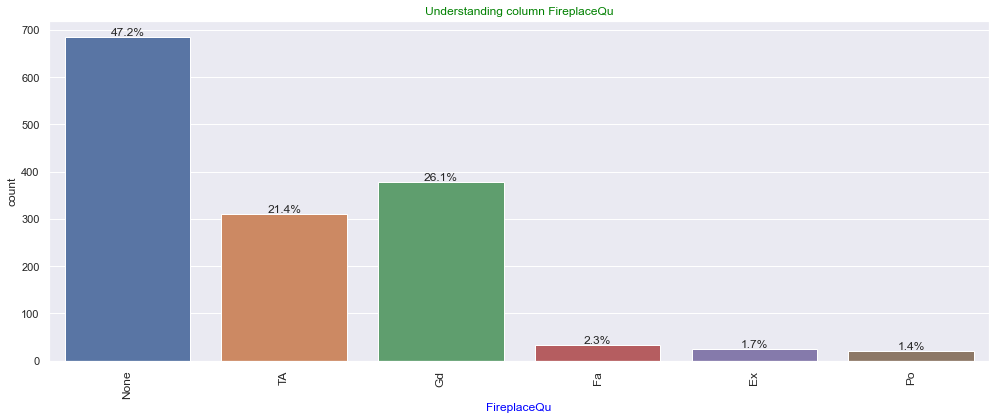

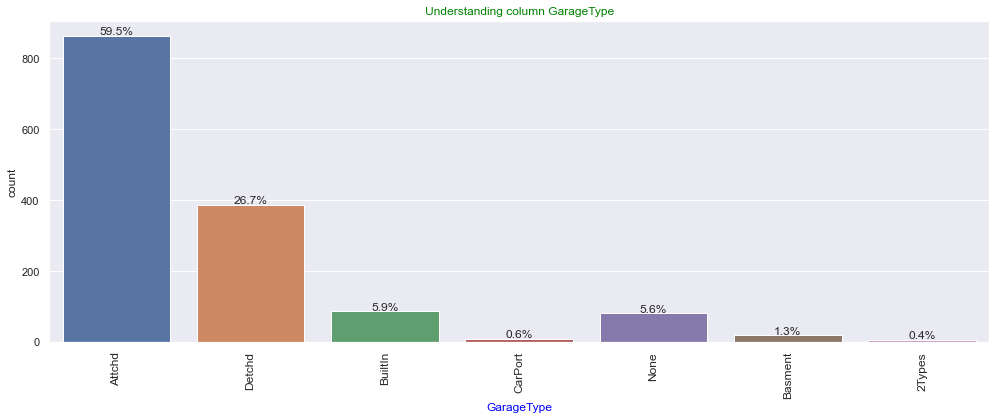

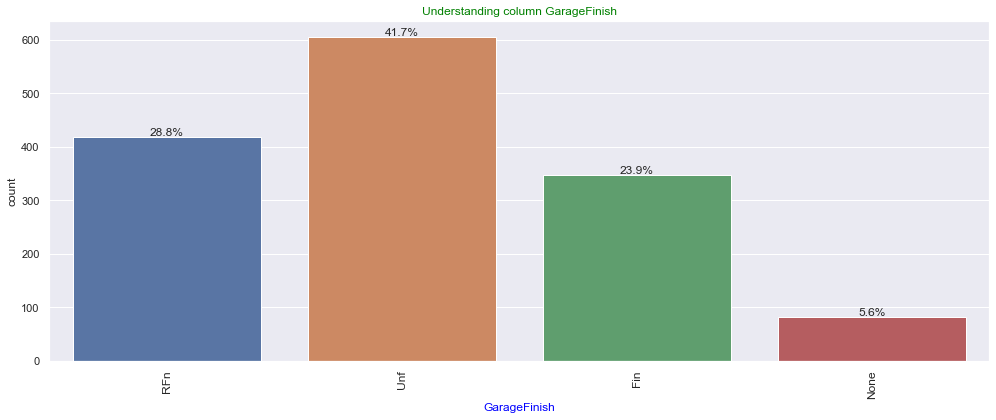

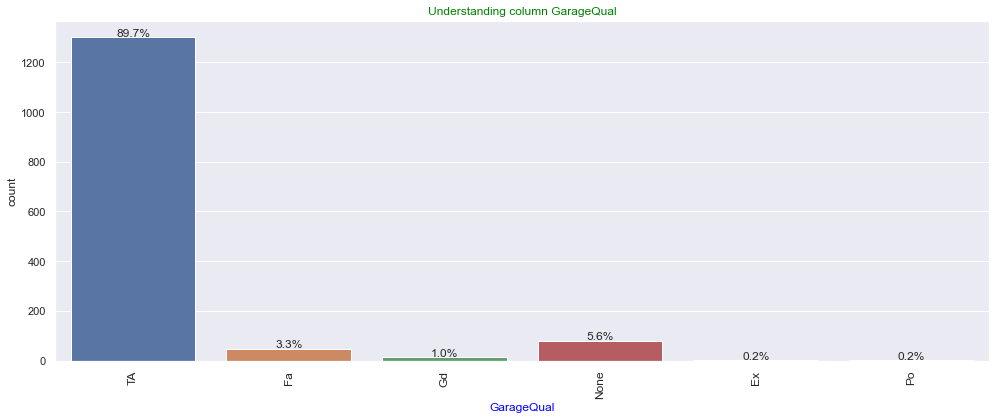

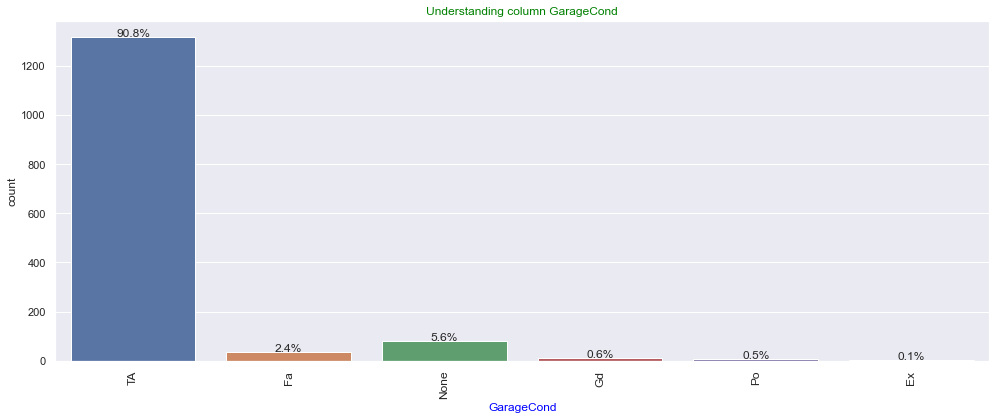

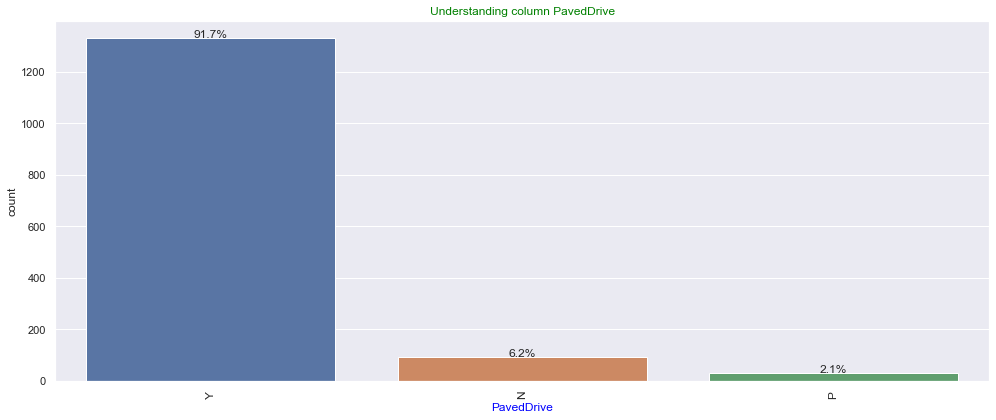

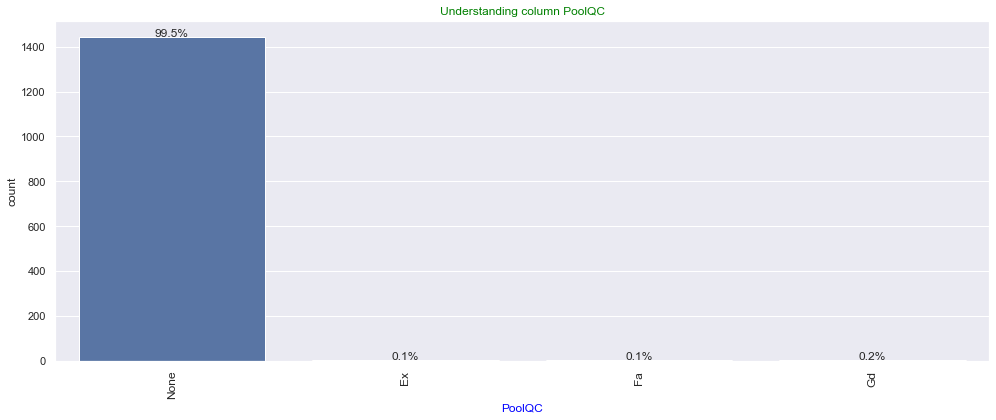

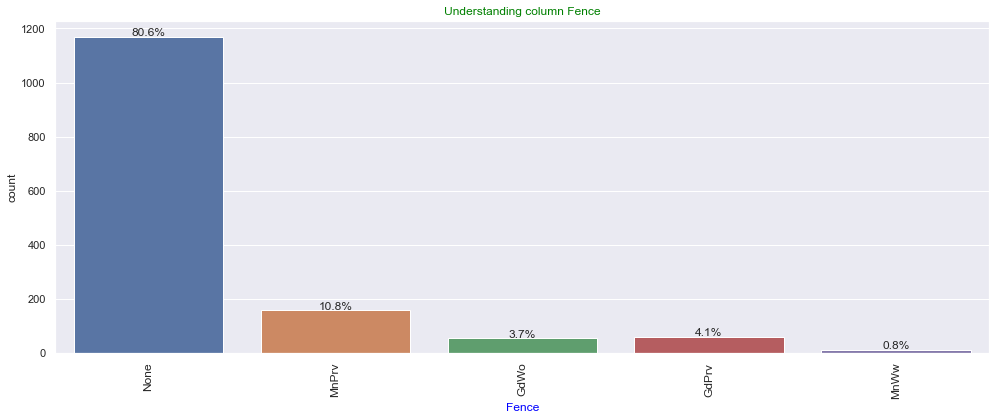

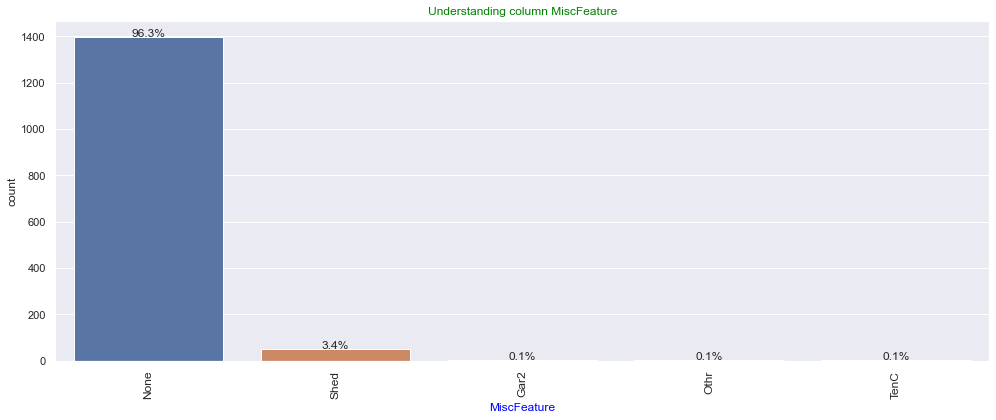

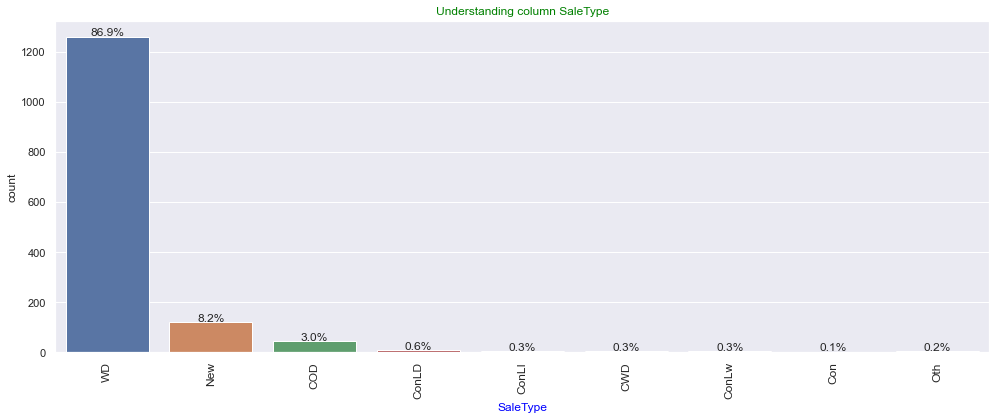

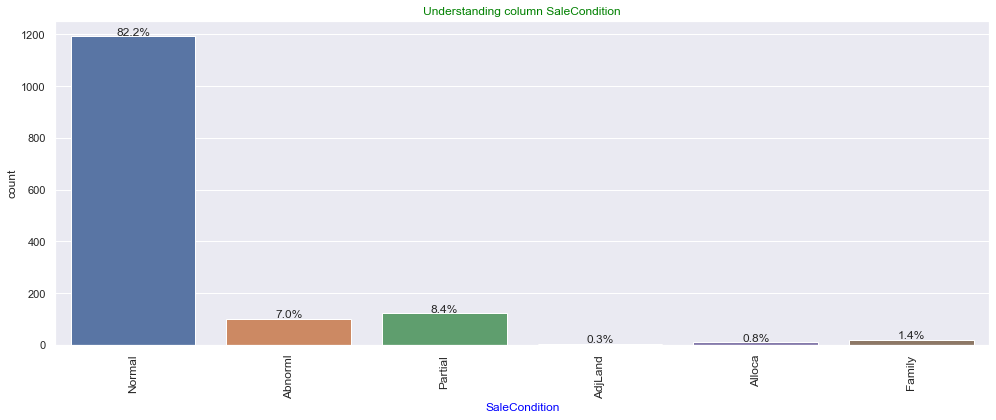

In [45]:
#Categorical data plotting.

#defining a custom count plot.
def Count_plot(df,col):
    plt.figure(figsize=[14,6])
    ax = sns.countplot(df[col],orient='v')
    for pt in ax.patches:
        height = pt.get_height()
        ax.text(pt.get_x()+pt.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(height/len(df) * 100),
                ha="center")
    plt.title("Understanding column {}".format(col),color='green',fontsize =12)
    plt.xticks(rotation =90,fontsize =12)
    plt.xlabel(col,color='blue',fontsize =12)
    plt.tight_layout()
    plt.show();
    
for col in cat_col:
    Count_plot(HousePredCopy_df,col)

## Categorical data analysis :
1. Droping 95% Skewed variables belonging to one class - Street, Utilities, Condition2, RoofMatl, Heating, PoolQC, MiscFeature.
2. Transforming ordinal categorical data to numerical value - LotShape, Exter Qual, Exter Cond, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFinType 2, HeatingQC, KitchenQual, Garage Finish, Garage Qual, FireplaceQu, LandSlope, CentralAir, Functional, Electrical, GarageCond, PavedDrive.

In [46]:
# Droping variables .
HousePredCopy_df.drop(columns = ['Street','Utilities','Condition2','RoofMatl','Heating',
                                 'PoolQC','MiscFeature'],
                      inplace=True)

In [47]:
#Transforming Ordinal Categorical data .

# Mapping :'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0
HousePredCopy_df['LotShape'] = HousePredCopy_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})

# Mapping :'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 
HousePredCopy_df['ExterQual'] = HousePredCopy_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2})

HousePredCopy_df['ExterCond'] = HousePredCopy_df['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

HousePredCopy_df['BsmtQual'] = HousePredCopy_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

HousePredCopy_df['BsmtCond'] = HousePredCopy_df['BsmtCond'].map({'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

HousePredCopy_df['BsmtExposure'] = HousePredCopy_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})

HousePredCopy_df['HeatingQC'] = HousePredCopy_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

HousePredCopy_df['KitchenQual'] = HousePredCopy_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2})

HousePredCopy_df['GarageQual'] = HousePredCopy_df['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3,
                                                                     'Fa': 2, 'Po': 1, 'None': 0})



HousePredCopy_df['FireplaceQu'] = HousePredCopy_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 
                                                                       'Fa': 2, 'Po': 1, 'None': 0})

HousePredCopy_df['GarageCond'] = HousePredCopy_df['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3,
                                                                     'Fa': 2, 'Po': 1, 'None': 0})


# Mapping :'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2,'Unf': 1, 'None': 0 .
HousePredCopy_df['BsmtFinType1'] = HousePredCopy_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2,
                                                                         'Unf': 1, 'None': 0})
HousePredCopy_df['BsmtFinType2'] = HousePredCopy_df['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2,
                                                                         'Unf': 1, 'None': 0})

#Mapping: 'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 
HousePredCopy_df['GarageFinish'] = HousePredCopy_df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

#Mapping: 'Sev': 3, 'Mod': 2, 'Gtl': 1
HousePredCopy_df['LandSlope'] = HousePredCopy_df['LandSlope'].map({'Sev': 3, 'Mod': 2, 'Gtl': 1})

#Mapping: 'Y': 1, 'N': 0
HousePredCopy_df['CentralAir'] = HousePredCopy_df['CentralAir'].map({'Y': 1, 'N': 0})

# Mapping :'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0 
HousePredCopy_df['Electrical'] = HousePredCopy_df['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2,
                                                                     'FuseP': 1, 'Mix': 0 })

# Mapping :'Typ': 7,'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2,'Sev': 1, 'Sal': 0 .
HousePredCopy_df['Functional'] = HousePredCopy_df['Functional'].map({'Typ': 7,'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3,
                                                                         'Maj2': 2,'Sev': 1, 'Sal': 0})

#Mapping: 'Y': 3, 'P': 2, 'N': 1
HousePredCopy_df['PavedDrive'] = HousePredCopy_df['PavedDrive'].map({'Y': 3, 'P': 2, 'N': 1})


In [48]:
#Checking the shape.
HousePredCopy_df.shape

(1451, 66)

In [49]:
#Displaying top 5 rows.
HousePredCopy_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley  LotShape LandContour  \
0         60       RL         65.0     8450  None         3         Lvl   
1         20       RL         80.0     9600  None         3         Lvl   
2         60       RL         68.0    11250  None         2         Lvl   
3         70       RL         60.0     9550  None         2         Lvl   
4         60       RL         84.0    14260  None         2         Lvl   

  LotConfig  LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch Fence  \
0    Inside          1      CollgCr  ...          61           0.0  None   
1       FR2          1      Veenker  ...           0           0.0  None   
2    Inside          1      CollgCr  ...          42           0.0  None   
3    Corner          1      Crawfor  ...          35         261.5  None   
4       FR2          1      NoRidge  ...          84           0.0  None   

   SaleType  SaleCondition  SalePrice IsRemodeled AgeOfHouseYear IsNewGarage  \
0        WD         Normal  12.247694           0              5           1   
1        WD         Normal  12.109011           0             31           0   
2        WD         Normal  12.317167           1              7           1   
3        WD        Abnorml  11.849398           1             91           0   
4        WD         Normal  12.429216           0              8           1   

   MoSoldQur  
0          1  
1          2  
2          3  
3          1  
4          4  

[5 rows x 66 columns]

In [50]:
#In MSZoning category, combing C,FV and RH to OtherZone.
House_dt = HousePredCopy_df['MSZoning'].value_counts()/len(HousePredCopy_df)*100
House_dt = House_dt[House_dt < 5.]

HousePredCopy_df['MSZoning'] = HousePredCopy_df['MSZoning'].replace(House_dt.index ,'OtherZone') 

In [51]:
#In LandContour,combining Bnk,HLS,Low to NONFlat category. 
House_dt = HousePredCopy_df['LandContour'].value_counts()/len(HousePredCopy_df)*100
House_dt = House_dt[House_dt < 5.]

HousePredCopy_df['LandContour'] = HousePredCopy_df['LandContour'].replace(House_dt.index ,'NONFlat') 

In [52]:
#In LotConfig,combining FR2,and FR3 to FR category.
House_dt = HousePredCopy_df['LotConfig'].value_counts()/len(HousePredCopy_df)*100
House_dt = House_dt[House_dt < 5.]

HousePredCopy_df['LotConfig'] = HousePredCopy_df['LotConfig'].replace(House_dt.index ,'FR')

In [53]:
#In Condition1,combining categories which contribute less than 5% to OtherProx  .
House_dt = HousePredCopy_df['Condition1'].value_counts()/len(HousePredCopy_df)*100
House_dt = House_dt[House_dt < 5.]

HousePredCopy_df['Condition1'] = HousePredCopy_df['Condition1'].replace(House_dt.index ,'OtherProx')

In [54]:
# Combining categories less than 5% in RoofStyle to OtherStyle.
House_dt = HousePredCopy_df['RoofStyle'].value_counts()/len(HousePredCopy_df)*100
House_dt = House_dt[House_dt < 5.]

HousePredCopy_df['RoofStyle'] = HousePredCopy_df['RoofStyle'].replace(House_dt.index ,'OtherStyle')

In [55]:
# Combining categories less than 5% in Exterior1st and Exterior2nd to OtherCov.
House_dt = HousePredCopy_df['Exterior1st'].value_counts()/len(HousePredCopy_df)*100
House_dt = House_dt[House_dt < 5.]

HousePredCopy_df['Exterior1st'] = HousePredCopy_df['Exterior1st'].replace(House_dt.index ,'OtherCov')

House_dt = HousePredCopy_df['Exterior2nd'].value_counts()/len(HousePredCopy_df)*100
House_dt = House_dt[House_dt < 5.]

HousePredCopy_df['Exterior2nd'] = HousePredCopy_df['Exterior2nd'].replace(House_dt.index ,'OtherCov')

In [56]:
# Combining categories less than 5% in Foundation,GarageType,SaleType,SaleCondition to Others.
col_list = ['Foundation','GarageType','SaleType','SaleCondition']

for col in col_list:
    House_dt = HousePredCopy_df[col].value_counts()/len(HousePredCopy_df)*100
    House_dt = House_dt[House_dt < 5.]
    HousePredCopy_df[col] = HousePredCopy_df[col].replace(House_dt.index ,'Others')

### 3.3. Bivariate Analysis.

##### 3.3.1 Numerical Data - correlation matrix and scatter plot.

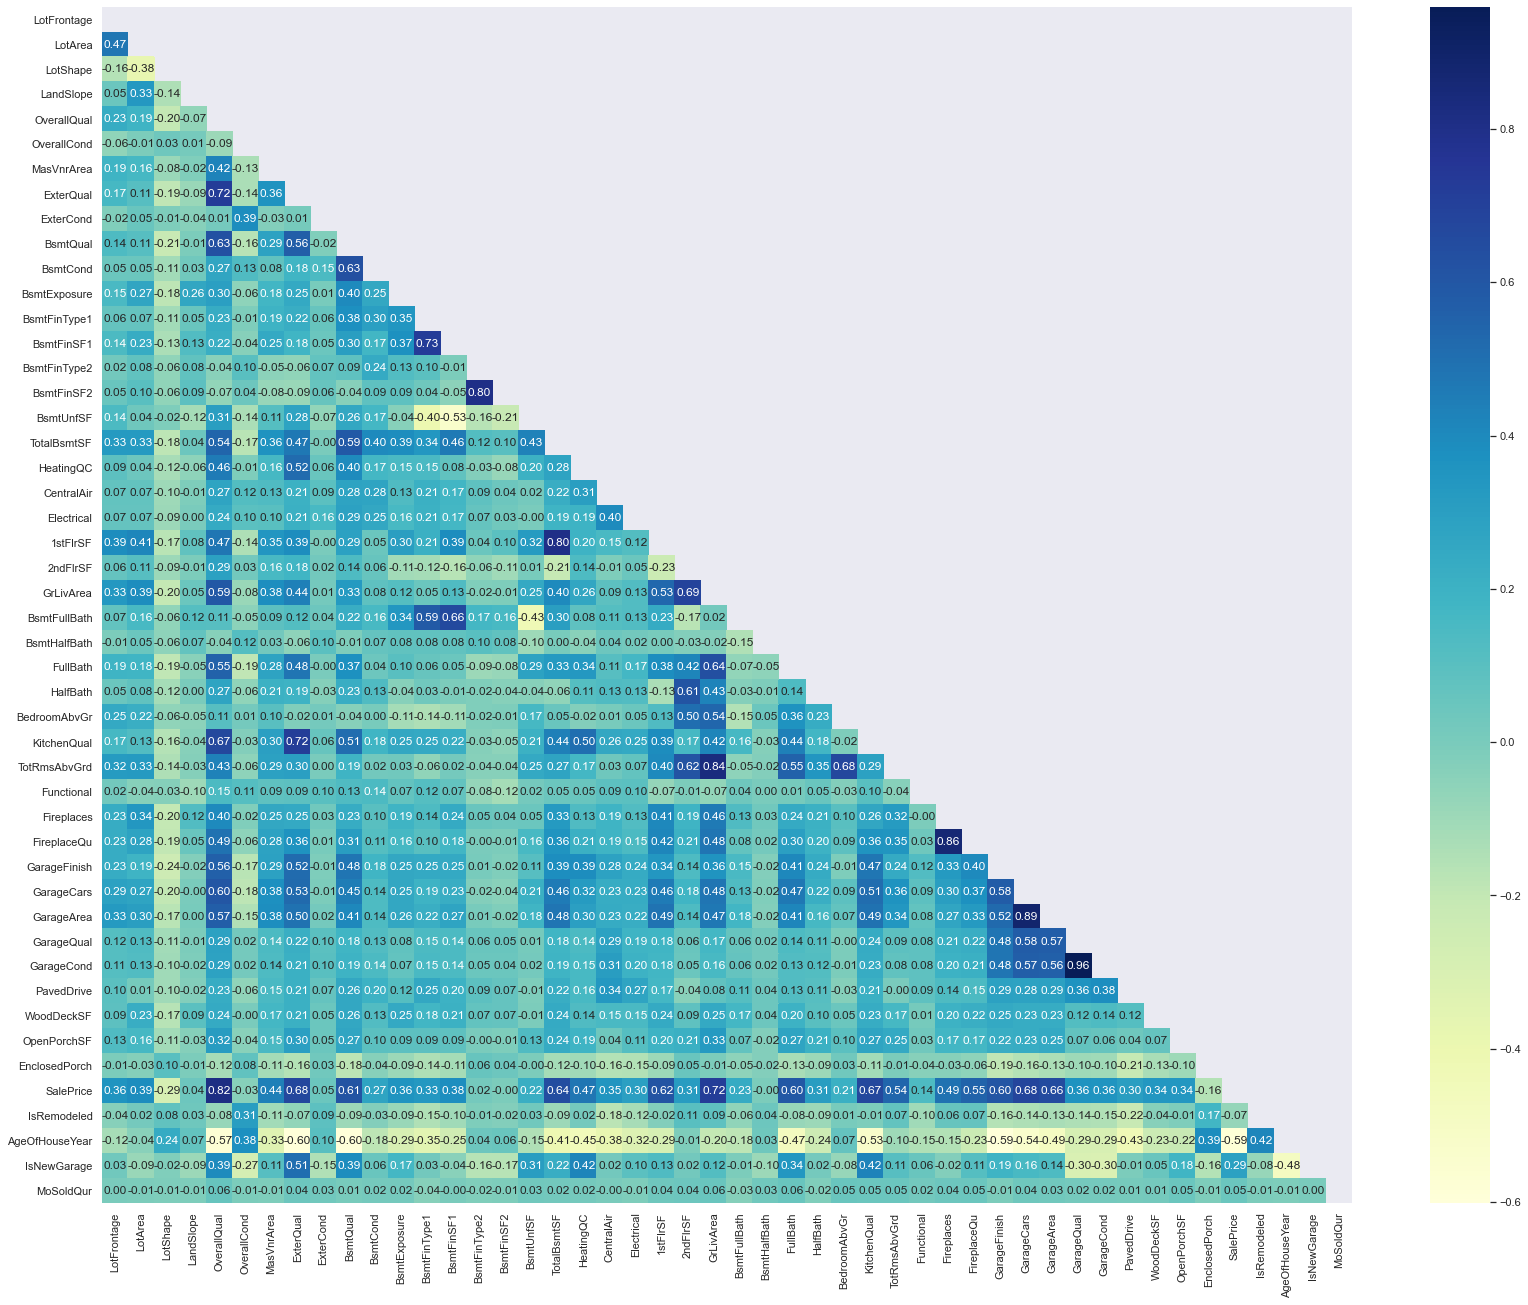

In [57]:
# Correlation matrix of numerical data. 
corr_NoDiff = HousePredCopy_df.corr()
mask =np.zeros_like(corr_NoDiff)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=[28,22])
sns.heatmap(corr_NoDiff,mask=mask, annot = True, cmap="YlGnBu",fmt="0.2f")
plt.show()

In [58]:
#Finding top 10 correlation :
corr_NoDiff_abs = corr_NoDiff.abs()
corr_NoDiff_abs = corr_NoDiff_abs.unstack().sort_values(kind = 'quicksort',ascending = False)
corr_NoDiff_abs = corr_NoDiff_abs.dropna()
corr_NoDiff_abs = corr_NoDiff_abs[corr_NoDiff_abs != 1.0]
#printing top 10 correlation :
print('Top 10 Correlation attributes:')
print(corr_NoDiff_abs[:20:2])

Top 10 Correlation attributes:
GarageCond    GarageQual      0.959154
GarageArea    GarageCars      0.891013
Fireplaces    FireplaceQu     0.863958
TotRmsAbvGrd  GrLivArea       0.836801
OverallQual   SalePrice       0.816617
BsmtFinSF2    BsmtFinType2    0.804084
1stFlrSF      TotalBsmtSF     0.801691
BsmtFinType1  BsmtFinSF1      0.725662
OverallQual   ExterQual       0.724739
SalePrice     GrLivArea       0.717648
dtype: float64


#### Dropping highly correlated variables :
- Dropping columns that have a correlation value higher than 0.8.
- Droping columns GarageCond,GarageArea,Fireplaces,TotRmsAbvGrd,BsmtFinSF2, 1stFlrSF

In [59]:
# Droping variables .
HousePredCopy_df.drop(columns = ['GarageCond','GarageArea','Fireplaces','TotRmsAbvGrd',
                                 'BsmtFinSF2','1stFlrSF'],inplace=True)

In [60]:
HousePredCopy_df.select_dtypes(include=['float64','int64']).columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice',
       'IsRemodeled', 'AgeOfHouseYear', 'IsNewGarage', 'MoSoldQur'],
      dtype='object')

In [61]:
#Defining a custom Scatter plot.
def Numeric_Scatterplot(df,col,target):
    plt.figure(figsize=[12,6])
    
    sns.scatterplot(x=col,y=target,data=df)     
    plt.title("Plot of {0} VS {1}".format(col,target),color='green',fontsize =12)
    plt.xlabel(col,color='blue',fontsize =10)
    plt.ylabel(target,color='blue',fontsize =10)
    
    plt.tight_layout()
    plt.show();

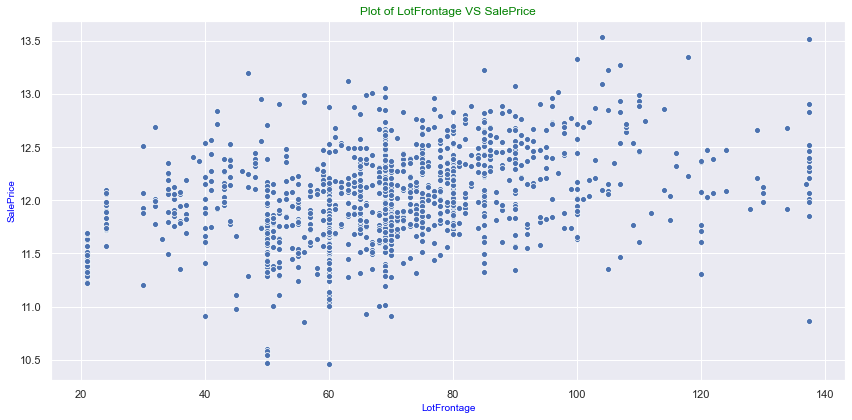

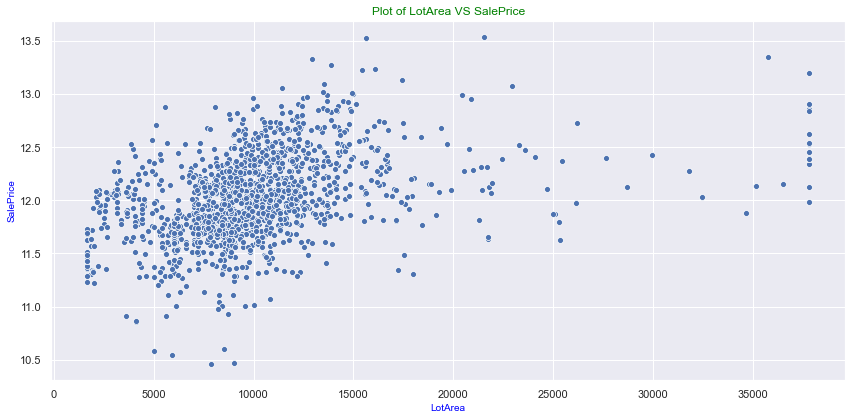

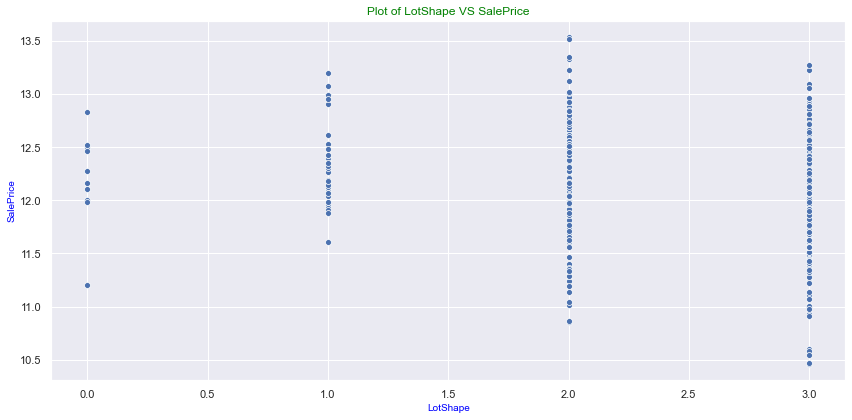

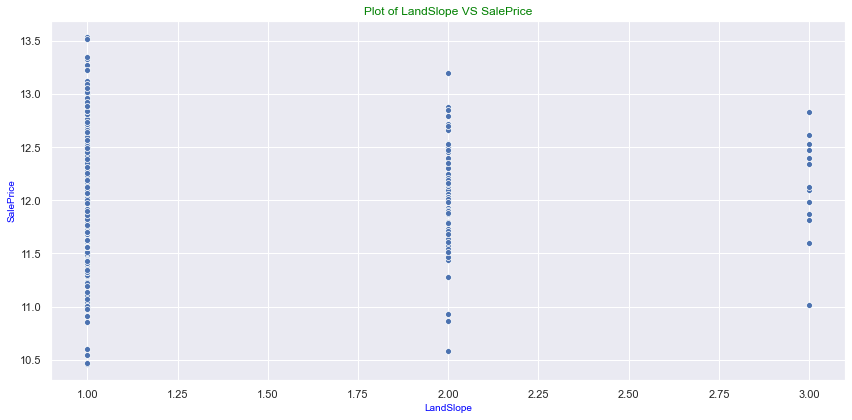

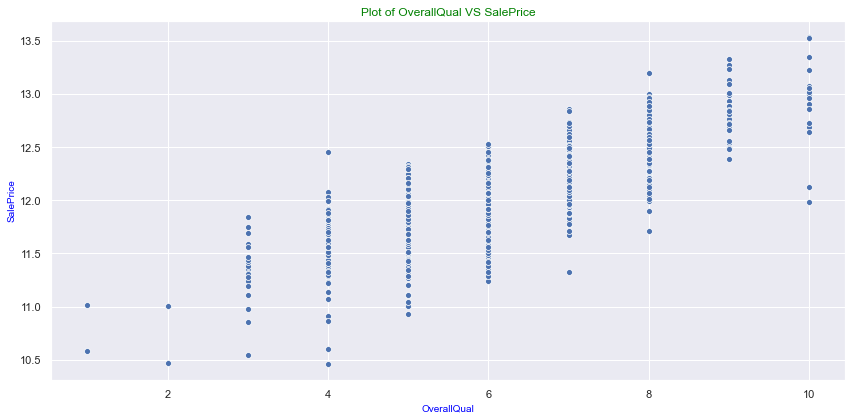

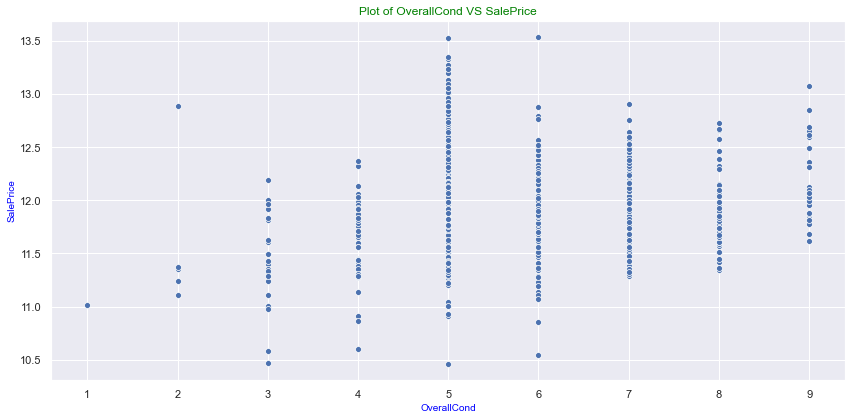

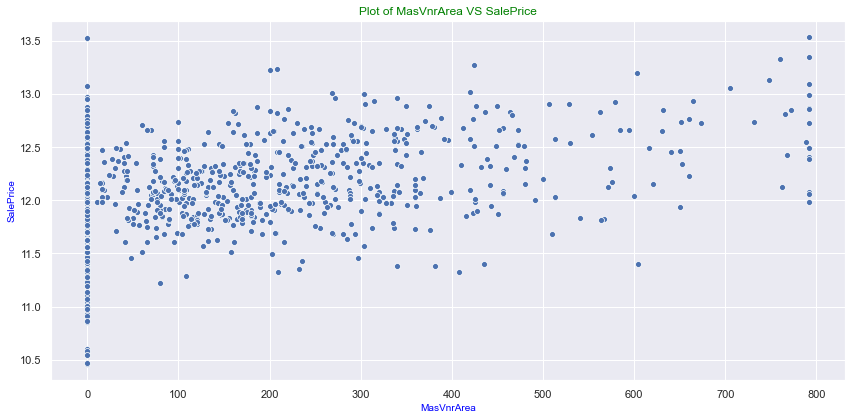

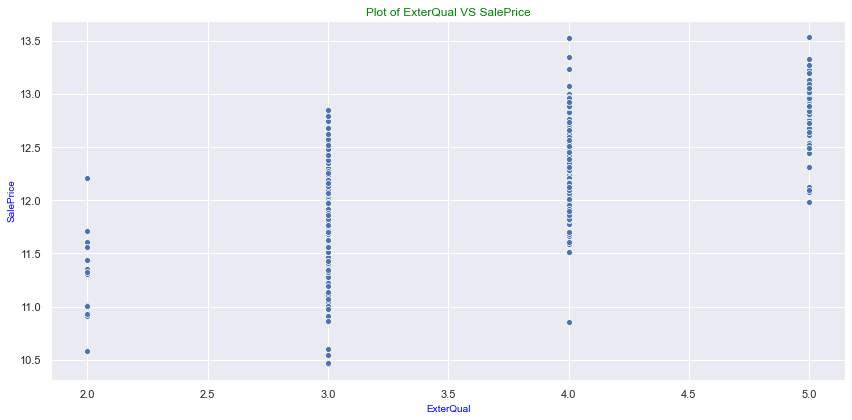

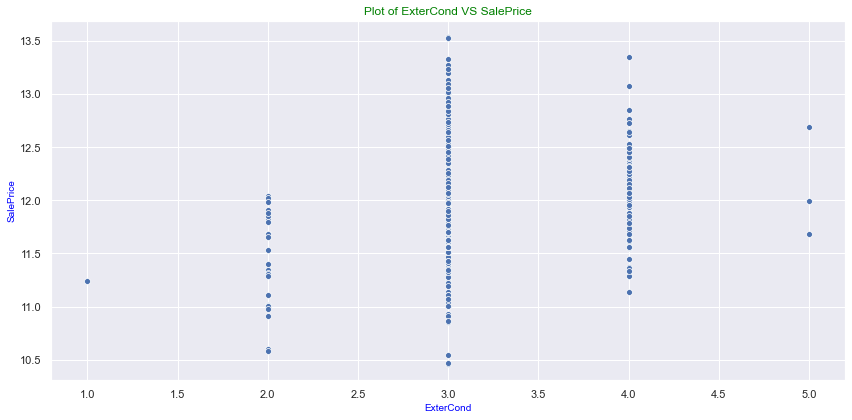

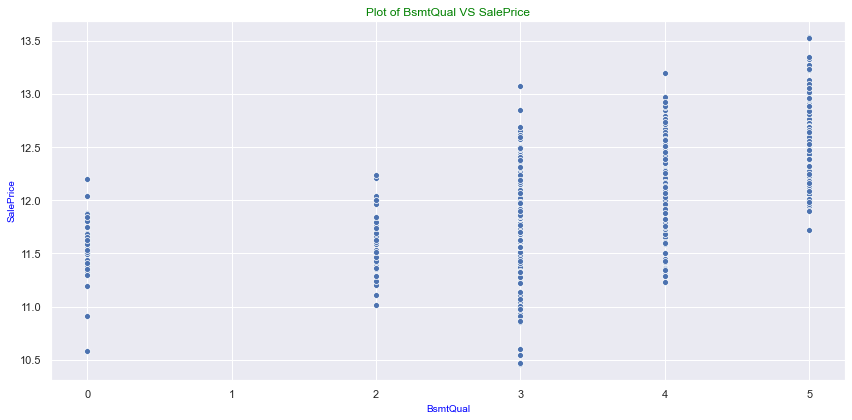

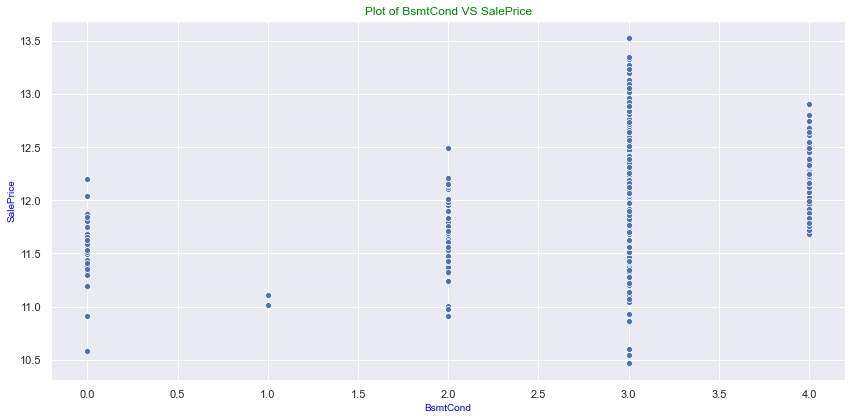

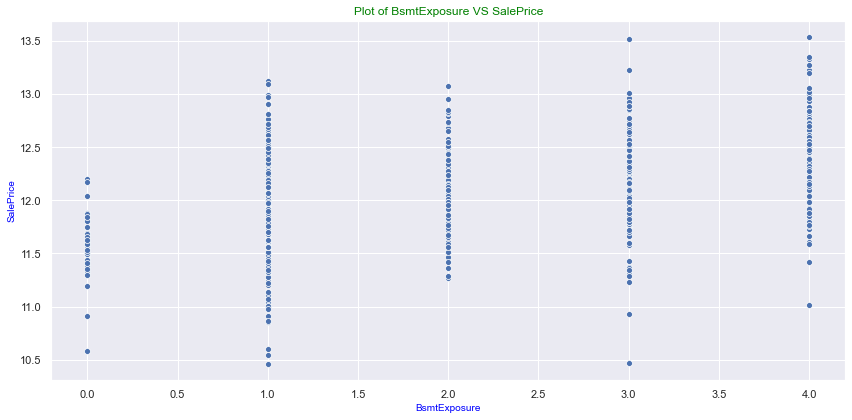

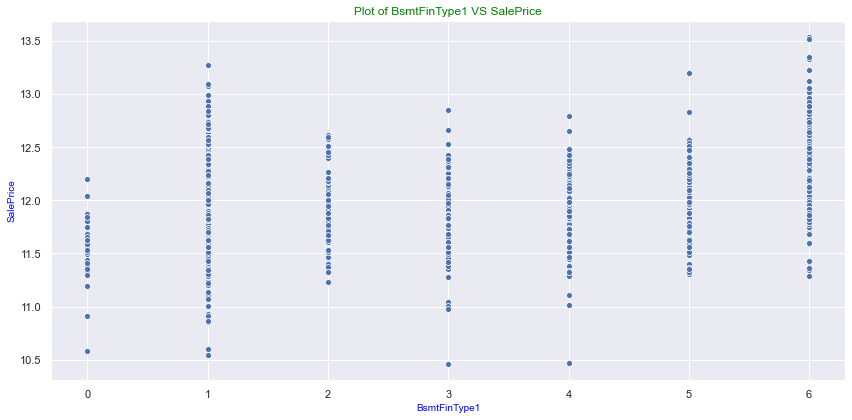

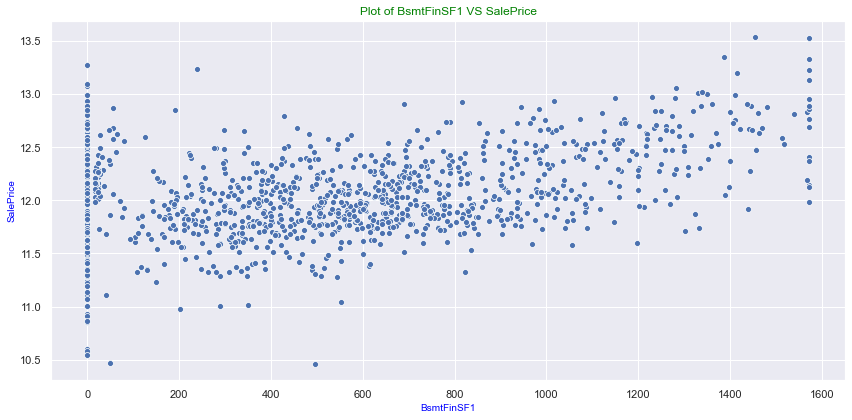

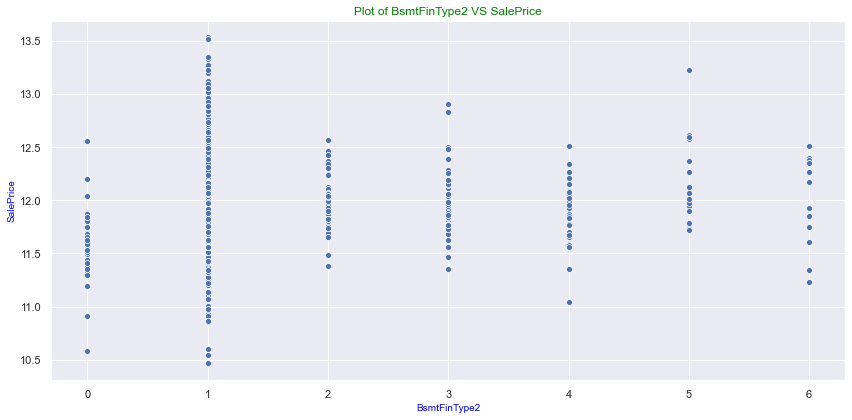

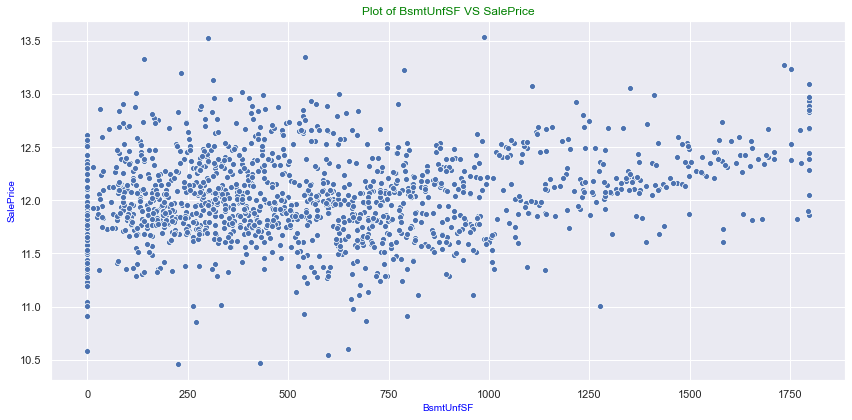

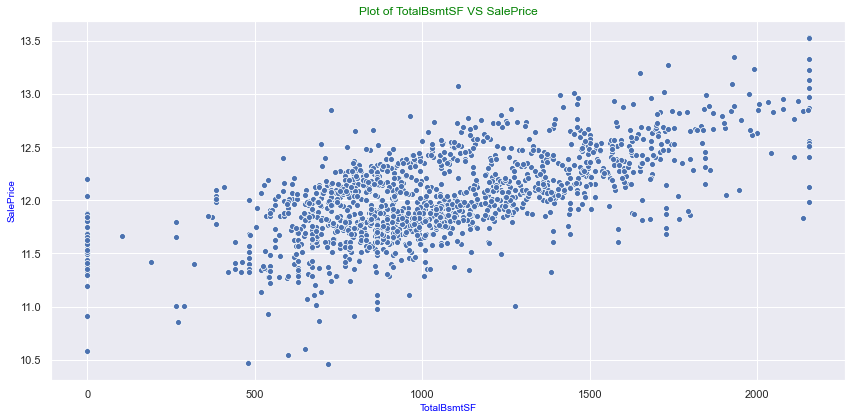

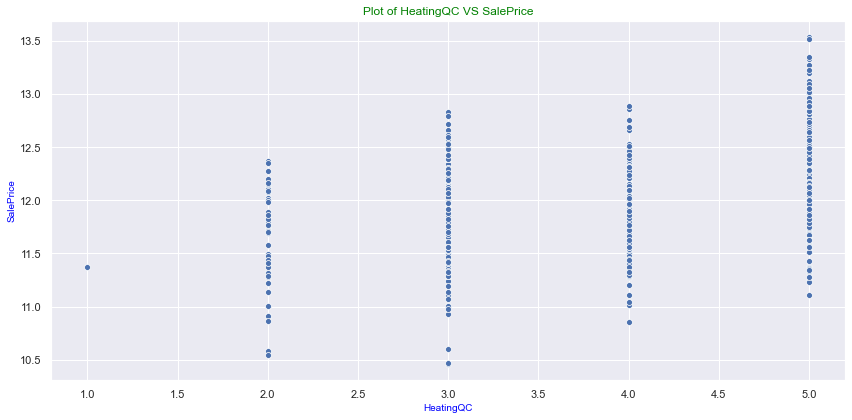

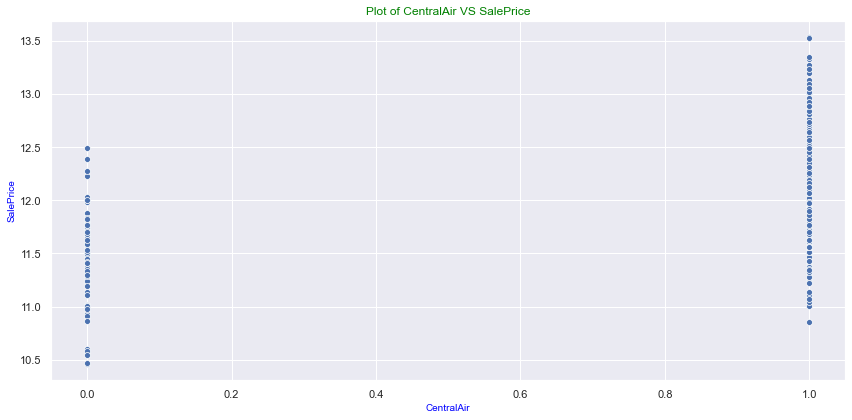

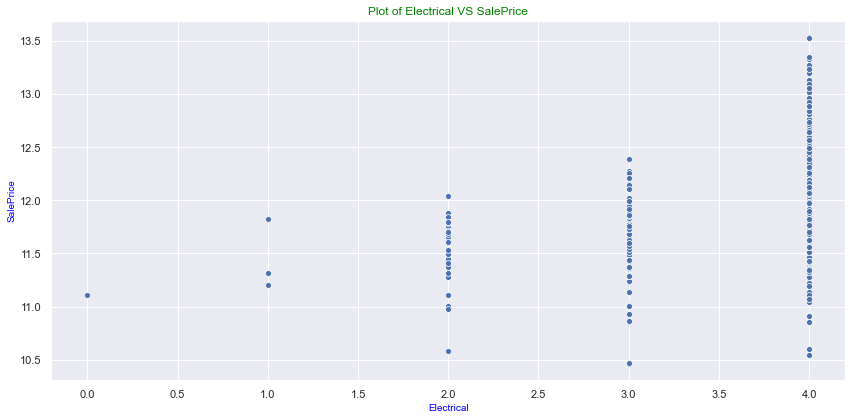

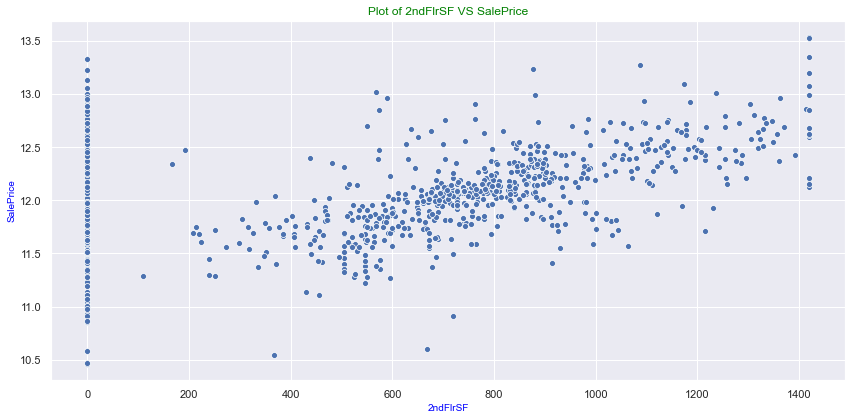

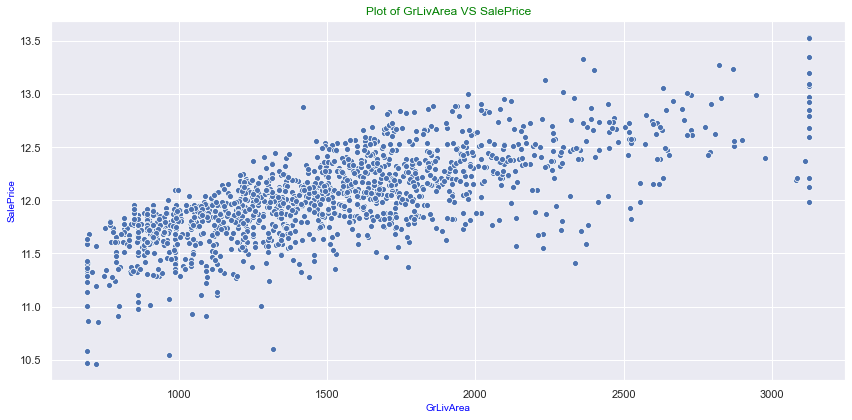

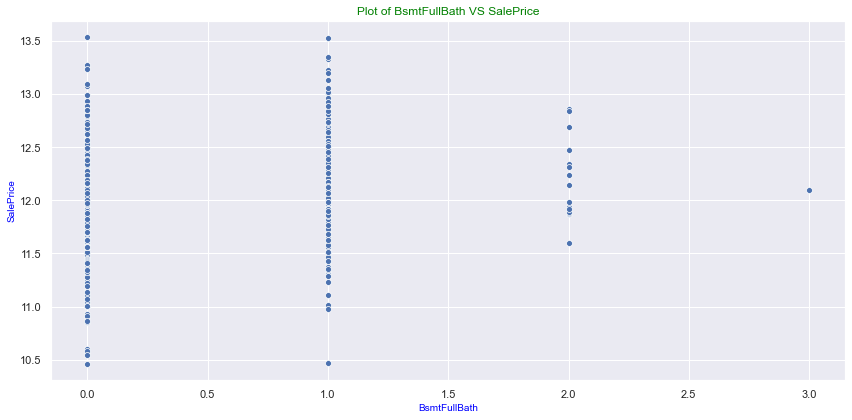

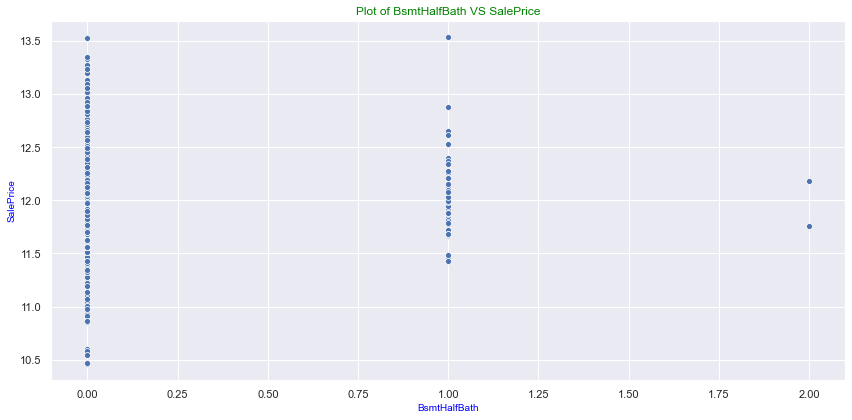

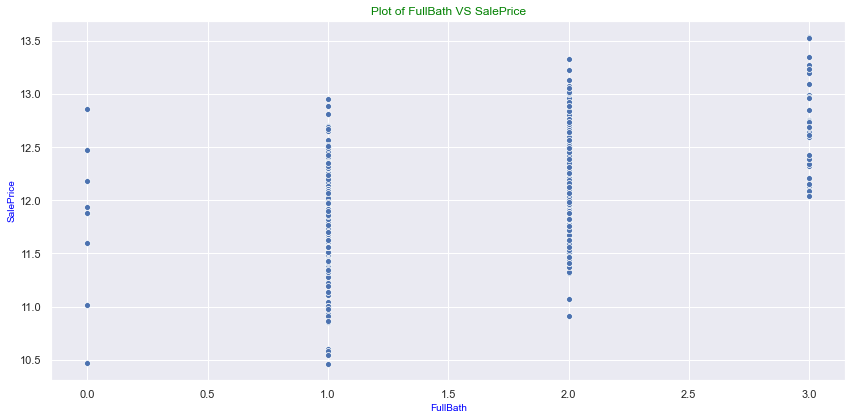

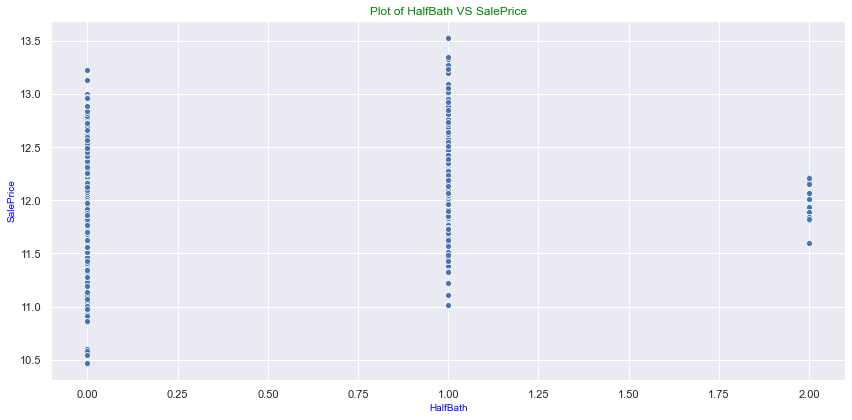

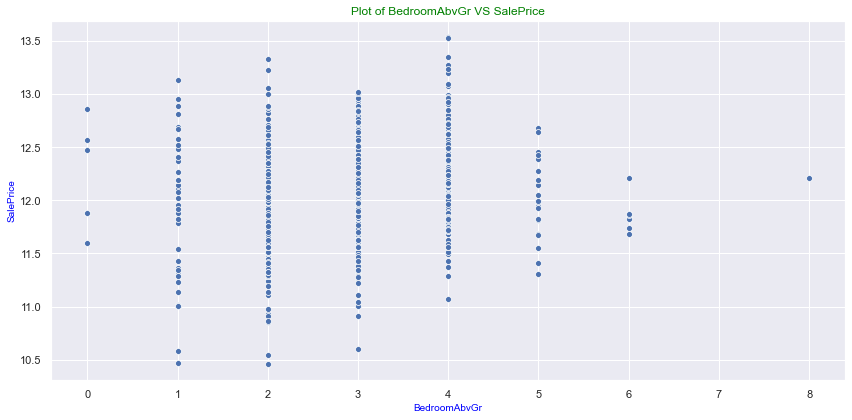

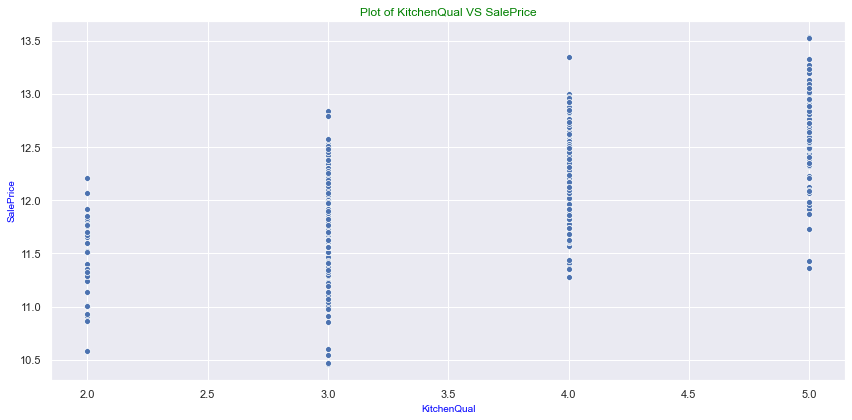

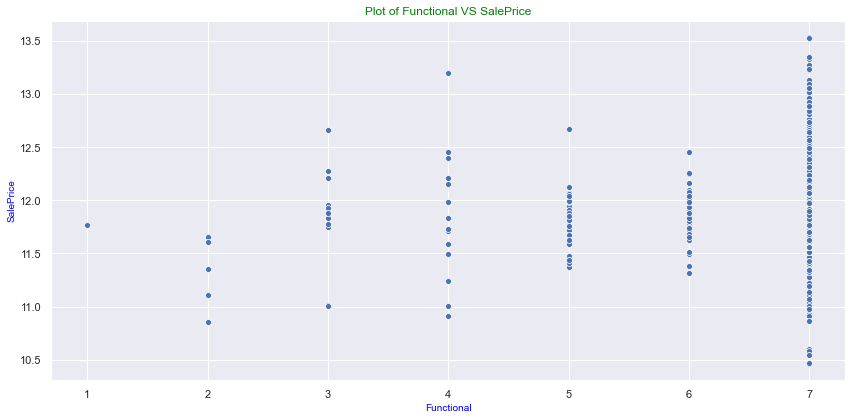

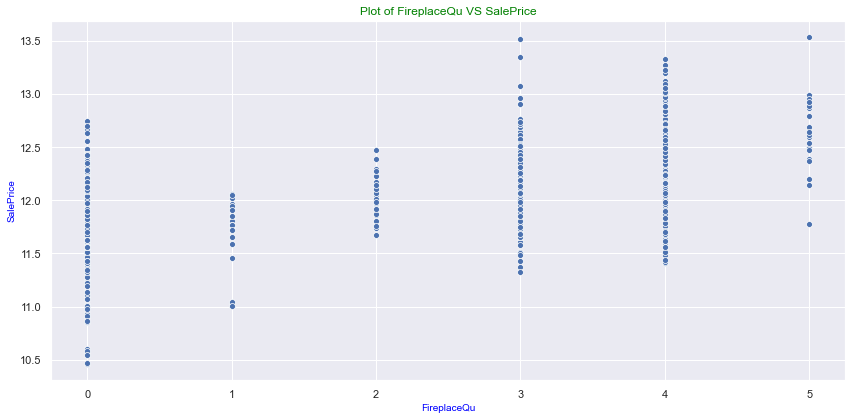

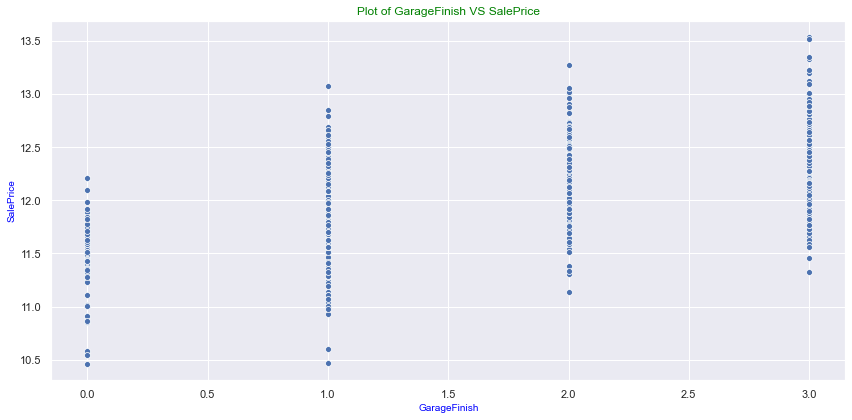

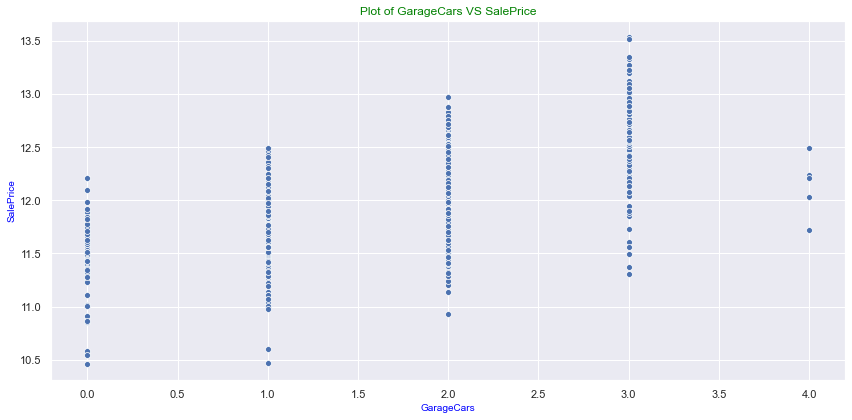

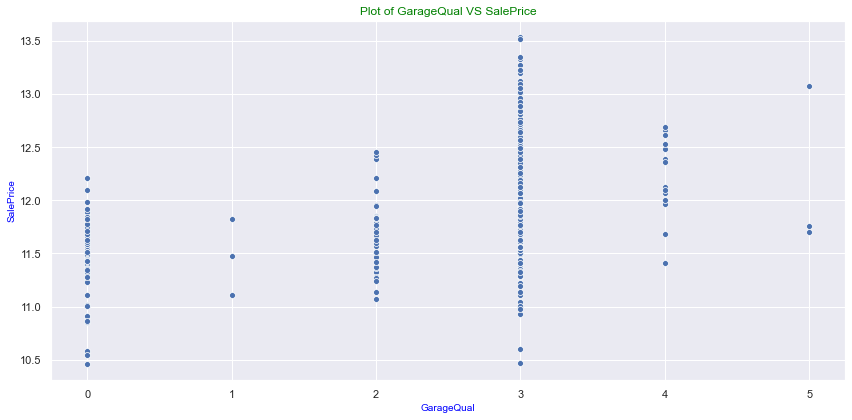

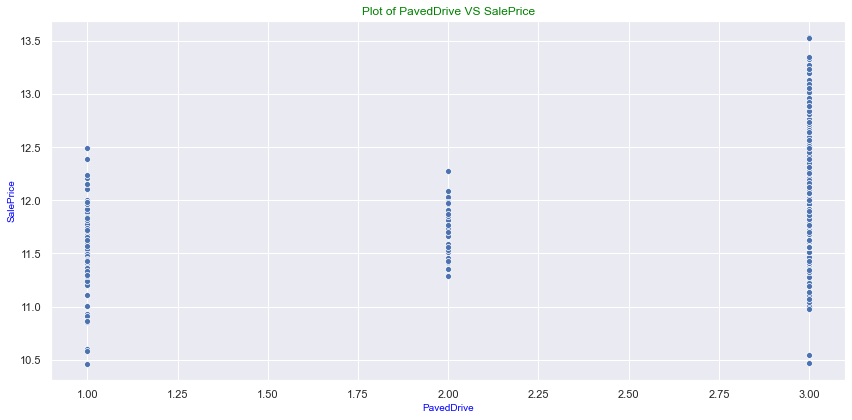

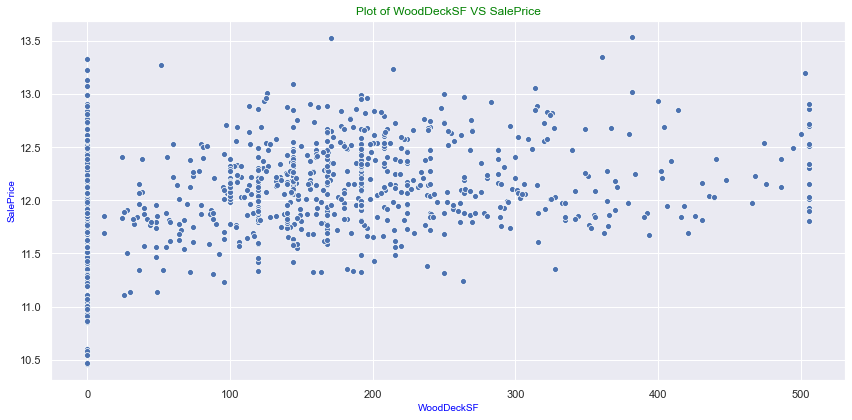

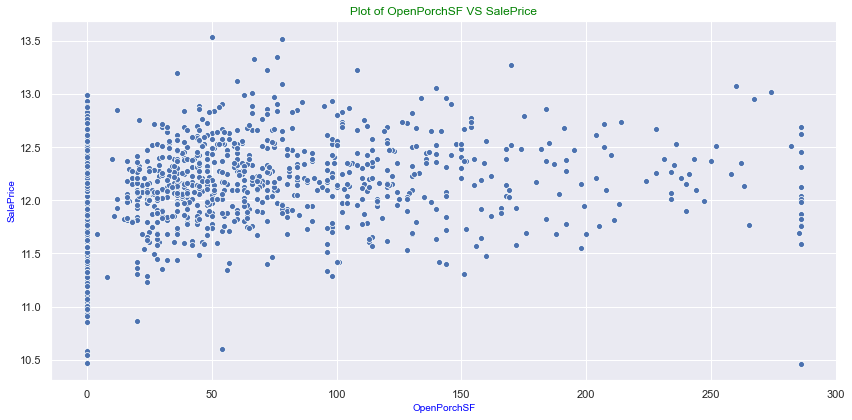

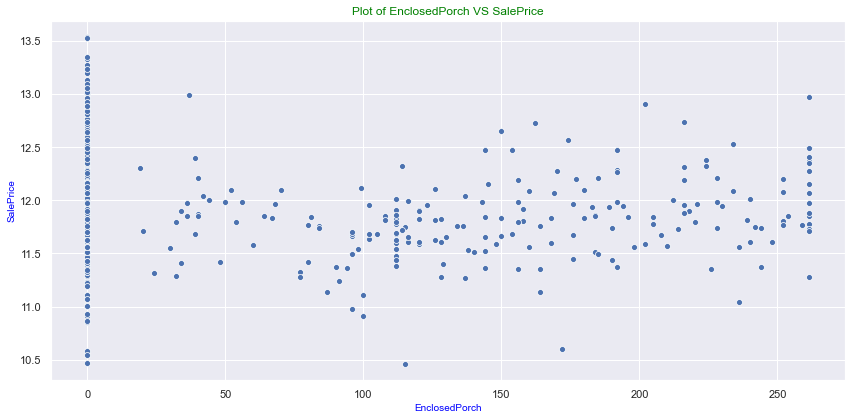

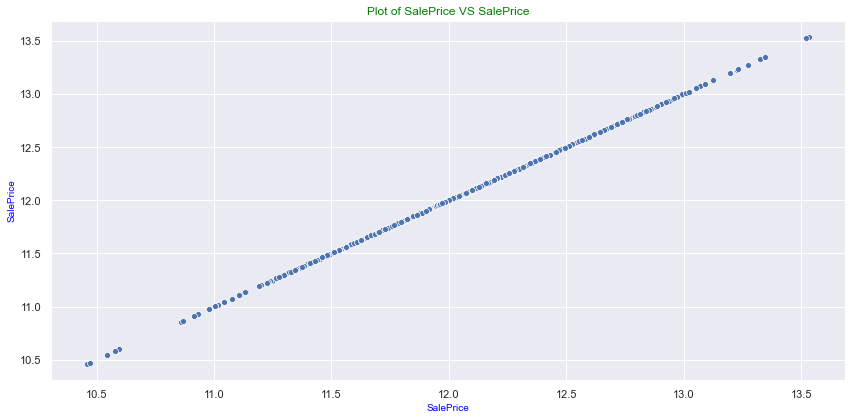

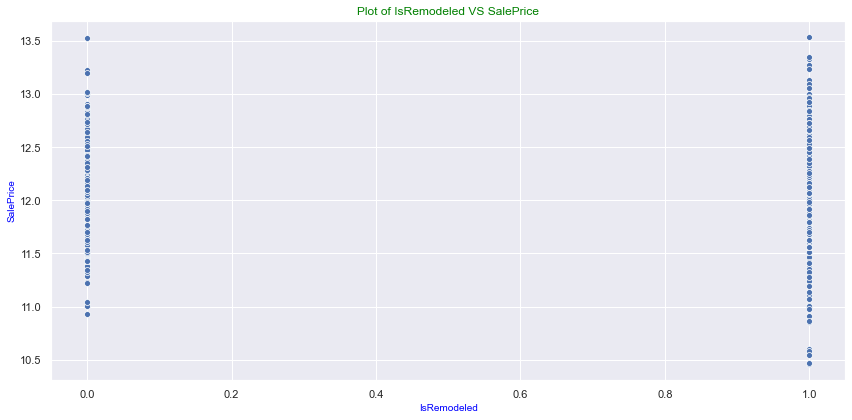

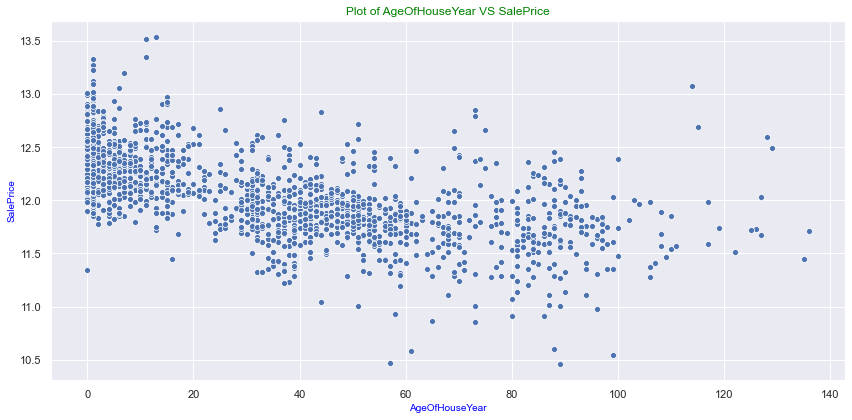

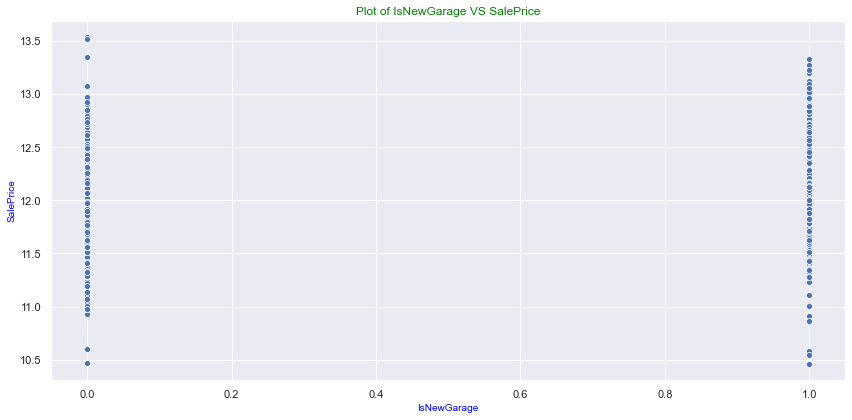

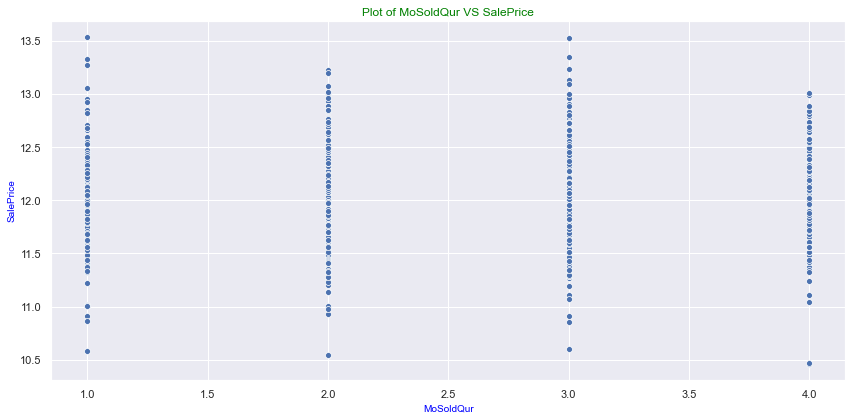

In [62]:
#Plotting Sales price VS numerical Data plot.
for col in HousePredCopy_df.select_dtypes(include=['float64','int64']).columns:
    Numeric_Scatterplot(HousePredCopy_df,col,'SalePrice')

#### Inference from Scatter Plot .
1. Features like OverallQual,MASVnrArea,ExterQual,BsmtFinSF1,HeatingQC,TotalBsmtSF,2ndflrSF,GrLivArea,GarageFinish,GarageCars shows a positive correlation.and AgeOfHouseYear shows a negative correlation.


##### 3.3.2 Categorical Data - Box plot of SalesPrice VS categories.

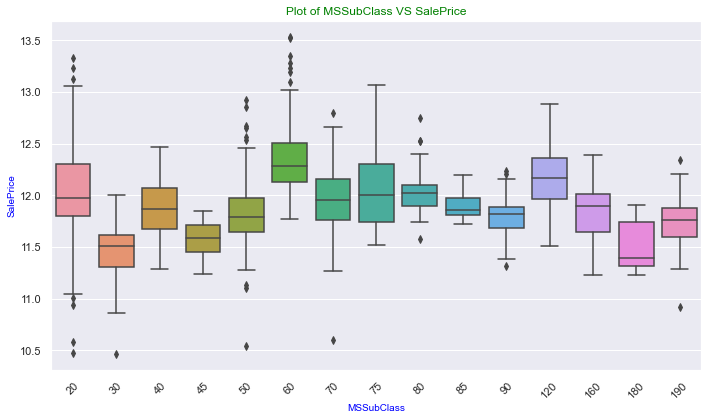

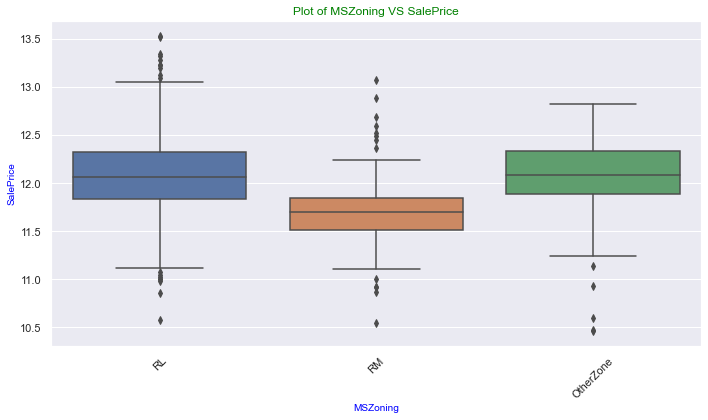

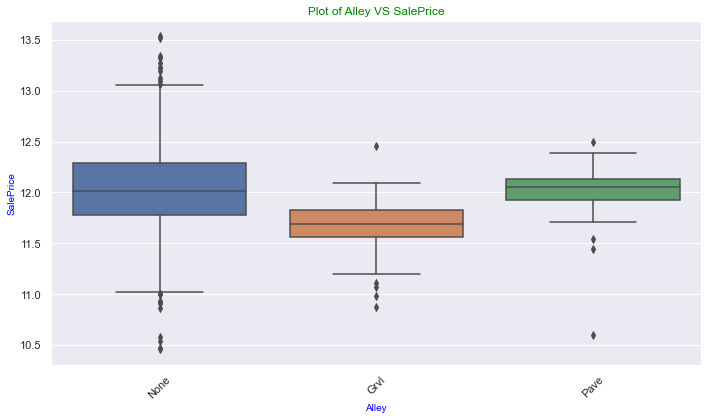

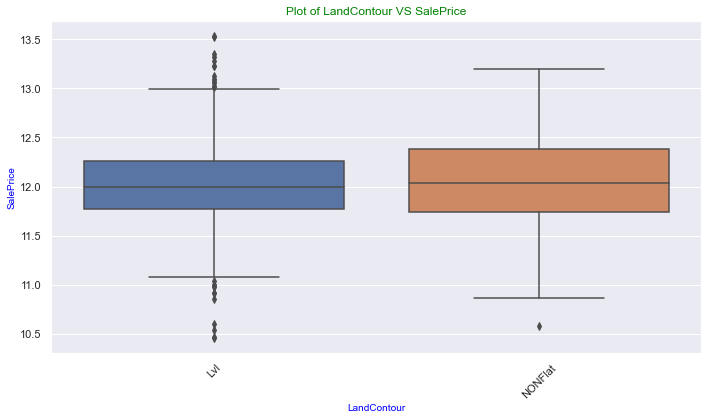

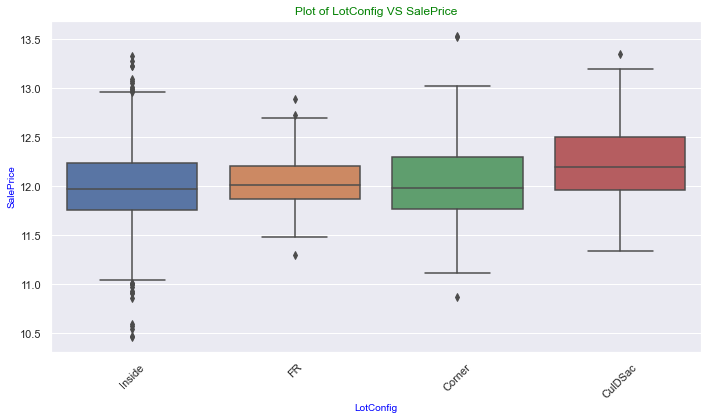

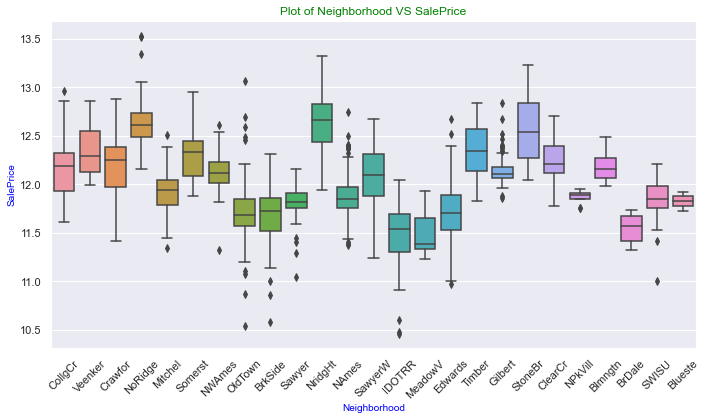

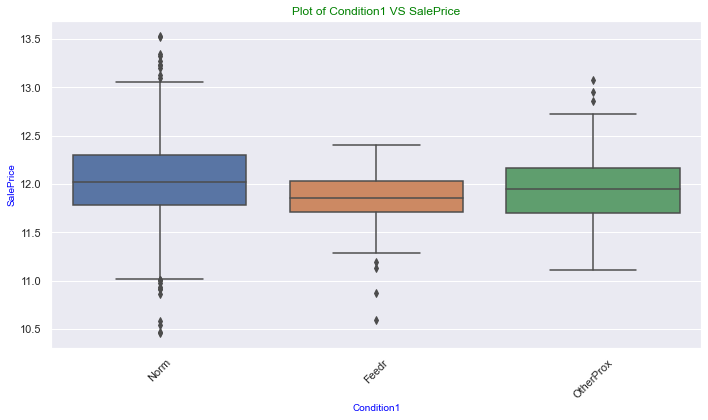

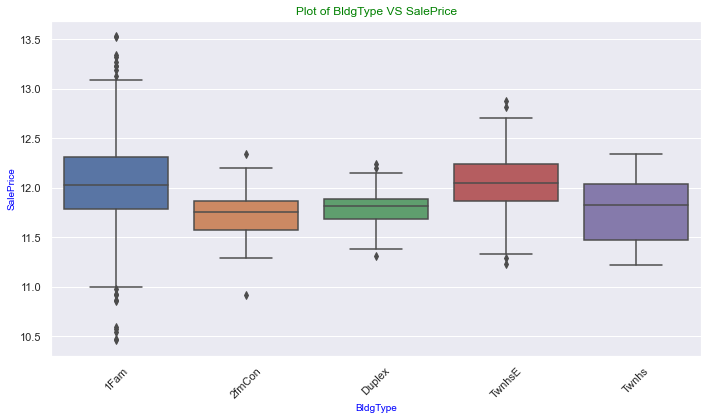

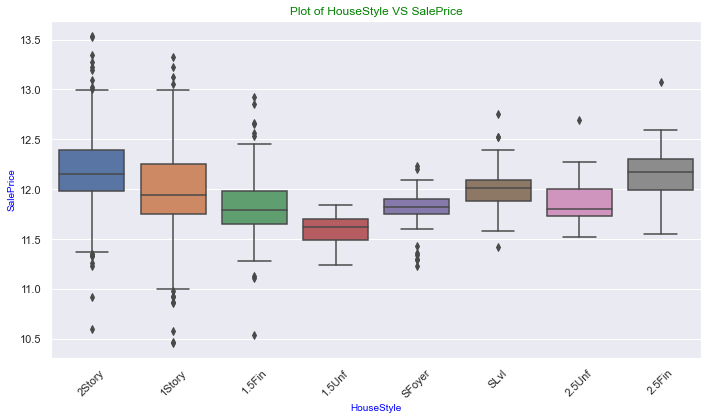

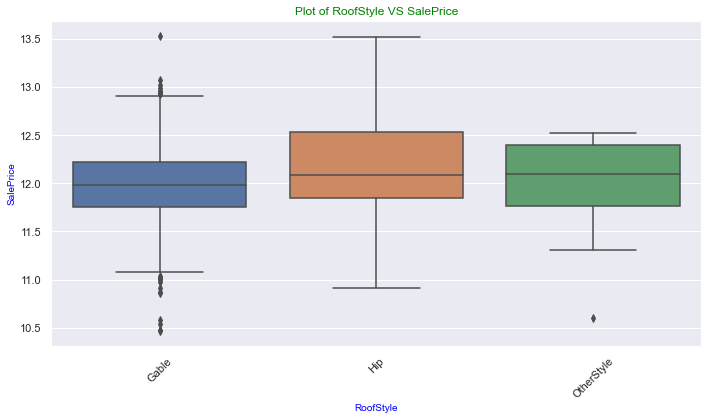

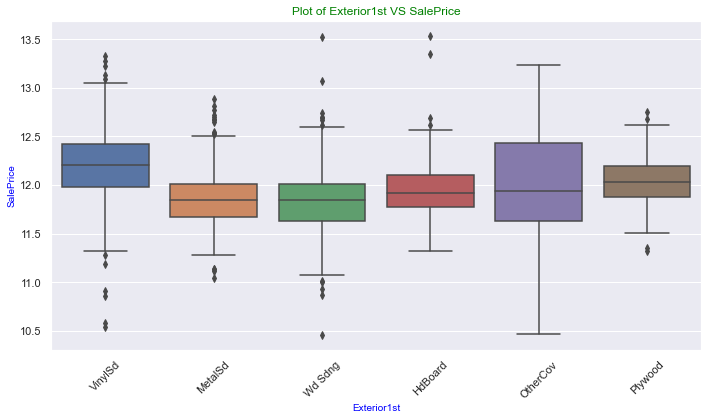

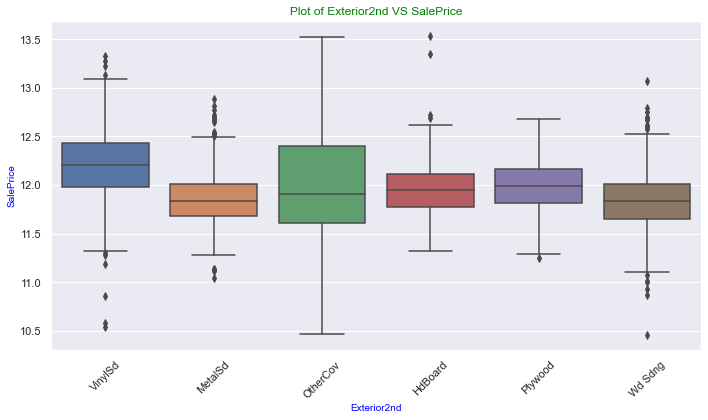

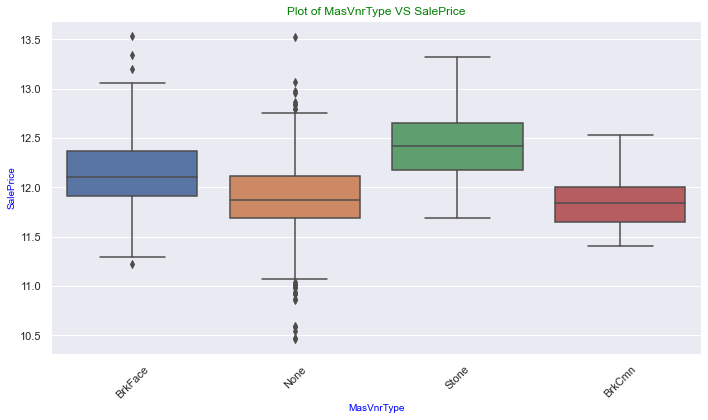

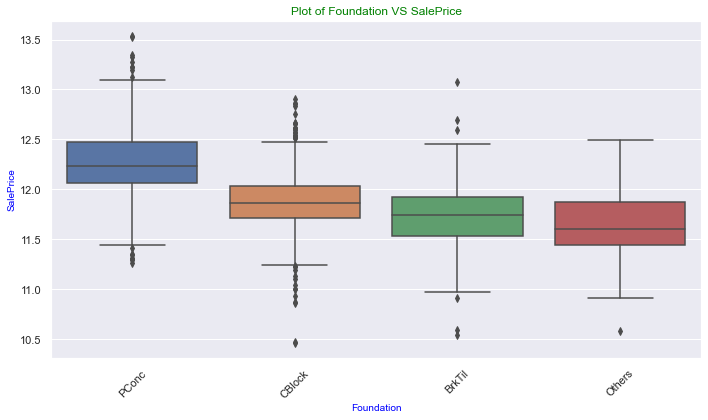

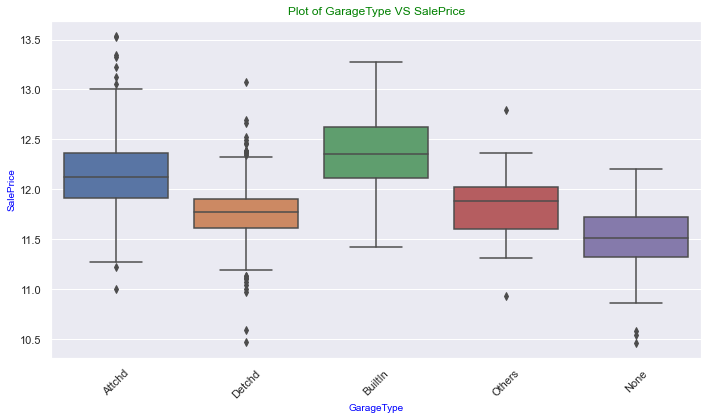

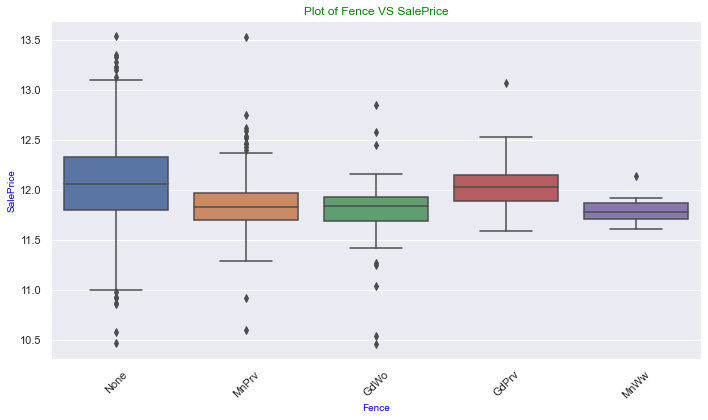

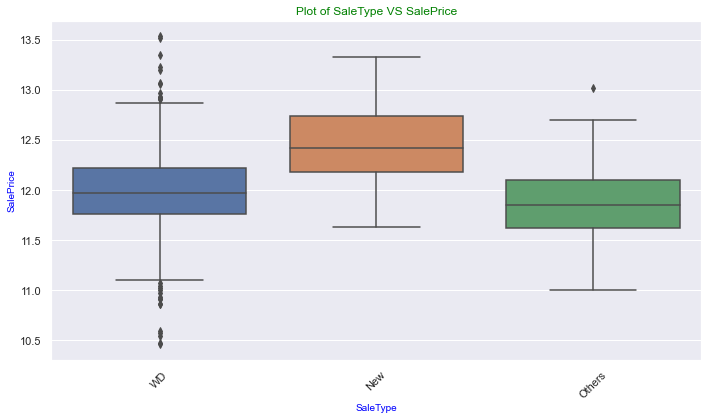

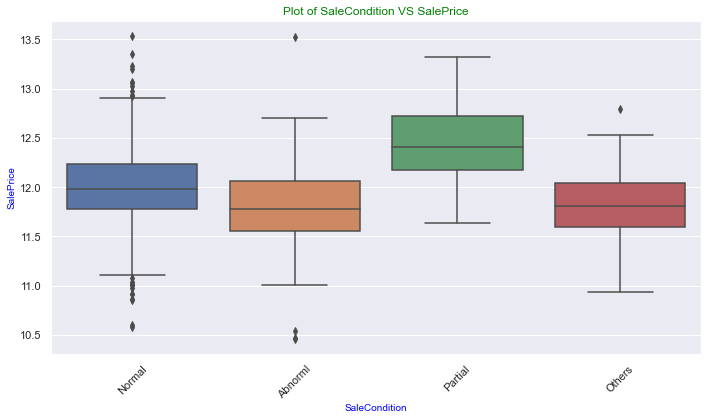

In [63]:
#Plotting Boxplot for categorical columns.

for col in HousePredCopy_df.select_dtypes(include='object').columns:
    plt.figure(figsize=[10,6])
    sns.boxplot(x=col, y='SalePrice', data=HousePredCopy_df)
    plt.title("Plot of {0} VS SalePrice".format(col),color='green',fontsize =12)
    plt.xlabel(col,color='blue',fontsize =10)
    plt.ylabel('SalePrice',color='blue',fontsize =10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show();
    

### Key indicators for higher Sale price :
- Northridge Heights and Stone Brook Neighborhood have higer house price rate.
- In general, 2 or 2.5 storied houses have higher rate.
- Poured Contrete foundation and Built in garages have higher price rate.
- Newly constructed houses have higher selling price.

### 4. Dummy variable creation.

#### 4.1. For categorical variables with multiple levels, create dummy features (one-hot encoded).

In [64]:
#Dummy variable creation for multi-class category.
catcol_list = HousePredCopy_df.select_dtypes(include='object').columns

# Creating a dummy variable for Nominal categorical variables.
dummy1 = pd.get_dummies(HousePredCopy_df[catcol_list])

#Dropping one column from each category because of redundancy.
dummy1.drop(columns = ['MSSubClass_40', 'MSZoning_OtherZone', 'LandContour_NONFlat', 'LotConfig_FR', 'Neighborhood_Blueste',
                       'Condition1_Feedr', 'BldgType_2fmCon', 'HouseStyle_2.5Fin', 'RoofStyle_OtherStyle', 'Exterior1st_Plywood',
                       'Exterior2nd_Plywood', 'MasVnrType_BrkCmn', 'Foundation_Others', 'GarageType_Others', 'SaleType_Others',
                       'SaleCondition_Others','Alley_Pave'],inplace=True)

In [65]:
# Adding the results to the master dataframe
HousePredCopy_df = pd.concat([HousePredCopy_df, dummy1], axis=1)

In [66]:
#Droping duplicate values.
HousePredCopy_df.drop(columns =catcol_list,inplace=True)

In [67]:
#Understanding the columns.
HousePredCopy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 133 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(7), int64(35), uint8(91)
memory usage: 648.7 KB


In [68]:
#Finding top 20 correlation :
corr_NoDiff = HousePredCopy_df.corr()
corr_NoDiff_abs = corr_NoDiff.abs()
corr_NoDiff_abs = corr_NoDiff_abs.unstack().sort_values(kind = 'quicksort',ascending = False)
corr_NoDiff_abs = corr_NoDiff_abs.dropna()
corr_NoDiff_abs = corr_NoDiff_abs[corr_NoDiff_abs != 1.0]
#printing top 20 correlation :
print('Top 20 Correlation attributes:')
print(corr_NoDiff_abs[:40:2])

Top 20 Correlation attributes:
SaleCondition_Partial  SaleType_New            0.986516
Exterior1st_VinylSd    Exterior2nd_VinylSd     0.977327
Exterior2nd_MetalSd    Exterior1st_MetalSd     0.973036
GarageType_None        GarageQual              0.942478
HouseStyle_SLvl        MSSubClass_80           0.941357
HouseStyle_1.5Fin      MSSubClass_50           0.940830
RoofStyle_Gable        RoofStyle_Hip           0.933200
HouseStyle_1.5Unf      MSSubClass_45           0.925176
Exterior2nd_HdBoard    Exterior1st_HdBoard     0.883147
Exterior1st_Wd Sdng    Exterior2nd_Wd Sdng     0.861636
OverallQual            SalePrice               0.816617
2ndFlrSF               HouseStyle_2Story       0.814474
MSZoning_RL            MSZoning_RM             0.813371
MasVnrType_None        MasVnrType_BrkFace      0.805745
HouseStyle_1Story      2ndFlrSF                0.793645
Exterior2nd_OtherCov   Exterior1st_OtherCov    0.782115
Foundation_CBlock      Foundation_PConc        0.780367
MSSubClass_120   

#### Dropping highly correlated dummy variables :
- Dropping columns that have a correlation value higher than 0.8.
- Droping columns SaleType_New, Exterior2nd_VinylSd, Exterior2nd_MetalSd, GarageType_None, HouseStyle_SLvl, HouseStyle_1.5Fin, RoofStyle_Hip, HouseStyle_1.5Unf, Exterior2nd_HdBoard, Exterior2nd_Wd Sdng,HouseStyle_2Story, MSZoning_RL, MasVnrType_None.

In [69]:
# Droping variables .
HousePredCopy_df.drop(columns = ['SaleType_New', 'Exterior2nd_VinylSd', 'Exterior2nd_MetalSd', 'GarageType_None', 
                                 'HouseStyle_SLvl', 'HouseStyle_1.5Fin', 'RoofStyle_Hip', 'HouseStyle_1.5Unf', 
                                 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng','HouseStyle_2Story', 'MSZoning_RL',
                                 'MasVnrType_None'],inplace=True)

In [70]:
#Understanding the columns.
HousePredCopy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 120 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(7), int64(35), uint8(78)
memory usage: 630.3 KB


### 4. Test-Train Split.

In [71]:
#Importing sklearn libraries.
from sklearn.model_selection import train_test_split

In [72]:
# Putting feature variable X.
X = HousePredCopy_df.drop(['SalePrice'], axis=1)
X.head()

LotFrontage  LotArea  LotShape  LandSlope  OverallQual  OverallCond  \
0         65.0     8450         3          1            7            5   
1         80.0     9600         3          1            6            8   
2         68.0    11250         2          1            7            5   
3         60.0     9550         2          1            7            5   
4         84.0    14260         2          1            8            5   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  GarageType_Detchd  \
0       196.0          4          3         4  ...                  0   
1         0.0          3          3         4  ...                  0   
2       162.0          4          3         4  ...                  0   
3         0.0          3          3         3  ...                  1   
4       350.0          4          3         4  ...                  0   

   Fence_GdPrv  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_None  SaleType_WD  \
0            0           0            0           0           1            1   
1            0           0            0           0           1            1   
2            0           0            0           0           1            1   
3            0           0            0           0           1            1   
4            0           0            0           0           1            1   

   SaleCondition_Abnorml  SaleCondition_Normal  SaleCondition_Partial  
0                      0                     1                      0  
1                      0                     1                      0  
2                      0                     1                      0  
3                      1                     0                      0  
4                      0                     1                      0  

[5 rows x 119 columns]

In [73]:
# Putting target variable to y.
y = HousePredCopy_df['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [74]:
# Splitting the data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print('X_train.shape',X_train.shape)
print('X_test.shape',X_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)

X_train.shape (1015, 119)
X_test.shape (436, 119)
y_train.shape (1015,)
y_test.shape (436,)


### 5. Feature Scaling.

In [75]:
#Importing sklearn StandardScaler.
from sklearn.preprocessing import MinMaxScaler

In [76]:
#Scaling features.
scaler = MinMaxScaler()
#Train Data.
cols = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train))

X_train.columns = cols
X_train.head()

LotFrontage   LotArea  LotShape  LandSlope  OverallQual  OverallCond  \
0     0.163090  0.086374  1.000000        0.0        0.250     0.714286   
1     0.412017  0.148165  0.666667        0.0        0.375     0.428571   
2     0.369099  0.108161  0.666667        0.5        0.750     0.428571   
3     0.549356  0.324456  1.000000        0.0        0.375     0.428571   
4     0.489270  0.211422  0.666667        0.0        0.500     0.428571   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  GarageType_Detchd  \
0    0.000000   0.333333   0.333333       0.6  ...                1.0   
1    0.000000   0.333333   0.333333       0.8  ...                1.0   
2    0.234848   1.000000   0.333333       1.0  ...                0.0   
3    1.000000   0.333333   0.333333       0.6  ...                0.0   
4    0.000000   0.666667   0.333333       0.8  ...                0.0   

   Fence_GdPrv  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_None  SaleType_WD  \
0          0.0         0.0          0.0         0.0         1.0          1.0   
1          0.0         0.0          0.0         0.0         1.0          1.0   
2          0.0         0.0          0.0         0.0         1.0          0.0   
3          0.0         1.0          0.0         0.0         0.0          1.0   
4          0.0         0.0          0.0         0.0         1.0          1.0   

   SaleCondition_Abnorml  SaleCondition_Normal  SaleCondition_Partial  
0                    0.0                   1.0                    0.0  
1                    0.0                   1.0                    0.0  
2                    0.0                   0.0                    1.0  
3                    0.0                   1.0                    0.0  
4                    0.0                   1.0                    0.0  

[5 rows x 119 columns]

In [77]:
#Feature Scaling for Test data.
X_test = pd.DataFrame(scaler.transform(X_test))

X_test.columns = cols
X_test.head()

LotFrontage   LotArea  LotShape  LandSlope  OverallQual  OverallCond  \
0     0.197425  0.070428  1.000000        0.0        0.375     0.428571   
1     0.515021  0.263994  1.000000        0.0        0.750     0.428571   
2     0.412017  0.225624  0.666667        0.0        0.375     0.714286   
3     0.291845  0.110930  1.000000        0.0        0.375     0.571429   
4     0.489270  0.239605  0.666667        0.0        0.375     0.571429   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  GarageType_Detchd  \
0         0.0   0.333333   0.333333       0.8  ...                0.0   
1         0.0   0.666667   0.333333       0.8  ...                0.0   
2         0.0   0.333333   0.666667       0.6  ...                1.0   
3         0.0   0.333333   0.000000       0.6  ...                0.0   
4         0.0   0.333333   0.333333       0.6  ...                0.0   

   Fence_GdPrv  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_None  SaleType_WD  \
0          0.0         0.0          1.0         0.0         0.0          1.0   
1          0.0         0.0          0.0         0.0         1.0          0.0   
2          0.0         0.0          0.0         0.0         1.0          1.0   
3          0.0         0.0          0.0         0.0         1.0          1.0   
4          0.0         0.0          1.0         0.0         0.0          1.0   

   SaleCondition_Abnorml  SaleCondition_Normal  SaleCondition_Partial  
0                    0.0                   1.0                    0.0  
1                    0.0                   0.0                    1.0  
2                    0.0                   1.0                    0.0  
3                    0.0                   1.0                    0.0  
4                    0.0                   1.0                    0.0  

[5 rows x 119 columns]

### 6. Model Building.

#### 6.1 Ridge Regression

In [78]:
#Importing Libraries for Ridge and Lasso regression.
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# list of alphas to tune.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [81]:
score_df1 = pd.DataFrame(model_cv.cv_results_)
score_df1[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
15         3.0         -0.075708        -0.088183                1
14         2.0         -0.075204        -0.088286                2
16         4.0         -0.076298        -0.088293                3
17         5.0         -0.076913        -0.088471                4
13         1.0         -0.074810        -0.088704                5
18         6.0         -0.077560        -0.088709                6
12         0.9         -0.074784        -0.088773                7
11         0.8         -0.074758        -0.088850                8
10         0.7         -0.074734        -0.088936                9
19         7.0         -0.078214        -0.088962               10
9          0.6         -0.074712        -0.089041               11
8          0.5         -0.074694        -0.089153               12
20         8.0         -0.078875        -0.089275               13
7          0.4         -0.074677        -0.089284               14
6          0.3         -0.074670        -0.089442               15
21         9.0         -0.079546        -0.089629               16
5          0.2         -0.074676        -0.089651               17
4          0.1         -0.074701        -0.089927               18
22        10.0         -0.080204        -0.089998               19
3         0.05         -0.074721        -0.090150               20
2         0.01         -0.074752        -0.090435               21
1        0.001         -0.074763        -0.090534               22
0       0.0001         -0.074765        -0.090545               23
23          20         -0.086029        -0.094163               24
24          50         -0.098814        -0.104725               25
25         100         -0.113864        -0.118390               26
26         500         -0.173213        -0.175835               27
27        1000         -0.207698        -0.209391               28

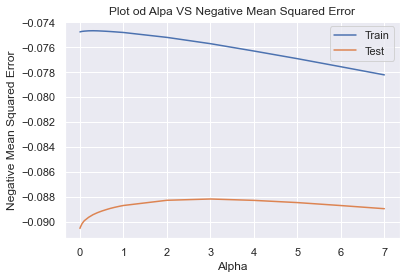

In [82]:
# Plotting alpha vs testscore

plt.plot(score_df1['param_alpha'][:20], score_df1['mean_train_score'][:20],label='Train')
plt.plot(score_df1['param_alpha'][:20], score_df1['mean_test_score'][:20],label='Test')
plt.legend()
plt.title("Plot od Alpa VS Negative Mean Squared Error")
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.show()

In [83]:
# check the coefficient values with alpha = 3

alpha = 3.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.87475484e-02,  8.98688540e-02, -1.47400471e-02,  3.80857378e-02,
        3.29542224e-01,  2.70422008e-01, -3.86937656e-02,  9.91566855e-03,
        1.98745357e-02,  3.15679512e-02, -2.24972570e-02,  5.83828560e-02,
        4.47909358e-02,  1.04094634e-01,  2.88931868e-02,  1.65542113e-02,
        2.12305698e-01,  5.07235944e-02,  9.34102855e-02, -2.80333617e-02,
        8.32274927e-02,  4.46740191e-01,  6.16584507e-02, -1.85980000e-02,
        9.97863764e-02,  8.09390087e-02,  6.41979678e-02,  8.76826732e-02,
        1.08191909e-01,  5.68325314e-02,  2.84225700e-02,  1.90892789e-01,
        4.14208078e-02,  3.09848140e-02,  4.44406920e-02,  1.62284975e-02,
        1.86120939e-02,  1.36025819e-03, -9.78897881e-02,  1.98084262e-02,
       -1.05476699e-05,  1.58582675e-02, -6.88520579e-02,  1.90218254e-02,
        3.77387881e-03, -1.47927638e-02,  2.40753619e-02,  6.04734690e-02,
        2.89569970e-02,  2.39816241e-02,  7.10381698e-03,  8.05124107e-03,
       -6.36997047e-02,  

In [84]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.sort_values(by = ['Coefficient'],ascending=False)

Features  Coefficient
21               GrLivArea       0.4467
4              OverallQual       0.3295
5              OverallCond       0.2704
16             TotalBsmtSF       0.2123
31              GarageCars       0.1909
..                     ...          ...
68    Neighborhood_Edwards      -0.0701
38          AgeOfHouseYear      -0.0979
116  SaleCondition_Abnorml      -0.1138
71    Neighborhood_MeadowV      -0.1198
70     Neighborhood_IDOTRR      -0.1327

[119 rows x 2 columns]

In [85]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train Residula Sum of Squared",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test Residula Sum of Squared",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train Mean Squared Error",mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error",mse_test_lr)
metric2.append(mse_test_lr)

Train R2 Score 0.9203751650714945
Test R2 Score 0.9017979709154323
Train Residula Sum of Squared 12.949567412705315
Test Residula Sum of Squared 6.748441371462453
Train Mean Squared Error 0.012758194495276173
Test Mean Squared Error 0.015478076540051499


### Residual Analysis of the train data.

- Checking whether error term is normal distribution (Assumption of linear regression).

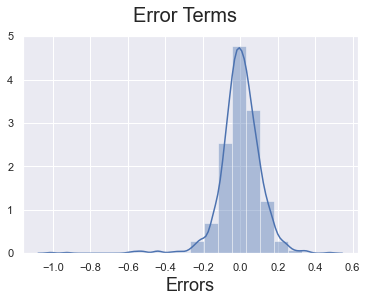

In [86]:
# Plot the histogram of the error terms.
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

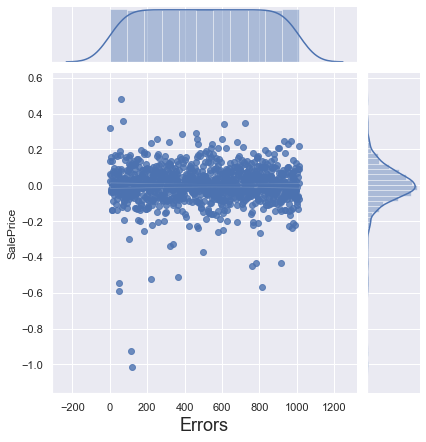

In [87]:
# To check the distribution of error term.
sns.set(color_codes =True)
sns.jointplot(x=np.arange(1015),y =(y_train - y_pred_train),kind='reg')                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

- Error terms are normaly distributed (centered around 0) and are independent, thus the model is a good fit for train data set .

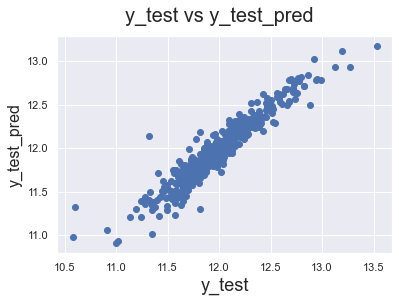

In [88]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

- Shows a linear relationship between y_test and y_test predicted and thus the model is good fit for test data also.

#### 6.2 Lasso Regression

In [89]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [91]:
score_df2 = pd.DataFrame(model_cv.cv_results_)
score_df2[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1        0.001         -0.078089        -0.085271                1
0       0.0001         -0.074398        -0.087556                2
2         0.01         -0.113725        -0.117419                3
3         0.05         -0.243557        -0.245140                4
4          0.1         -0.309929        -0.310321                5
25         100         -0.311576        -0.311788                6
24          50         -0.311576        -0.311788                6
23          20         -0.311576        -0.311788                6
22        10.0         -0.311576        -0.311788                6
21         9.0         -0.311576        -0.311788                6
20         8.0         -0.311576        -0.311788                6
19         7.0         -0.311576        -0.311788                6
18         6.0         -0.311576        -0.311788                6
17         5.0         -0.311576        -0.311788                6
16         4.0         -0.311576        -0.311788                6
13         1.0         -0.311576        -0.311788                6
14         2.0         -0.311576        -0.311788                6
26         500         -0.311576        -0.311788                6
12         0.9         -0.311576        -0.311788                6
11         0.8         -0.311576        -0.311788                6
10         0.7         -0.311576        -0.311788                6
9          0.6         -0.311576        -0.311788                6
8          0.5         -0.311576        -0.311788                6
7          0.4         -0.311576        -0.311788                6
6          0.3         -0.311576        -0.311788                6
5          0.2         -0.311576        -0.311788                6
15         3.0         -0.311576        -0.311788                6
27        1000         -0.311576        -0.311788                6

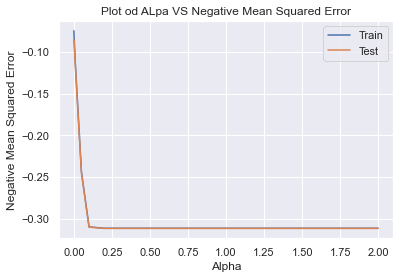

In [92]:
# Plotting alpha vs testscore

plt.plot(score_df2['param_alpha'][:15], score_df2['mean_train_score'][:15],label='Train')
plt.plot(score_df2['param_alpha'][:15], score_df2['mean_test_score'][:15],label='Test')
plt.legend()
plt.title("Plot od ALpa VS Negative Mean Squared Error")
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.show()

In [93]:
# Retuning the Lasso parameters,
paraml ={'alpha': [0.0005,0.0006,0.0007,0.0008,0.0009, 0.001, 0.002, 0.003,0.004,0.005, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = paraml, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
# Printing the best hyperparameter alpha
print(model_cv1.best_params_)

{'alpha': 0.0006}


In [95]:
score_df3 = pd.DataFrame(model_cv1.cv_results_)
score_df3[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0006         -0.075692        -0.084217                1
2       0.0007         -0.076180        -0.084263                2
0       0.0005         -0.075252        -0.084274                3
3       0.0008         -0.076745        -0.084458                4
4       0.0009         -0.077397        -0.084838                5
5        0.001         -0.078089        -0.085271                6
6        0.002         -0.084236        -0.090039                7
7        0.003         -0.089110        -0.094007                8
8        0.004         -0.093192        -0.097885                9
9        0.005         -0.097288        -0.101705               10
10         0.1         -0.309929        -0.310321               11
11         0.2         -0.311576        -0.311788               12
12         0.3         -0.311576        -0.311788               12
13         0.4         -0.311576        -0.311788               12
14         0.5         -0.311576        -0.311788               12
15         0.6         -0.311576        -0.311788               12
16         0.7         -0.311576        -0.311788               12
17         0.8         -0.311576        -0.311788               12
18         0.9         -0.311576        -0.311788               12
19         1.0         -0.311576        -0.311788               12

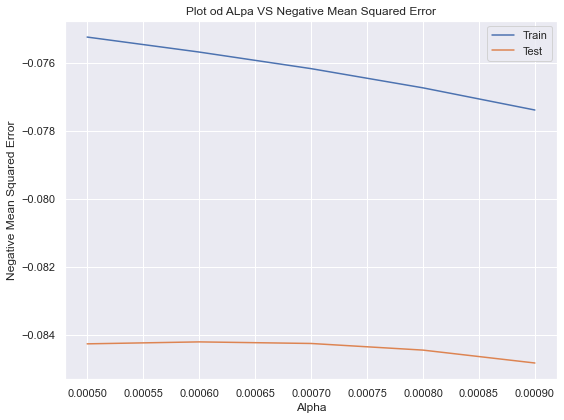

In [96]:
# Plotting alpha vs testscore
plt.figure(figsize=[8,6])
plt.plot(score_df3['param_alpha'][:5], score_df3['mean_train_score'][:5],label='Train')
plt.plot(score_df3['param_alpha'][:5], score_df3['mean_test_score'][:5],label='Test')
plt.legend()
plt.title("Plot od ALpa VS Negative Mean Squared Error")
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.tight_layout()
plt.show()

In [97]:
#Fitting Lasso model for alpha = 0.0006 .

alpha =0.0006

lasso1 = Lasso(alpha=alpha)
        
lasso1.fit(X_train, y_train) 

Lasso(alpha=0.0006)

In [98]:
lasso1.coef_

array([ 3.05904833e-02,  7.67605933e-02, -4.13098901e-03,  1.22566805e-03,
        4.30200220e-01,  2.86463189e-01, -1.34387633e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.28067532e-02,
        3.76413935e-02,  9.37101532e-02,  0.00000000e+00, -0.00000000e+00,
        1.78967244e-01,  5.07535475e-02,  7.79520864e-02, -0.00000000e+00,
        0.00000000e+00,  6.77078577e-01,  5.51706211e-02, -0.00000000e+00,
        2.65158376e-02,  4.21421599e-02,  0.00000000e+00,  7.22097900e-02,
        1.20565802e-01,  4.31005191e-02,  3.13977754e-02,  2.22502756e-01,
        0.00000000e+00,  2.35790213e-02,  3.21640107e-02,  6.09854192e-04,
        6.27825082e-03, -0.00000000e+00, -1.19566929e-01,  8.53055885e-03,
        0.00000000e+00,  1.07648995e-02, -6.23372534e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.50047446e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -4.09757068e-02, -

In [99]:
# Put the Features and coefficienst in a dataframe

lasso1_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso1.coef_.round(4)})
lasso1_df.sort_values(by = ['Coefficient'],ascending=False)

Features  Coefficient
21               GrLivArea       0.6771
4              OverallQual       0.4302
5              OverallCond       0.2865
31              GarageCars       0.2225
16             TotalBsmtSF       0.1790
..                     ...          ...
42           MSSubClass_30      -0.0623
71    Neighborhood_MeadowV      -0.0868
70     Neighborhood_IDOTRR      -0.0946
116  SaleCondition_Abnorml      -0.1007
38          AgeOfHouseYear      -0.1196

[119 rows x 2 columns]

In [100]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso1.predict(X_train)
y_pred_test = lasso1.predict(X_test)

metric3 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train Residula Sum of Squared",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test Residula Sum of Squared",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train Mean Squared Error",mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error",mse_test_lr)
metric3.append(mse_test_lr)

Train R2 Score 0.9178614482956857
Test R2 Score 0.9033387959516671
Train Residula Sum of Squared 13.358378870512574
Test Residula Sum of Squared 6.642555907407965
Train Mean Squared Error 0.013160964404445885
Test Mean Squared Error 0.015235219971119186


### Residual Analysis of the train data.

- Checking whether error term is normal distribution (Assumption of linear regression).

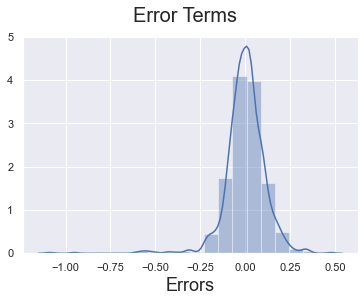

In [101]:
# Plot the histogram of the error terms.
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

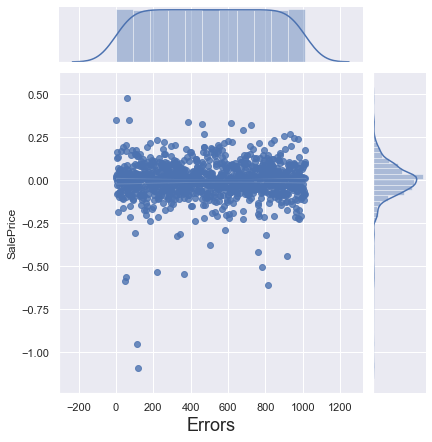

In [102]:
# To check the distribution of error term.
sns.set(color_codes =True)
sns.jointplot(x=np.arange(1015),y =(y_train - y_pred_train),kind='reg')                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

- Error terms are normaly distributed (centered around 0) and are independent, thus the model is a good fit for train data set .

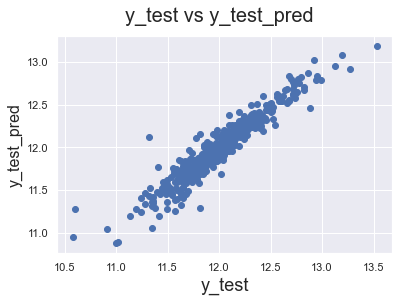

In [103]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

- Shows a linear relationship between y_test and y_test predicted and thus the model is good fit for test data also.

### 7. Summary

In [104]:
#Comparing Ridge and Lasso.
res_df = pd.DataFrame(metric2,metric3)
res_df.reset_index(inplace=True)
res_df.index = ['Train_R2','Test_R2','Train_RSS','Test_RSS','Train_MSE','Test_MSE']
res_df.columns = ['Lasso','Ridge']
res_df

Lasso      Ridge
Train_R2    0.917861   0.920375
Test_R2     0.903339   0.901798
Train_RSS  13.358379  12.949567
Test_RSS    6.642556   6.748441
Train_MSE   0.013161   0.012758
Test_MSE    0.015235   0.015478

In [105]:
# Finding top 10 Ridge and Lasso coefficient
print("Top 10 Ridge coefficient:")
print(ridge_df.loc[ridge_df.Coefficient.abs().sort_values(ascending=False).index[:10]])
print()
print("Top 10 Lasso coefficient:")
print(lasso1_df.loc[lasso1_df.Coefficient.abs().sort_values(ascending=False).index[:10]])

Top 10 Ridge coefficient:
                  Features  Coefficient
21               GrLivArea       0.4467
4              OverallQual       0.3295
5              OverallCond       0.2704
16             TotalBsmtSF       0.2123
31              GarageCars       0.1909
70     Neighborhood_IDOTRR      -0.1327
67    Neighborhood_Crawfor       0.1222
83    Neighborhood_StoneBr       0.1201
71    Neighborhood_MeadowV      -0.1198
116  SaleCondition_Abnorml      -0.1138

Top 10 Lasso coefficient:
                  Features  Coefficient
21               GrLivArea       0.6771
4              OverallQual       0.4302
5              OverallCond       0.2865
31              GarageCars       0.2225
16             TotalBsmtSF       0.1790
28              Functional       0.1206
38          AgeOfHouseYear      -0.1196
67    Neighborhood_Crawfor       0.1115
116  SaleCondition_Abnorml      -0.1007
70     Neighborhood_IDOTRR      -0.0946


### In conclusion,
#### 1. Lasso and Ridge regressions gave almost similar R squared value on test and train data set. So, both the models can be used for prediction. Ridge reduce the coefficient values and Lasso can be used for feature selection.

#### 2. Ridge Model Co-efficients ,

- Optimal Alpha Value for Ridge regression - '3.0'.

- GrLivArea, OverallQual, OverallCond, TotalBsmtSF, GarageCars are the top 5 predictor varaibles and they show positive correlation with SalesPrice. So, houses with good quality rating and total basement area have higher saleprice.

- If Neighborhood (Neighborhood_IDOTRR,Neighborhood_MeadowVSaleCondition_Abnorml) has Iowa DOT and Rail Road,or Meadow Village creates a lesser sale price. And, if there is an abnormality in sale condition like trade, foreclosure, or short sale, selling price would go down. 

#### 3. Lasso Model Co-efficients ,

- Optimal Alpha Value for Lasso regression - '0.0006'.

- GrLivArea, OverallQual, OverallCond, TotalBsmtSF, GarageCars are the top 5 predictor varaibles and they show positive correlation with SalesPrice.So, houses with good quality rating and total basement area have higher saleprice.

- Houses which are old (AgeOfHouseYear[year sold - year built]) have a lesser selling price compared to new ones. And, if there is an abnormality in sale condition like trade, foreclosure,or short sale, selling price would go down.also, If Neighborhood (Neighborhood_IDOTRR) has Iowa DOT and Rail Road,creates a lesser sale price.

## Assignment Questions

#### 1. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [106]:
## Ridge regression. alha = 6 (2*3)
alpha = 6.0
ridgeq = Ridge(alpha=alpha)

ridgeq.fit(X_train, y_train)

Ridge(alpha=6.0)

In [107]:
# Put the Features and coefficienst in a dataframe
ridgeq_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridgeq.coef_.round(4)})

In [108]:
print("Top 10 Ridge Double coefficient:")
print(ridgeq_df.loc[ridgeq_df.Coefficient.abs().sort_values(ascending=False).index[:10]])

Top 10 Ridge Double coefficient:
                Features  Coefficient
21             GrLivArea       0.3787
4            OverallQual       0.2892
5            OverallCond       0.2323
16           TotalBsmtSF       0.1946
31            GarageCars       0.1790
13            BsmtFinSF1       0.1178
70   Neighborhood_IDOTRR      -0.1155
67  Neighborhood_Crawfor       0.1150
24              FullBath       0.1113
83  Neighborhood_StoneBr       0.1055


In [109]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridgeq.predict(X_train)
y_pred_test = ridgeq.predict(X_test)

metric2q = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score",r2_train_lr)
metric2q.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score",r2_test_lr)
metric2q.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train Residula Sum of Squared",rss1_lr)
metric2q.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test Residula Sum of Squared",rss2_lr)
metric2q.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train Mean Squared Error",mse_train_lr)
metric2q.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error",mse_test_lr)
metric2q.append(mse_test_lr)

Train R2 Score 0.9168195640649918
Test R2 Score 0.9018696538437211
Train Residula Sum of Squared 13.527822864885945
Test Residula Sum of Squared 6.743515322139431
Train Mean Squared Error 0.013327904300380241
Test Mean Squared Error 0.015466778261787686


In [110]:
#Comparing Ridge and RidgeDouble.
res_df = pd.DataFrame(metric2q,metric2)
res_df.reset_index(inplace=True)
res_df.index = ['Train_R2','Test_R2','Train_RSS','Test_RSS','Train_MSE','Test_MSE']
res_df.columns = ['Ridge','RidgeDouble']
res_df

Ridge  RidgeDouble
Train_R2    0.920375     0.916820
Test_R2     0.901798     0.901870
Train_RSS  12.949567    13.527823
Test_RSS    6.748441     6.743515
Train_MSE   0.012758     0.013328
Test_MSE    0.015478     0.015467

In [111]:
## Lasso regression. alha = 0.0012 (2*0.0006)
alpha =0.0012

lassoq = Lasso(alpha=alpha)
        
lassoq.fit(X_train, y_train) 

Lasso(alpha=0.0012)

In [112]:
# Put the Features and coefficienst in a dataframe

lassoq_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lassoq.coef_.round(4)})

In [113]:
print("Top 10 Lasso Double coefficient:")
print(lassoq_df.loc[lassoq_df.Coefficient.abs().sort_values(ascending=False).index[:10]])

Top 10 Lasso Double coefficient:
                  Features  Coefficient
21               GrLivArea       0.6809
4              OverallQual       0.4562
5              OverallCond       0.2512
31              GarageCars       0.2314
16             TotalBsmtSF       0.1842
13              BsmtFinSF1       0.1056
116  SaleCondition_Abnorml      -0.0967
38          AgeOfHouseYear      -0.0910
27             KitchenQual       0.0837
67    Neighborhood_Crawfor       0.0832


In [114]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lassoq.predict(X_train)
y_pred_test = lassoq.predict(X_test)

metric3q = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score",r2_train_lr)
metric3q.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score",r2_test_lr)
metric3q.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train Residula Sum of Squared",rss1_lr)
metric3q.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test Residula Sum of Squared",rss2_lr)
metric3q.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train Mean Squared Error",mse_train_lr)
metric3q.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error",mse_test_lr)
metric3q.append(mse_test_lr)

Train R2 Score 0.9113472820828583
Test R2 Score 0.9003826311196262
Train Residula Sum of Squared 14.417792489219822
Test Residula Sum of Squared 6.8457034924362485
Train Mean Squared Error 0.014204721664255982
Test Mean Squared Error 0.015701154799165708


In [115]:
#Comparing Lasso and LassoDouble.
res_df = pd.DataFrame(metric3q,metric3)
res_df.reset_index(inplace=True)
res_df.index = ['Train_R2','Test_R2','Train_RSS','Test_RSS','Train_MSE','Test_MSE']
res_df.columns = ['Lasso','LassoDouble']
res_df

Lasso  LassoDouble
Train_R2    0.917861     0.911347
Test_R2     0.903339     0.900383
Train_RSS  13.358379    14.417792
Test_RSS    6.642556     6.845703
Train_MSE   0.013161     0.014205
Test_MSE    0.015235     0.015701

#### 2. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [116]:
#Creating X_train_lasso,X_test_lasso by droping top 5 predictor variables.
X_train_lasso = X_train.drop(['GrLivArea','OverallQual','OverallCond','GarageCars','TotalBsmtSF'], axis=1)
X_test_lasso = X_test.drop(['GrLivArea','OverallQual','OverallCond','GarageCars','TotalBsmtSF'], axis=1)

In [117]:
# Retuning the Lasso parameters,
parampred ={'alpha': [0.000001,0.00001,0.0001,0.0005,0.0006,0.0007,0.0008,0.0009, 0.001, 0.002, 0.003,0.004,0.005, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv1p = GridSearchCV(estimator = lasso, 
                        param_grid = parampred, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1p.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 37 candidates, totalling 185 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004,
                                   0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                   0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                                   8.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
# Printing the best hyperparameter alpha
print(model_cv1p.best_params_)

{'alpha': 0.0006}


In [119]:
score_df1p = pd.DataFrame(model_cv1p.cv_results_)

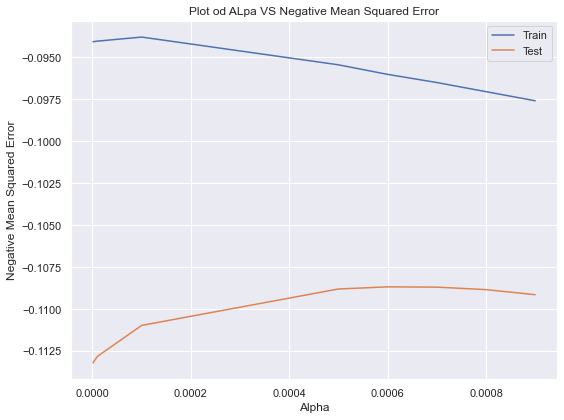

In [120]:
# Plotting alpha vs testscore
plt.figure(figsize=[8,6])
plt.plot(score_df1p['param_alpha'][:8], score_df1p['mean_train_score'][:8],label='Train')
plt.plot(score_df1p['param_alpha'][:8], score_df1p['mean_test_score'][:8],label='Test')
plt.legend()
plt.title("Plot od ALpa VS Negative Mean Squared Error")
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.tight_layout()
plt.show()

In [121]:
#Fitting Lasso model for alpha = 0.0006 .

alpha =0.0006

lasso1p = Lasso(alpha=alpha)
        
lasso1p.fit(X_train_lasso, y_train) 

Lasso(alpha=0.0006)

In [122]:
# Put the Features and coefficienst in a dataframe

lasso1p_df = pd.DataFrame({'Features':X_train_lasso.columns, 'Coefficient':lasso1p.coef_.round(4)})
lasso1p_df.sort_values(by = ['Coefficient'],ascending=False)

Features  Coefficient
11              BsmtFinSF1       0.3643
13               BsmtUnfSF       0.3180
20                FullBath       0.2945
17                2ndFlrSF       0.2783
23             KitchenQual       0.2031
..                     ...          ...
111  SaleCondition_Abnorml      -0.0948
47          MSSubClass_160      -0.0980
37           MSSubClass_30      -0.1020
65     Neighborhood_IDOTRR      -0.1416
66    Neighborhood_MeadowV      -0.1967

[114 rows x 2 columns]

In [123]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso1p.predict(X_train_lasso)
y_pred_test = lasso1p.predict(X_test_lasso)

metric3p = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score",r2_train_lr)
metric3p.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score",r2_test_lr)
metric3p.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train Residula Sum of Squared",rss1_lr)
metric3p.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test Residula Sum of Squared",rss2_lr)
metric3p.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train Mean Squared Error",mse_train_lr)
metric3p.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error",mse_test_lr)
metric3p.append(mse_test_lr)

Train R2 Score 0.8823131528013844
Test R2 Score 0.8730312600534404
Train Residula Sum of Squared 19.139678754192758
Test Residula Sum of Squared 8.725289136336919
Train Mean Squared Error 0.0188568263588106
Test Mean Squared Error 0.02001213104664431


In [124]:
print("Top 10 Lasso coefficient after removing top 5 predictor variables:")
print(lasso1p_df.loc[lasso1p_df.Coefficient.abs().sort_values(ascending=False).index[:10]])

Top 10 Lasso coefficient after removing top 5 predictor variables:
                Features  Coefficient
11            BsmtFinSF1       0.3643
13             BsmtUnfSF       0.3180
20              FullBath       0.2945
17              2ndFlrSF       0.2783
23           KitchenQual       0.2031
66  Neighborhood_MeadowV      -0.1967
78  Neighborhood_StoneBr       0.1763
62  Neighborhood_Crawfor       0.1644
27            GarageQual       0.1562
12          BsmtFinType2       0.1497
